# Sentimental Analysis of Covid19 Tweets (EmotionVista)
## Project By:
>William Papantoniou (z5358691) \
>Ruban Goyal (z5510371) \
>Rajdeep Virdy (z5498562) \
>Dhruv Gulwani (z5500136)

# **Introduction**

Through this notebook, we compared the ability of numerous models in the classification of Covid 19 tweets into three independent classes, namely Positive, Negative and Neutral. The dataset used for this task can be found at [COVIDSenti](https://github.com/usmaann/COVIDSenti/blob/main/COVIDSenti.csv), which we will discuss more in the Exploratory data analysis section of the notebook. In particular, we developed a bi-directional LSTM, a bi-directional GRU, a self-trained transformer, and a pre-trained BERT model. Each has its own advantages and disadvantages, which we will discuss later. Ultimately, we compare the performance of our models against those of the recommended paper given in the project outline [Recomended Paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9340540) using the pre-trained BERT model as a strong baseline to compare against. In the future, this will help stakeholders comprehend social reactions and come up with better communication strategies for public health crises.

# **Motivation**
Public discourses of crises, such as COVID-19, on social media platforms like Twitter, are global in nature.

Public sentiment will, in turn, inform policy makers, public health leaders, and researchers in decision-making and shaping appropriate communication strategies.

1. **Crisis Management:** Informing real-time responses and adaptive strategies.

2. **Public Health Campaigns:** Tailoring messages that resonate with public emotions.

3. **Policy Development:** Gauging public opinion to shape and refine policy measures.

4. **Research Insights:** Analyzing evolving attitudes and societal impact during pandemics
Social media data are innately diverse, informal, and rapidly changing; hence, it constitutes a problem that is both challenging technically and highly relevant in impact for NLP.

The development of a strong COVID-19 model for tweet sentiment classification that is supportive of meaningful contributions toward the study of public reactions during and after main events.

# **Problem Statement**
The COVID-19 pandemic has indeed let loose a storm of dialogues and sentiments on social media, most in the form of tweets. This analysis of opinions demonstrated by people throughout the pandemic is very crucial for policy analysts, health experts, and researchers to make effective decisions and thereby act suitably with regard to responding to public sentiments. This project categorizes the sentiment of the tweets related to COVID-19 into three classes, namely Positive, Neutral, and Negative, by means of state-of-the-art NLP models that analyze user-generated tweets based on their emotional tone and content.
 
* **Positive Sentiment:**
Tweets that are optimistic, hopeful, encouraging, or have had positive experiences with COVID-19.
 
* **Neutral Sentiment** when the tweets relate to facts, which by nature have to be objective. As a matter of fact, any tweet with no strong emotion may also be regarded as neutral.
 
* **Negative Sentiment** All those tweets relate to expressions of fear, anxiety, frustration, criticism, or complaints as a result of what they had to endure because of COVID-19.
 
The project deploys very advanced models, such as BERT, LSTM, and Transformer models, which capture subtle context for accurate sentiment classification. Class imbalance, variability in data, and noisy content obtained from social media are overcome to uncover meaningful, actionable sentiment insights in large public discourse.

# **Literature Review**

## [COVIDSenti: A Large-Scale Benchmark Twitter Data Set for COVID-19 Sentiment Analysis](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9340540)

COVIDSenti is a large-scale Twitter dataset which consists of 90,000 tweets categorised as positive, negative and neutral. It was created to support sentiment analysis specifically for COVID-19 context because understanding public sentiment is very valuable in effectively implementing health policies and monitoring misinformation.

### 1. Dataset Composition and Structure
The tweets were gathered using Twitter's API between February and March 2020. The dataset underwent a few preprocessing steps in which special characters and hashtags were removed. Furthermore, All the text was converted into lowercase and TextBlob was used to classify tweets based on a polarity threshold.

### 2. Methodology and Techniques for Sentiment Analysis
COVIDSenti serves as a basic to benchmark various machine learning and deep learning models like SVM, RF, CNN, BiLSTM and BERT. The COVIDSenti study identified BERT as top performing model due to its robust handling of context in short texts like tweets.

### 3. Application of COVIDSenti in Our Project
COVIDSenti offers a balanced distribution across all the sentiment classes which helps to decrease bias towards a single sentiment.

#### a. Three Files in the COVIDSenti Dataset
- **COVIDSenti-A:** This subset contains tweets labelled as positive and captures optimistic reactions towards health measures and vaccines.
- **COVIDSenti-B:** This subset contains tweets labelled as negative and captures fear and frustration towards lockdown and misinformation.
- **COVIDSenti-C:** This subset contains tweets labelled as neutral and captures objective statements.

#### b. Key Dataset Attributes
The dataset includes comprehensive preprocessing steps and hence makes it ideal for direct use in training different models. COVIDSenti's tri class setup allows our models to capture broader spectrum of sentiment. Also, each file contains a variety of keywords which helps in training models to recognise sentiment shifts across different COVID-19 topics.

The use of COVIDSenti supports our objective to compare various machine learning models like BiLSTM, BiGRU, Transformer and BERT and identify the best performing model. The Dataset is further explained in EDA section.

---

## [Machine Learning Techniques for COVID-19 Sentiment Analysis](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10035946)

This paper provides a comprehensive review of different sentiment analysis approaches applied to Twitter data on COVID-19. It helps identify the most efficient machine learning and deep learning models for understanding public sentiment.

### 1. Key Insights for Sentiment Analysis Models
#### a. Benchmarking ML and DL Models
- The paper evaluates traditional machine learning classifiers such as NB, SVM, LR, CNN, LSTM, BERT and ROBERTa. The study also confirms that BERT and ROBERTa outperforms other models due to their ability to handle short and informal texts like Tweets.

#### b. Ensemble Methods
- The paper also highlights the effectiveness of ensemble approaches where combining various classifiers like SVM and NB enhances classification accuracy.

#### c. Feature Extraction Techniques
- The study also discusses the importance of feature extraction techniques like TF-IDF, Word2Vec and GloVe embeddings. These approaches enhance model performance by capturing semantic relationship within the text.

### 2. Application to Our Project
- The insights from this review such as monitoring sentiment changes in response to public health measures and identifying misinformation trends aligns with our project objectives to develop models capable of providing real-time sentiment insights during health crisis.


Here we import all of the required libraries for all of our models and associated periphery code

In [ ]:
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Imports for EDA and data pre processing
from typing import Counter
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from nltk.corpus import stopwords
import nltk

# Model spacific imports
from transformers import BertForSequenceClassification, BertTokenizer
from tqdm import tqdm

C:\Users\William\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


If there is CUDA avaliable use the GPU

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')
print(torch.cuda.is_available())

Using device: cuda
True


The below code is the EDA / Data pre-processing, Origonally this code was seperated into a seperate file to reduce overal size and to make the code simpler but due to the requirement to submit a single notebook we have colated it into this document, with comments explaining what each section does.

In [ ]:
# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)  # Remove @ mentions
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.replace('\n', ' ').lower().strip()  # Convert to lowercase and trim
    text = ' '.join(text.split())  # Remove extra spaces
    return text

class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# Custom vocabulary building
def build_vocab(sentences):
    word_to_index = defaultdict(lambda: len(word_to_index))
    word_to_index["<PAD>"] = 0  # Reserve index 0 for padding
    word_to_index["<UNK>"] = 1  # Reserve index 1 for unknown words

    for sentence in sentences:
        tokens = sentence.split()  # Tokenization
        for token in tokens:
            if token not in word_to_index:
                word_to_index[token] = len(word_to_index)

    return word_to_index

# EDA
The below code performs Exploritory Data Anaylisis on our dataset. It is seperated into three main analysis characteristics.

1.   Word Frequencies within each sentiment class.
2.   Tweet Length within each sentiment class.
3.   Total Volume of data and percentage of each class within the dataset

Finally the print_analysis function is simply used to format the calculated data into a readable format.

### Data Pre-Processing Steps
Prior to conducting the EDA report genration step we should first discuss the methods that were used to pre process the data and why these steps were taken. There is only a single major pre-processing step which is the ***clean_text(text)*** function. The pourpose of the function is to strip the pieces of data that could lead to a reduciton in the quality of the output and to normalise the input so that the data is easier to vectorise when generating the vocabulary.

Going line by line through the function we first remove all the URLs within the data, this is because it is basically impossible to vectorise URLs and as a result would lead to many unknown tokens being added to the testing and training data which effectivly poisons the data.

Next we strip off all of the twitter mentions which is in the form @X where X is the individual. A large potion of the data was in a twitter thread where mentions are used repedly to be a part of the thread as such there was very little to be gained from this type of data, additonally because of the generating of our own vocabulary all of these @X would become there own vector which would simply lead to overfitting for that vector as the model learns that every time that @James (for example) is mentioned that the result is a negative classification.

Next we strip all of the non ASCII characters, this is because of how tweets are often formatted in twitter there could be many non ASCII characters but enough of them are distinct that the classifcation would overfit.

Next we removed all the puncuation as from previous exploration into AI production I found that the inclusion of commas as a vector within the vocabulary space often lead to more issues than the context that it provided gained, and the contet issues due to the commas and other such puncuation being remvoed was overcome through the use of other context increasing techniques such as BiDirectional LTSMs over normal LSTMs.

Finally we perform our normalisation step where we strip all of the new lines from the input text, make it lower case strip and then split the text again to ensure that all of the text is consistent and easily able to be tokenised for processing.


### Conclusion of Pre-Processing
Overally it is important to note that even under the same models that if the data fed into them is of diffent strucutes than the resulting accuracy can be severly differnt. From past experience I found that the best approach is to remove as much as possible while preserving the "essence" of the input text, and while I can apreciate that the context that the model may be able to extract might be limited due to this process the improvement in quality due to less of these relationships confusing the model in general lead to a stronger improvment.

### Data Properties:
From the Exploritory Data Anaylisis report below we can see that we get the following:

The dataset consists of 90,000 tweets with Positive, Nagative, and Neutral Sentiments. With each tweet consisting of a text string of variaying length and is stored in the structure "Tweet", "Sentiment".


By reviewing these the output we can see that we have a substantial class imbalance which could lead to issues with recall and precision for the smaller classes.

### Class Percentages:
*   **Positive**: 6.98%
*   **Negative**: 18.15%%
*   **Neutral**: 74.87%


We were also able to identify that all of the classes are aproximetly the same length of tweet which lead to the conclusion that while padding and truncation are valuable it is more critical that we ensure as most of the data as possible is included in the testing and training input as in small input volume the removal of any data is substantially more detrimental to the quality of the model than any structural changes that could lead to a reduction in the quality. Again itterating the imporatnce of EDA to ensure that models are build with the input data in mind.

### Average Tweet Length per Sentiment:
*    **Neg**      : 15.09 words
*    **Neu**       : 13.09 words
*    **Pos**       : 14.33 words


Finally within the EDA we perfomed a word frequency analysis which alowed us to idenfity key features about the text that models may be able to easily identify. The frequency of typically positive words such as "Good" within the positive class is something that our model must be able to classify. The results are as follows

### Top Words per Sentiment:
**Pos**:
*    coronavirus     - 5353 occurrences
*    virus           - 908 occurrences
*    corona          - 849 occurrences
*    china           - 532 occurrences
*    latest          - 493 occurrences
*    cases           - 466 occurrences
*    good            - 446 occurrences
*    people          - 436 occurrences
*    many            - 420 occurrences
*    covid19         - 406 occurrences

**Neg**:
*    coronavirus     - 13796 occurrences
*    virus           - 2465 occurrences
*    corona          - 2250 occurrences
*    due             - 1686 occurrences
*    people          - 1194 occurrences
*    china           - 1113 occurrences
*    outbreak        - 857 occurrences
*    us              - 773 occurrences
*    covid19         - 762 occurrences
*    trump           - 754 occurrences

**Neu**:
*    coronavirus     - 59363 occurrences
*    virus           - 7991 occurrences
*    corona          - 7035 occurrences
*    china           - 5013 occurrences
*    covid19         - 4584 occurrences
*    new             - 4289 occurrences
*    cases           - 4180 occurrences
*    us              - 3995 occurrences
*    via             - 3825 occurrences
*    outbreak        - 3551 occurrences

## Overall analyisis of EDA
Overall we can see that from the EDA there are afew key elements that need to be taken into consideration when constuction our models, however we are confident that due to this analysis we will be able to easly intergrate sections of our model that will lead us to a high quality outcome.

In [ ]:
## Data anaylisis section

# This function counts the frequency of each word within our dataset excluding stopwords which we defin as nltk's definition of stopwords.
def word_frequencies(data):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    word_counts = {'pos': Counter(), 'neg': Counter(), 'neu': Counter()}

    for _, row in data.iterrows():
        label = row['label']
        words = row['cleaned_tweet'].split()
        filtered_words = [word for word in words if word not in stop_words]
        word_counts[label].update(filtered_words)

    top_words = {label: count.most_common(10) for label, count in word_counts.items()}
    return top_words

# This function finds the mean length of each tweet for each class
def tweet_length_analysis(data):
    data['tweet_length'] = data['cleaned_tweet'].apply(lambda x: len(x.split()))
    avg_length = data.groupby('label')['tweet_length'].mean()
    return avg_length.to_dict()

# This function simply counts the number of tweets of each sentiment and returns an analysis_summary object comprised of the outputs of the tweet_length_analysis() function and the word_frequencies() function aswell as the total counts of each class
# Essentially a function to colate all the data.
def analyze_data(data):
    label_counts = data['label'].value_counts(normalize=True) * 100
    label_summary = {
        'Positive %': label_counts.get('pos', 0),
        'Negative %': label_counts.get('neg', 0),
        'Neutral %': label_counts.get('neu', 0),
        'Total Samples': len(data)
    }

    avg_tweet_length = tweet_length_analysis(data)
    word_freqs = word_frequencies(data)

    analysis_summary = {
        'Label Summary': label_summary,
        'Average Tweet Length per Sentiment': avg_tweet_length,
        'Top Words per Sentiment': word_freqs,
    }

    return analysis_summary


# This is the function that generates the report of the data for easy printing, it takes the output of the analyze_data() function and prints it in a more human readable format.
def print_analysis(analysis_summary):
    print("\n--- Data Analysis Summary ---\n")

    print("Label Summary:")
    for label, value in analysis_summary['Label Summary'].items():
        if isinstance(value, float):
            print(f"  {label:<15}: {value:.2f}%")
        else:
            print(f"  {label:<15}: {value}")

    print("\nAverage Tweet Length per Sentiment:")
    for sentiment, avg_length in analysis_summary['Average Tweet Length per Sentiment'].items():
        print(f"  {sentiment.capitalize():<10}: {avg_length:.2f} words")

    print("\nTop Words per Sentiment:")
    for sentiment, words in analysis_summary['Top Words per Sentiment'].items():
        print(f"  {sentiment.capitalize()}:")
        for word, count in words:
            print(f"    {word:<15} - {count} occurrences")

    print("\n--- End of Summary ---\n")

# Pre-Processing
Below is the final pre processing function that is used by all of our models, it is called a single time in the notebook and the sperated data is used to train and test all of our models, with all models using a shared vocabulary that is also produced in this step.

Please note that there is an if statement that is always true within the funtion, this is because in general there is no need to perform data analyis every time we run the data processing code, so after the analysis is performed we can simply set the value to 0 and not have to perform such computationally expensive analysis every time.

In [ ]:
# Function to preprocess data and return train/test datasets
def preprocess_data(file_path, test_size=0.2, random_state=42):
    data = pd.read_csv(file_path, header=None, names=['tweet', 'label'], quotechar='"', lineterminator='\n')
    data = data.iloc[1:].reset_index(drop=True)

    # Clean tweets, strip labels and assign each of the valid sentiments
    data['cleaned_tweet'] = data['tweet'].apply(clean_text)
    data['label'] = data['label'].str.strip()

    valid_labels = ['neu', 'neg', 'pos']
    label_mapping = {'neu': 1, 'neg': 0, 'pos': 2}
    filtered_data = data[data['label'].isin(valid_labels)].copy()
    filtered_data['encoded_label'] = filtered_data['label'].map(label_mapping)

    # Analyze the data and print the results
    if (1 == 1):
        analysis_results = analyze_data(filtered_data)
        print_analysis(analysis_results)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        filtered_data['cleaned_tweet'].values,
        filtered_data['encoded_label'].values,
        test_size=test_size,
        random_state=random_state
    )

    # Build vocabulary from training data
    vocab = build_vocab(X_train)

    # Create Dataset objects
    train_dataset = TweetDataset(X_train, y_train)
    test_dataset = TweetDataset(X_test, y_test)

    return train_dataset, test_dataset, vocab

# Generating the EDA Report and the Data for model

In [ ]:
train_dataset, test_dataset, vocab = preprocess_data('COVIDSenti.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\William\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



--- Data Analysis Summary ---

Label Summary:
  Positive %     : 6.98%
  Negative %     : 18.15%
  Neutral %      : 74.87%
  Total Samples  : 90000

Average Tweet Length per Sentiment:
  Neg       : 15.09 words
  Neu       : 13.09 words
  Pos       : 14.33 words

Top Words per Sentiment:
  Pos:
    coronavirus     - 5353 occurrences
    virus           - 908 occurrences
    corona          - 849 occurrences
    china           - 532 occurrences
    latest          - 493 occurrences
    cases           - 466 occurrences
    good            - 446 occurrences
    people          - 436 occurrences
    many            - 420 occurrences
    covid19         - 406 occurrences
  Neg:
    coronavirus     - 13796 occurrences
    virus           - 2465 occurrences
    corona          - 2250 occurrences
    due             - 1686 occurrences
    people          - 1194 occurrences
    china           - 1113 occurrences
    outbreak        - 857 occurrences
    us              - 773 occurrences
    

# Generate the Testing and training dataloader objects
inorder to corectly prepare the data for use with the vocabulary we need to encode the words in the text into there associated vocabulary vector, and if the word does not exist within the vector space we assign it the vector of unkonwn which is defined inside the vector space.

Finally we perform batch-wise padding to ensure that we dont over pad our data which would result in a reduction in overall performace.

Truncating the data occurs later should the specific model need it but this section of code alows for all of the input of each batch to be of the same length.

In [ ]:
# Tokenization function
def vector_assign(text):
    return [vocab[token] if token in vocab else vocab["<UNK>"] for token in text.split()]

# Detokenization function used decode the encoded sententices that were missclassifed so that we can peroform data analysis later on in the code
def detokenize(token_ids, vocab):
    id_to_token = {id_: token for token, id_ in vocab.items()}
    tokens = [id_to_token.get(id_, "<UNK>") for id_ in token_ids]
    return ' '.join(tokens)


# Collate function to pad sequences to the same length preventing the presence of to many <PAD> in the tokenised data
def collate_fn(batch):
    texts, labels = zip(*batch)
    text_indices = [torch.tensor(vector_assign(text), dtype=torch.long, device=device) for text in texts]
    text_indices_padded = pad_sequence(text_indices, batch_first=True, padding_value=vocab["<PAD>"])
    return text_indices_padded, torch.tensor(labels, dtype=torch.long, device=device)

# DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

# Models
Over the course of the term as a team we produced 4 models


1.   BiLSTM (William)
2.   BiGRU (Ruban)
3.   Trained Transformer (Rajdeep)
4.   BERT (Dhruv)

Above each code block that defines the models you will find a describtion that clearly outlines how each model works, where the insperation for the model came from and any references that were required in its procution.



# BiLSTM (William)
The first model that was produced for this task was the below LSTM. The inspiration for the structure came from two sources: firstly, the recommended paper [source](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9340540) and secondly, a paper originally recommended for the multimodal AI Processing task 004 [source](https://ojs.aaai.org/index.php/AAAI/article/view/12021). I could see that the structure of the text analysing LSTM from the Multimodal AI paper would be extremely relevant to the classification of sentiments in our implementation; however, modifications to the output would be needed to ensure that the classification worked.

To best explain the model's structure, why each part of the structure was selected, and what improvements I made, let's step through the code and explain how it was implemented line by line.


### Model Structure

**Embedding Layer:**\
Firstly, the embedding layer acts as an efficient lookup table that allows PyTorch to acquire the encoded vector from the pre-built vocabulary. While it is possible to use a linear layer for this task, Implementing a manual lookup to get the vectors doesn't make much sense when PyTorch provided an efficient way to implement this structure. The recommended paper suggested using such an embedding layer, though no specific examples were provided, and as such, implementing this took some trial and error. I ultimately referenced the PyTorch [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) in order to implement it correctly, and from the documentation PyTorch discuss page [PyTorch Discuss](https://discuss.pytorch.org/t/how-does-nn-embedding-work/88518), it was suggested that the use of an nn.Embedding layer improves performance when dealing with inputs of variable length, such as tweets, due to the reduction in computation cost.


**LSTM Layer:** \
The next part of the LSTM is the nn.LSTM layer. This layer simply implements the LSTM standard structure. However, both papers recommended a few key properties when classifying sentiments on text data. Firstly, the use of ***batch_first = True*** was decided beacuse the PyTorch Dataloader objects have the batch at their first index, which means that they are able to integrate seamlessly. Secondly, the use of ***bidirectional = True*** was recommended repeatedly in both papers due to the fact that by considering the inputs in both directions and concatenating the resulting hidden outputs, the model is able to better consider the context that the input is set in and as such increase the overall quality of the output. I was able to find an additional paper that alowed me more insight to the benefits and functionality for BiDirectional LSTMs [BiDirectional Comparision Paper](https://www.sciencedirect.com/science/article/pii/S1877050922024930) where they compared the quality of different configurations of LSTM, BiLSTM, and CNN, resulting in clear performance improvements for the Bidirectional LSTM.


**Dropout Layer:**\
The next stage of the model is a dropout layer with 0.5 dropout; the reason for its inclusion is to prevent overfitting and also increase the independence of each of the LSTM nodes. The use of 0.5 as the dropout rate was selected as this seems to be the standard within literature. However, in the recomended paper, they implemented multiple dropout layers starting at 0.5 and then moving to 0.25 in higher layers of the LSTM. They claimed that this multiple layer drop out lead them to accuracy improvements within their models. However, I noticed that the overall quality of their models was still maximally 0.771 by a Golve vector encoded BiLSTM when using the same dataset used in our implimentation. I found it extremely hard to justify that including additional dropout layers was beneficial to the quality of the model. As such, I decided to only include a single dropout layer with a 0.5 dropout as I appreciate the importance of ensuring that no overfitting occurs and to ensure the independance of each node.The quote for there use of this progressive dropout amount is "After the first BiLSTM layer, a dropout of 0.5 is used for regularization, and again, a dropout of 0.25 is used after three BiLSTM layers."

**Fully Connected (FC) Output Layer:**\
Finally, we have an FC output layer that simply allows the classification of the sentiments into three different classes. It is important to note that I chose to use variable dimensionality as input to the function, as this would allow me to take this model and use it elsewhere for other sentimental classification tasks. As such, while in this case, output_dim is always 3, in future use cases, I may want to select output_dim to be of many more classes depending on its task.

### Overall Assessment
Overall, I am confident that the implementation of the LSTM is of high quality, based on extensive research from multiple different sources and the meshing of ideas from these different researchers. As can be shown from the the results that you will find later on, it is clear that the modifications that I made using the research and by combining ideas from multiple papers improved the overall quality of the model.

In [ ]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx=None):
        super(LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (hidden, _) = self.lstm(embedded)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        output = self.dropout(hidden)
        output = self.fc(output)
        return output

# BiGRU (Ruban)

## Overview
 The Gated Recurrent Unit (GRU) is a simple and efficient neural network which makes it well-suited for tasks like sentiment analysis. GRUs are also known for their ability to process sequential data like text while being faster and using less memory compared to LSTMs. In this project, we have used a BiGRU to classify tweets which allows the model to process tweets in both forward and backward directions and capture the full context of each word.

 ## Why GRU was Implemented
 GRU was chosen for this project because it has a simple design compared to LSTM with only two gates called Update and Reset. This makes it computationally faster and less memory intensive. Also, GRU's work well with medium sized datasets like COVIDSenti and require minimal tuning to perform effectively. We also noticed that BiGRU was not explored for sentiment analysis tasks and we wanted to have a look at it for all of the above reasons.

 ## How was GRU Implemented

 The GRU model in this project is made up of three main parts. The embedding layer converts input words into numerical vector representations so the model can understand relationships between the words. The GRU layer processes these embeddings in two directions forward and backward using BiGRU to capture the full context of each word. Finally, the fully connected layer uses the learned features to classify the sentiment of the tweet as positive, negative or neutral. The model also includes a dropout layer with a fixed rate of 0.5 to prevent overfitting and ensure it performs well on new data.

 ## Comparison with LSTM
 We also trained BiGRU and BiLSTM with same parameters to compare the models and results showed that BiGRU performed just as well as BiLSTM in terms of accuracy. Furthermore, it needed fewer training epoch to reach the same performance level. This shows that GRU is faster to train and uses fewer resources while still providing high-quality results. These findings prove that GRUs are a strong alternative to LSTMs for sentiment analysis tasks.

 ## Overall Assessment
 The GRU's simple and efficient design combined with its ability to handle sequential data makes it a great choice for this project. The results will also confirm that GRUs are faster and more resource friendly alternative to LSTMs.

 **Source:**

 1. [What are the differences and similarities between LSTM and GRU in terms of architecture and performance?](https://www.linkedin.com/advice/0/what-differences-similarities-between-lstm-gru#:~:text=The%20performance%20of%20LSTM%20and,dependencies%20as%20well%20as%20LSTM.)

 2. Chung, Junyoung, Çaglar Gülçehre, Kyunghyun Cho, and Yoshua Bengio. "Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling." *arXiv preprint* arXiv:1412.3555 (2014). [arXiv:1412.3555](https://arxiv.org/abs/1412.3555)

In [ ]:
class GRU(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx=None):
        super(GRU, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)
        self.gru = nn.GRU(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, hidden = self.gru(embedded)
        hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        output = self.dropout(hidden)
        output = self.fc(output)
        return output

# Trained Transformer (Rajdeep)

I thought the Transformer was a very natural choice for this particular problem. Transformers are highly effective for NLP tasks and excel at capturing complex patterns in data. They are also the backbone of the recent boom in generative AI models, such as ChatGPT. With this in mind, I decided to design my own Transformer architecture.

## Overview of Transformers

The key innovation behind Transformers is the **encoder layer**, which consists of two main stages:

1. **Attention Block**  
   This block facilitates communication between embedding vectors using three matrices: the **query matrix**, **key matrix**, and **value matrix**.  
   - The query and key matrices are used to produce a probability distribution, which determines the extent to which information should be exchanged between embedding vectors.  
   - The value matrix then specifies the quantity that needs to be added to each embedding vector to appropriately adjust its meaning.  

   This process defines a single attention head. In a **multi-head attention block**, this operation is carried out multiple times in parallel, making it highly scalable and parallelizable.

2. **Feedforward Network (FFN)**  
   Also known as a Multi-Layer Perceptron (MLP), this stage consists of a two-layer perceptron network. Typically, the first layer's size is four times the size of the embedding dimension. This allows the embedding vectors to be projected into a higher-dimensional space, enabling the network to capture even more complex patterns.

## Architecture Overview

The architecture used in this project is novel. The Transformer consists of two encoder layers, with each attention block featuring four heads. Following the encoder layers is a **mean pooling layer** that aggregates the embedding vectors by calculating their mean. During this process, the embedding vectors corresponding to padding tokens are masked to avoid skewing the results.

After the pooling layer, the pooled embedding vector is passed through a **fully connected layer** to produce the output. Additionally, a **dropout layer** is included to mitigate overfitting.

**Sources:**
1. Mishev, Kostadin, Ana Gjorgjevikj, Irena Vodenska, Lubomir T. Chitkushev, and Dimitar Trajanov. "Evaluation of Sentiment Analysis in Finance: From Lexicons to Transformers." IEEE Access 8 (2020): 131662-131676. [DOI: 10.1109/ACCESS.2020.3009626](https://doi.org/10.1109/ACCESS.2020.3009626)

2. Naseem, Usman, Imran Razzak, Katarzyna Musial, and Muhammad Imran. "Transformer Based Deep Intelligent Contextual Embedding for Twitter Sentiment Analysis." Future Generation Computer Systems 113 (2020): 58-69. [DOI: 10.1016/j.future.2020.06.050](https://doi.org/10.1016/j.future.2020.06.050)

3. Kokab, Sayyida Tabinda, Sohail Asghar, and Shehneela Naz. "Transformer-based Deep Learning Models for the Sentiment Analysis of Social Media Data." Array 14 (2022): 100157. [DOI: 10.1016/j.array.2022.100157](https://doi.org/10.1016/j.array.2022.100157)


In [ ]:
class TransformerSentimentModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_heads, hidden_dim, output_dim, num_layers, padding_idx=None):
        super(TransformerSentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=padding_idx)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=num_heads,
            dim_feedforward=hidden_dim,
            dropout=0.5
        )

        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embedding_dim, output_dim)
        self.dropout = nn.Dropout(0.5)
        self.padding_idx = padding_idx

    def forward(self, x):
        embedded = self.embedding(x)

        src_key_padding_mask = (x == self.padding_idx)

        embedded = embedded.permute(1, 0, 2)

        transformer_out = self.transformer_encoder(
            embedded,
            src_key_padding_mask=src_key_padding_mask
        )

        transformer_out = transformer_out.permute(1, 0, 2)

        # Masking the padding tokens and not considering them in the mean of the embeddings
        mask = ~src_key_padding_mask
        mask = mask.unsqueeze(2).float()

        transformer_out = transformer_out * mask
        lengths = mask.sum(dim=1).clamp(min=1)
        pooled = transformer_out.sum(dim=1) / lengths

        output = self.dropout(pooled)
        output = self.fc(output)
        return output

# BERT (Dhruv)

The BERT model has been chosen because it does exceptionally well in capturing the meaning of a sentence contextually by its bidirectional training approach. Whereas traditional models process the input text in a sequential manner, either left-to-right or right-to-left, the BERT model reads bidirectionally; hence, it truly understands words within the full context of their surroundings. Such contextual dependencies bring into light a more subtle and fine-grained interpretation of the language, given that in sentiment analysis, for instance, often the subtle choice of words and their context determines the sentiment polarities. Following [source](https://arxiv.org/abs/1810.04805), "BERT's pre-training on large corpora allows it to generalize much better across a wide range of NLP tasks, which has made it very effective even with limited task-specific fine-tuning." This therefore also makes BERT highly suitable for dynamic and context-rich content, such as COVID-19-related tweets. As explained by [GeeksforGeeks](https://arxiv.org/abs/1810.04805).

**How BERT Was Implemented**
For implementation, fine-tuning of BERT was done using the Hugging Face Transformers library-efficiently used as an interface where pre-trained transformer models are meant for use. Fine-tuning on sentiment analysis with the following stages being key:

* **Tokenization**: The first pre-processing that needed to be done was the use
of the BERT tokenizer for the input text data, which meant converting raw text to token IDs and adding special tokens such as CLS for classification and SEP for sentence separation. In this example, padding has been used along with attention masks so that input sequences are of the same length. This is very important, considering that BERT's architecture was designed for consistency in lengths. This kind of tokenization helps retain semantic meaning for the words based on contextual meaning that BERT can make use of in getting the sentiment of the words better. It structures input sequences for proper fitting into the BERT architecture and hence efficient processing.

* **The architecture's** heart in BERT is in word embeddings and stacking of Transformers that contain the self-attention mechanism in their way of operation, therefore capturing the relationship between or among words in a sentence. Such a mechanism of self-attention allows BERT to model long-range dependencies and full context of input text; hence, allowing more sophisticated sentiment understanding. Unlike static word embeddings, BERT's contextual embeddings represent words dynamically given surrounding context; hence, it is quite effective in doing sentiment analysis tasks where the meanings of words can shift dramatically depending on context. This understanding was derived from [source](https://arxiv.org/abs/1810.04805).

* **Fine-tuning**: The model has been fine-tuned for sentiment classification using the head called BertForSequenceClassification-a classification layer on top of the Transformer output. This head is designed for predicting sentiment categories like Positive, Neutral, and Negative. The fine-tuning in this case means updating the pre-trained BERT weights with supervised knowledge of the Sentiment Analysis task on COVID-19-related tweets. The optimization was done by using the AdamW optimizer with a learning rate of 2e-5, which is a very proven setting for transformer-based models according to Rathi 2021. Class weighting was done to handle class imbalance in the dataset; hence, cross-entropy loss is used for balanced performance for each class of sentiment.

**Overall Evaluation**

The work of BERT for sentiment analysis was particularly effective because it is trained bidirectionally; therefore, much complex contextual relationship, emotional subtlety, and even the change in sentiment within the same text could be detected. The use of pre-trained embeddings made performance by BERT much better in comparison to traditional embedding models like LSTM and GRU. In fine-tuning, it would learn much about the use of language and transform only that knowledge into subtleties specific to COVID-19-related tweets to make sentiment predictions highly accurate and reliable. According to [source](https://medium.com/@manjindersingh_10145/sentiment-analysis-with-bert-using-huggingface-88e99deeec9a), self-attention mechanisms and contextual embeddings enable BERT to pick out even complex shades of sentiment, including sarcasm, irony, and subtle shifts in sentiment. It proves its credibility, therefore guaranteeing an advantage in sentiment analysis. "BERT's ability for fine-tuning and yield accurate sentiment analysis underlines its utility in grasping the standing of the public mind, especially when the latter is seen through changing social media discussion".




In [ ]:
class BERTModel(nn.Module):
    def __init__(self, num_labels=3):
        super(BERTModel, self).__init__()
        self.bert = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

    def forward(self, input_ids, attention_mask=None):
        # Forward pass through BERT
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output

# Training

With all the models defined, we now produce the **training function**, which is common to all the models except the BERT model. The BERT model requires data in a different shape compared to the others, so it follows a separate process.

During training, the **epoch loss** and **accuracy** are output at each iteration. By default, we selected **50 epochs** for training. To optimize training time, we also implemented **early stopping**, using a patience of **5 epochs** with a tolerance delta of **1%**.

After completing the training, the function also outputs **5 examples per class** of both misclassified and correctly classified samples. This facilitates **error analysis** and helps in understanding the model's performance.

In [ ]:
def train_model(model, train_dataloader, test_dataloader, criterion, optimizer, vocab, num_epochs=50, patience=5, min_delta=0.01):
    import torch
    from tqdm import tqdm

    train_loss_values, train_accuracy_values = [], []
    test_loss_values, test_accuracy_values = [], []

    best_test_accuracy = 0
    epochs_without_improvement = 0

    # Define the mapping from class IDs to labels
    id_to_label = {0: 'negative', 1: 'neutral', 2: 'positive'}

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_train_loss, correct_train, total_train = 0, 0, 0
        train_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

        for text, label in train_bar:
            optimizer.zero_grad()
            output = model(text)
            loss = criterion(output, label)
            total_train_loss += loss.item()
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == label).sum().item()
            total_train += label.size(0)

            # Update tqdm bar description with current metrics
            train_bar.set_postfix(loss=total_train_loss / (total_train if total_train > 0 else 1),
                                  accuracy=100 * correct_train / total_train if total_train > 0 else 0)

        avg_train_loss = total_train_loss / len(train_dataloader)
        train_accuracy = 100 * correct_train / total_train
        train_loss_values.append(avg_train_loss)
        train_accuracy_values.append(train_accuracy)

        # Testing phase
        model.eval()
        total_test_loss, correct_test, total_test = 0, 0, 0

        with torch.no_grad():
            for text, label in test_dataloader:
                output = model(text)
                loss = criterion(output, label)
                total_test_loss += loss.item()

                # Calculate test accuracy
                _, predicted = torch.max(output, 1)
                correct_test += (predicted == label).sum().item()
                total_test += label.size(0)

        avg_test_loss = total_test_loss / len(test_dataloader)
        test_accuracy = 100 * correct_test / total_test
        test_loss_values.append(avg_test_loss)
        test_accuracy_values.append(test_accuracy)

        # Print epoch summary
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

        # Check for improvement in test accuracy
        if test_accuracy > best_test_accuracy + min_delta:
            best_test_accuracy = test_accuracy
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # Early stopping condition
        if epochs_without_improvement >= patience:
            print(f"Stopping early at epoch {epoch+1} due to no improvement in test accuracy for {patience} consecutive epochs.")
            break

    # After training is complete (regardless of early stopping), collect examples
    # Initialize examples storage
    correct_examples = {0: [], 1: [], 2: []}
    incorrect_examples = {0: [], 1: [], 2: []}

    model.eval()
    with torch.no_grad():
        for text, label in test_dataloader:
            output = model(text)
            _, predicted = torch.max(output, 1)

            # Collect examples for analysis
            for i in range(len(label)):
                class_label = label[i].item()
                pred_label = predicted[i].item()
                decoded_text = detokenize(text[i].tolist(), vocab)  # Use the detokenization function
                if class_label == pred_label:
                    if len(correct_examples[class_label]) < 5:
                        correct_examples[class_label].append((decoded_text, class_label))
                else:
                    if len(incorrect_examples[class_label]) < 5:
                        incorrect_examples[class_label].append((decoded_text, pred_label))

    # After training is complete, print the examples collected
    print("\nExamples of misclassifications:")
    for class_id in range(3):
        label_name = id_to_label[class_id]
        examples = incorrect_examples.get(class_id, [])
        if examples:
            print(f"True Label: {label_name} ({class_id})")
            for text, pred in examples:
                pred_label_name = id_to_label[pred]
                print(f"  Text: {text}")
                print(f"  Predicted: {pred_label_name} ({pred})")
                print()
        else:
            print(f"No misclassified examples for class '{label_name}' ({class_id}).")

    print("\nExamples of correct classifications:")
    for class_id in range(3):
        label_name = id_to_label[class_id]
        examples = correct_examples.get(class_id, [])
        if examples:
            print(f"Label: {label_name} ({class_id})")
            for text, label_id in examples:
                print(f"  Text: {text}")
                print(f"  Label: {label_name} ({label_id})")
                print()
        else:
            print(f"No correctly classified examples for class '{label_name}' ({class_id}).")

    return train_loss_values, train_accuracy_values, test_loss_values, test_accuracy_values


# Evaluation function

Before running any of the code first I defined the evaluation function that will be used in conjunction with the in built classification_report from sklearn.metrics which we will use to compare the results of each of the models and compare there efficacy.

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for text, label in dataloader:
            output = model(text)
            _, predicted = torch.max(output, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(label.cpu().numpy())
    return all_labels, all_preds

# Running the models
The below code segments are the running of each of the 4 models and there resulting outputs.

In [ ]:
# LSTM and GRU Parameters
vocab_size = len(vocab)
embedding_dims = [8, 100]
hidden_dims = [8, 16, 32, 64]
output_dim = 3
padding_idx = vocab["<PAD>"]
num_epochs = 50

## Running LSTM
The below code runs the training for the LSTM sweeping through our values for the embedding dim and the hidden dim.

In [ ]:
all_lstm_train_loss_values = []
all_lstm_train_accuracy_values = []
all_lstm_test_loss_values = []
all_lstm_test_accuracy_values = []

for embedding_dim in embedding_dims:
    for hidden_dim in hidden_dims:
        model = LSTM(vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters())
        lstm_train_loss_values, lstm_train_accuracy_values, lstm_test_loss_values, lstm_test_accuracy_values = train_model(model, train_loader, test_loader, criterion, optimizer, vocab, num_epochs)

        true_labels, predicted_labels = evaluate_model(model, test_loader)
        print(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
        print(f'Classification Report for COVIDSenti LSTM with {hidden_dim} hidden dimenions and {embedding_dim} embedding dimensions:')
        print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

        all_lstm_train_loss_values.append(lstm_train_loss_values)
        all_lstm_train_accuracy_values.append(lstm_train_accuracy_values)
        all_lstm_test_loss_values.append(lstm_test_loss_values)
        all_lstm_test_accuracy_values.append(lstm_test_accuracy_values)

Epoch 1/50: 100%|██████████| 2250/2250 [00:14<00:00, 150.29it/s, accuracy=74.1, loss=0.0226]


Epoch 1/50, Train Loss: 0.7227, Train Accuracy: 74.09%, Test Loss: 0.6640, Test Accuracy: 74.88%


Epoch 2/50: 100%|██████████| 2250/2250 [00:14<00:00, 156.11it/s, accuracy=76.3, loss=0.0191]


Epoch 2/50, Train Loss: 0.6112, Train Accuracy: 76.34%, Test Loss: 0.5321, Test Accuracy: 79.94%


Epoch 3/50: 100%|██████████| 2250/2250 [00:17<00:00, 129.89it/s, accuracy=81.8, loss=0.0154]


Epoch 3/50, Train Loss: 0.4928, Train Accuracy: 81.79%, Test Loss: 0.4469, Test Accuracy: 84.03%


Epoch 4/50: 100%|██████████| 2250/2250 [00:18<00:00, 122.42it/s, accuracy=84.9, loss=0.013] 


Epoch 4/50, Train Loss: 0.4150, Train Accuracy: 84.89%, Test Loss: 0.3949, Test Accuracy: 85.82%


Epoch 5/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.04it/s, accuracy=86.8, loss=0.0113]


Epoch 5/50, Train Loss: 0.3631, Train Accuracy: 86.83%, Test Loss: 0.3503, Test Accuracy: 87.26%


Epoch 6/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.06it/s, accuracy=88.2, loss=0.0101]


Epoch 6/50, Train Loss: 0.3235, Train Accuracy: 88.16%, Test Loss: 0.3198, Test Accuracy: 88.53%


Epoch 7/50: 100%|██████████| 2250/2250 [00:14<00:00, 152.01it/s, accuracy=89.5, loss=0.00915]


Epoch 7/50, Train Loss: 0.2928, Train Accuracy: 89.51%, Test Loss: 0.2991, Test Accuracy: 89.57%


Epoch 8/50: 100%|██████████| 2250/2250 [00:14<00:00, 153.18it/s, accuracy=90.6, loss=0.00828]


Epoch 8/50, Train Loss: 0.2651, Train Accuracy: 90.64%, Test Loss: 0.2889, Test Accuracy: 90.18%


Epoch 9/50: 100%|██████████| 2250/2250 [00:14<00:00, 153.13it/s, accuracy=91.6, loss=0.00762]


Epoch 9/50, Train Loss: 0.2438, Train Accuracy: 91.58%, Test Loss: 0.2802, Test Accuracy: 90.93%


Epoch 10/50: 100%|██████████| 2250/2250 [00:14<00:00, 155.15it/s, accuracy=92.2, loss=0.00706]


Epoch 10/50, Train Loss: 0.2259, Train Accuracy: 92.21%, Test Loss: 0.2834, Test Accuracy: 90.95%


Epoch 11/50: 100%|██████████| 2250/2250 [00:14<00:00, 156.41it/s, accuracy=92.9, loss=0.00661]


Epoch 11/50, Train Loss: 0.2115, Train Accuracy: 92.89%, Test Loss: 0.2646, Test Accuracy: 91.43%


Epoch 12/50: 100%|██████████| 2250/2250 [00:15<00:00, 148.00it/s, accuracy=93.3, loss=0.00617]


Epoch 12/50, Train Loss: 0.1975, Train Accuracy: 93.35%, Test Loss: 0.2615, Test Accuracy: 91.43%


Epoch 13/50: 100%|██████████| 2250/2250 [00:13<00:00, 162.15it/s, accuracy=93.7, loss=0.00582]


Epoch 13/50, Train Loss: 0.1861, Train Accuracy: 93.73%, Test Loss: 0.2671, Test Accuracy: 91.49%


Epoch 14/50: 100%|██████████| 2250/2250 [00:15<00:00, 147.66it/s, accuracy=94.2, loss=0.00545]


Epoch 14/50, Train Loss: 0.1745, Train Accuracy: 94.16%, Test Loss: 0.2872, Test Accuracy: 91.47%


Epoch 15/50: 100%|██████████| 2250/2250 [00:14<00:00, 154.69it/s, accuracy=94.4, loss=0.00518]


Epoch 15/50, Train Loss: 0.1659, Train Accuracy: 94.45%, Test Loss: 0.2727, Test Accuracy: 91.71%


Epoch 16/50: 100%|██████████| 2250/2250 [00:13<00:00, 165.11it/s, accuracy=94.8, loss=0.00486]


Epoch 16/50, Train Loss: 0.1555, Train Accuracy: 94.83%, Test Loss: 0.2730, Test Accuracy: 91.72%


Epoch 17/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.05it/s, accuracy=95, loss=0.00461]  


Epoch 17/50, Train Loss: 0.1474, Train Accuracy: 95.02%, Test Loss: 0.2785, Test Accuracy: 91.67%


Epoch 18/50: 100%|██████████| 2250/2250 [00:13<00:00, 165.66it/s, accuracy=95.2, loss=0.00444]


Epoch 18/50, Train Loss: 0.1421, Train Accuracy: 95.24%, Test Loss: 0.2736, Test Accuracy: 91.72%


Epoch 19/50: 100%|██████████| 2250/2250 [00:13<00:00, 165.74it/s, accuracy=95.5, loss=0.00424]


Epoch 19/50, Train Loss: 0.1357, Train Accuracy: 95.54%, Test Loss: 0.3053, Test Accuracy: 91.39%


Epoch 20/50: 100%|██████████| 2250/2250 [00:13<00:00, 161.36it/s, accuracy=95.7, loss=0.00409]


Epoch 20/50, Train Loss: 0.1309, Train Accuracy: 95.65%, Test Loss: 0.2830, Test Accuracy: 91.79%


Epoch 21/50: 100%|██████████| 2250/2250 [00:14<00:00, 155.36it/s, accuracy=95.9, loss=0.00387]


Epoch 21/50, Train Loss: 0.1239, Train Accuracy: 95.92%, Test Loss: 0.2799, Test Accuracy: 91.83%


Epoch 22/50: 100%|██████████| 2250/2250 [00:13<00:00, 161.09it/s, accuracy=96.2, loss=0.00372]


Epoch 22/50, Train Loss: 0.1190, Train Accuracy: 96.18%, Test Loss: 0.2869, Test Accuracy: 91.71%


Epoch 23/50: 100%|██████████| 2250/2250 [00:13<00:00, 163.93it/s, accuracy=96.3, loss=0.0036] 


Epoch 23/50, Train Loss: 0.1153, Train Accuracy: 96.33%, Test Loss: 0.3019, Test Accuracy: 91.58%


Epoch 24/50: 100%|██████████| 2250/2250 [00:14<00:00, 157.88it/s, accuracy=96.4, loss=0.00345]


Epoch 24/50, Train Loss: 0.1104, Train Accuracy: 96.43%, Test Loss: 0.2961, Test Accuracy: 91.74%


Epoch 25/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.98it/s, accuracy=96.5, loss=0.00336]


Epoch 25/50, Train Loss: 0.1077, Train Accuracy: 96.52%, Test Loss: 0.3066, Test Accuracy: 91.71%


Epoch 26/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.73it/s, accuracy=96.8, loss=0.00324]


Epoch 26/50, Train Loss: 0.1036, Train Accuracy: 96.76%, Test Loss: 0.2951, Test Accuracy: 91.81%
Stopping early at epoch 26 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: sore <UNK> not coronavirus symptoms in 1st <UNK> likely have <UNK> of cold <UNK> sudden high f o <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <P

Epoch 1/50: 100%|██████████| 2250/2250 [00:15<00:00, 145.47it/s, accuracy=74.8, loss=0.0215]


Epoch 1/50, Train Loss: 0.6886, Train Accuracy: 74.81%, Test Loss: 0.6229, Test Accuracy: 75.21%


Epoch 2/50: 100%|██████████| 2250/2250 [00:16<00:00, 133.30it/s, accuracy=78.3, loss=0.0174]


Epoch 2/50, Train Loss: 0.5573, Train Accuracy: 78.33%, Test Loss: 0.4941, Test Accuracy: 81.08%


Epoch 3/50: 100%|██████████| 2250/2250 [00:14<00:00, 156.37it/s, accuracy=83.9, loss=0.0133]


Epoch 3/50, Train Loss: 0.4267, Train Accuracy: 83.93%, Test Loss: 0.3899, Test Accuracy: 85.86%


Epoch 4/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.20it/s, accuracy=87, loss=0.0108]  


Epoch 4/50, Train Loss: 0.3469, Train Accuracy: 86.99%, Test Loss: 0.3420, Test Accuracy: 87.48%


Epoch 5/50: 100%|██████████| 2250/2250 [00:16<00:00, 135.26it/s, accuracy=88.8, loss=0.00929]


Epoch 5/50, Train Loss: 0.2972, Train Accuracy: 88.84%, Test Loss: 0.3139, Test Accuracy: 88.80%


Epoch 6/50: 100%|██████████| 2250/2250 [00:14<00:00, 154.03it/s, accuracy=90.3, loss=0.00819]


Epoch 6/50, Train Loss: 0.2620, Train Accuracy: 90.31%, Test Loss: 0.3067, Test Accuracy: 89.44%


Epoch 7/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.24it/s, accuracy=91.4, loss=0.00731]


Epoch 7/50, Train Loss: 0.2339, Train Accuracy: 91.41%, Test Loss: 0.2762, Test Accuracy: 90.37%


Epoch 8/50: 100%|██████████| 2250/2250 [00:14<00:00, 153.04it/s, accuracy=92.5, loss=0.00653]


Epoch 8/50, Train Loss: 0.2088, Train Accuracy: 92.53%, Test Loss: 0.2726, Test Accuracy: 90.90%


Epoch 9/50: 100%|██████████| 2250/2250 [00:14<00:00, 153.02it/s, accuracy=93.4, loss=0.00585]


Epoch 9/50, Train Loss: 0.1873, Train Accuracy: 93.38%, Test Loss: 0.2714, Test Accuracy: 90.71%


Epoch 10/50: 100%|██████████| 2250/2250 [00:16<00:00, 134.35it/s, accuracy=94.1, loss=0.00531]


Epoch 10/50, Train Loss: 0.1698, Train Accuracy: 94.13%, Test Loss: 0.2555, Test Accuracy: 91.63%


Epoch 11/50: 100%|██████████| 2250/2250 [00:17<00:00, 130.06it/s, accuracy=94.7, loss=0.00482]


Epoch 11/50, Train Loss: 0.1544, Train Accuracy: 94.74%, Test Loss: 0.2559, Test Accuracy: 91.84%


Epoch 12/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.32it/s, accuracy=95.3, loss=0.00432]


Epoch 12/50, Train Loss: 0.1383, Train Accuracy: 95.35%, Test Loss: 0.2577, Test Accuracy: 91.94%


Epoch 13/50: 100%|██████████| 2250/2250 [00:17<00:00, 129.88it/s, accuracy=95.9, loss=0.00388]


Epoch 13/50, Train Loss: 0.1242, Train Accuracy: 95.91%, Test Loss: 0.2603, Test Accuracy: 91.64%


Epoch 14/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.81it/s, accuracy=96.3, loss=0.00354]


Epoch 14/50, Train Loss: 0.1134, Train Accuracy: 96.28%, Test Loss: 0.2645, Test Accuracy: 91.73%


Epoch 15/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.50it/s, accuracy=96.7, loss=0.00316]


Epoch 15/50, Train Loss: 0.1012, Train Accuracy: 96.72%, Test Loss: 0.2550, Test Accuracy: 92.23%


Epoch 16/50: 100%|██████████| 2250/2250 [00:16<00:00, 137.49it/s, accuracy=97, loss=0.00292]  


Epoch 16/50, Train Loss: 0.0934, Train Accuracy: 97.01%, Test Loss: 0.2741, Test Accuracy: 91.99%


Epoch 17/50: 100%|██████████| 2250/2250 [00:13<00:00, 162.82it/s, accuracy=97.3, loss=0.00272]


Epoch 17/50, Train Loss: 0.0871, Train Accuracy: 97.26%, Test Loss: 0.2856, Test Accuracy: 91.83%


Epoch 18/50: 100%|██████████| 2250/2250 [00:13<00:00, 161.13it/s, accuracy=97.5, loss=0.00246]


Epoch 18/50, Train Loss: 0.0788, Train Accuracy: 97.54%, Test Loss: 0.2928, Test Accuracy: 92.13%


Epoch 19/50: 100%|██████████| 2250/2250 [00:14<00:00, 159.43it/s, accuracy=97.8, loss=0.00227]


Epoch 19/50, Train Loss: 0.0726, Train Accuracy: 97.76%, Test Loss: 0.3035, Test Accuracy: 91.74%


Epoch 20/50: 100%|██████████| 2250/2250 [00:13<00:00, 162.13it/s, accuracy=98, loss=0.00205]  


Epoch 20/50, Train Loss: 0.0657, Train Accuracy: 97.96%, Test Loss: 0.3022, Test Accuracy: 92.09%
Stopping early at epoch 20 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: thank god ww3 didnt pan out all that shit about the <UNK> was a bust hopefully corona vir

Epoch 1/50: 100%|██████████| 2250/2250 [00:14<00:00, 156.38it/s, accuracy=74.8, loss=0.0213]


Epoch 1/50, Train Loss: 0.6807, Train Accuracy: 74.77%, Test Loss: 0.5979, Test Accuracy: 77.36%


Epoch 2/50: 100%|██████████| 2250/2250 [00:13<00:00, 162.52it/s, accuracy=81.5, loss=0.0156]


Epoch 2/50, Train Loss: 0.5007, Train Accuracy: 81.45%, Test Loss: 0.4263, Test Accuracy: 84.19%


Epoch 3/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.12it/s, accuracy=86.3, loss=0.0119]


Epoch 3/50, Train Loss: 0.3823, Train Accuracy: 86.34%, Test Loss: 0.3623, Test Accuracy: 87.67%


Epoch 4/50: 100%|██████████| 2250/2250 [00:15<00:00, 142.48it/s, accuracy=89.1, loss=0.00979]


Epoch 4/50, Train Loss: 0.3133, Train Accuracy: 89.12%, Test Loss: 0.3222, Test Accuracy: 89.21%


Epoch 5/50: 100%|██████████| 2250/2250 [00:16<00:00, 135.48it/s, accuracy=90.7, loss=0.00852]


Epoch 5/50, Train Loss: 0.2725, Train Accuracy: 90.73%, Test Loss: 0.2845, Test Accuracy: 90.33%


Epoch 6/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.46it/s, accuracy=91.8, loss=0.00748]


Epoch 6/50, Train Loss: 0.2393, Train Accuracy: 91.78%, Test Loss: 0.2759, Test Accuracy: 90.97%


Epoch 7/50: 100%|██████████| 2250/2250 [00:14<00:00, 157.24it/s, accuracy=92.8, loss=0.00663]


Epoch 7/50, Train Loss: 0.2122, Train Accuracy: 92.78%, Test Loss: 0.2542, Test Accuracy: 91.50%


Epoch 8/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.01it/s, accuracy=93.6, loss=0.00588]


Epoch 8/50, Train Loss: 0.1881, Train Accuracy: 93.63%, Test Loss: 0.2626, Test Accuracy: 91.65%


Epoch 9/50: 100%|██████████| 2250/2250 [00:15<00:00, 147.16it/s, accuracy=94.4, loss=0.00526]


Epoch 9/50, Train Loss: 0.1684, Train Accuracy: 94.38%, Test Loss: 0.2400, Test Accuracy: 92.07%


Epoch 10/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.22it/s, accuracy=94.9, loss=0.00477]


Epoch 10/50, Train Loss: 0.1528, Train Accuracy: 94.90%, Test Loss: 0.2308, Test Accuracy: 92.46%


Epoch 11/50: 100%|██████████| 2250/2250 [00:14<00:00, 159.21it/s, accuracy=95.5, loss=0.00422]


Epoch 11/50, Train Loss: 0.1351, Train Accuracy: 95.52%, Test Loss: 0.2326, Test Accuracy: 91.91%


Epoch 12/50: 100%|██████████| 2250/2250 [00:14<00:00, 159.61it/s, accuracy=96, loss=0.00379]  


Epoch 12/50, Train Loss: 0.1212, Train Accuracy: 96.01%, Test Loss: 0.2486, Test Accuracy: 92.62%


Epoch 13/50: 100%|██████████| 2250/2250 [00:17<00:00, 131.89it/s, accuracy=96.5, loss=0.00344]


Epoch 13/50, Train Loss: 0.1100, Train Accuracy: 96.47%, Test Loss: 0.2644, Test Accuracy: 92.36%


Epoch 14/50: 100%|██████████| 2250/2250 [00:14<00:00, 151.44it/s, accuracy=96.9, loss=0.00309]


Epoch 14/50, Train Loss: 0.0987, Train Accuracy: 96.85%, Test Loss: 0.2361, Test Accuracy: 92.56%


Epoch 15/50: 100%|██████████| 2250/2250 [00:18<00:00, 122.21it/s, accuracy=97.2, loss=0.00278]


Epoch 15/50, Train Loss: 0.0891, Train Accuracy: 97.17%, Test Loss: 0.2627, Test Accuracy: 91.54%


Epoch 16/50: 100%|██████████| 2250/2250 [00:18<00:00, 119.28it/s, accuracy=97.4, loss=0.00254]


Epoch 16/50, Train Loss: 0.0814, Train Accuracy: 97.40%, Test Loss: 0.2692, Test Accuracy: 92.56%


Epoch 17/50: 100%|██████████| 2250/2250 [00:20<00:00, 107.83it/s, accuracy=97.7, loss=0.00229]


Epoch 17/50, Train Loss: 0.0734, Train Accuracy: 97.67%, Test Loss: 0.2762, Test Accuracy: 92.39%
Stopping early at epoch 17 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it 

Epoch 1/50: 100%|██████████| 2250/2250 [00:18<00:00, 121.00it/s, accuracy=75.6, loss=0.021] 


Epoch 1/50, Train Loss: 0.6731, Train Accuracy: 75.64%, Test Loss: 0.5807, Test Accuracy: 79.77%


Epoch 2/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.19it/s, accuracy=82, loss=0.0159]  


Epoch 2/50, Train Loss: 0.5079, Train Accuracy: 82.02%, Test Loss: 0.4524, Test Accuracy: 83.70%


Epoch 3/50: 100%|██████████| 2250/2250 [00:18<00:00, 121.68it/s, accuracy=85.6, loss=0.0126]


Epoch 3/50, Train Loss: 0.4022, Train Accuracy: 85.63%, Test Loss: 0.3745, Test Accuracy: 86.40%


Epoch 4/50: 100%|██████████| 2250/2250 [00:23<00:00, 94.62it/s, accuracy=88.4, loss=0.0103] 


Epoch 4/50, Train Loss: 0.3290, Train Accuracy: 88.41%, Test Loss: 0.3311, Test Accuracy: 88.85%


Epoch 5/50: 100%|██████████| 2250/2250 [00:23<00:00, 97.66it/s, accuracy=90.4, loss=0.0086]  


Epoch 5/50, Train Loss: 0.2751, Train Accuracy: 90.37%, Test Loss: 0.2959, Test Accuracy: 89.64%


Epoch 6/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.95it/s, accuracy=91.7, loss=0.00743]


Epoch 6/50, Train Loss: 0.2378, Train Accuracy: 91.74%, Test Loss: 0.2985, Test Accuracy: 90.39%


Epoch 7/50: 100%|██████████| 2250/2250 [00:16<00:00, 134.99it/s, accuracy=92.9, loss=0.00645]


Epoch 7/50, Train Loss: 0.2063, Train Accuracy: 92.87%, Test Loss: 0.2522, Test Accuracy: 91.54%


Epoch 8/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.82it/s, accuracy=93.8, loss=0.0057] 


Epoch 8/50, Train Loss: 0.1824, Train Accuracy: 93.77%, Test Loss: 0.2552, Test Accuracy: 91.81%


Epoch 9/50: 100%|██████████| 2250/2250 [00:15<00:00, 143.79it/s, accuracy=94.7, loss=0.00497]


Epoch 9/50, Train Loss: 0.1591, Train Accuracy: 94.65%, Test Loss: 0.2400, Test Accuracy: 92.14%


Epoch 10/50: 100%|██████████| 2250/2250 [00:14<00:00, 152.64it/s, accuracy=95.4, loss=0.00434]


Epoch 10/50, Train Loss: 0.1390, Train Accuracy: 95.38%, Test Loss: 0.2414, Test Accuracy: 92.43%


Epoch 11/50: 100%|██████████| 2250/2250 [00:15<00:00, 144.54it/s, accuracy=95.9, loss=0.00379]


Epoch 11/50, Train Loss: 0.1214, Train Accuracy: 95.93%, Test Loss: 0.2428, Test Accuracy: 92.39%


Epoch 12/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.61it/s, accuracy=96.5, loss=0.0033] 


Epoch 12/50, Train Loss: 0.1056, Train Accuracy: 96.49%, Test Loss: 0.2474, Test Accuracy: 92.71%


Epoch 13/50: 100%|██████████| 2250/2250 [00:15<00:00, 148.15it/s, accuracy=97.1, loss=0.00286]


Epoch 13/50, Train Loss: 0.0914, Train Accuracy: 97.06%, Test Loss: 0.2477, Test Accuracy: 92.97%


Epoch 14/50: 100%|██████████| 2250/2250 [00:14<00:00, 155.46it/s, accuracy=97.4, loss=0.00251]


Epoch 14/50, Train Loss: 0.0805, Train Accuracy: 97.44%, Test Loss: 0.2539, Test Accuracy: 92.81%


Epoch 15/50: 100%|██████████| 2250/2250 [00:14<00:00, 154.06it/s, accuracy=97.8, loss=0.00218]


Epoch 15/50, Train Loss: 0.0696, Train Accuracy: 97.81%, Test Loss: 0.2698, Test Accuracy: 92.87%


Epoch 16/50: 100%|██████████| 2250/2250 [00:14<00:00, 154.36it/s, accuracy=98, loss=0.00196]  


Epoch 16/50, Train Loss: 0.0626, Train Accuracy: 98.02%, Test Loss: 0.2834, Test Accuracy: 92.51%


Epoch 17/50: 100%|██████████| 2250/2250 [00:14<00:00, 151.76it/s, accuracy=98.3, loss=0.00167]


Epoch 17/50, Train Loss: 0.0533, Train Accuracy: 98.33%, Test Loss: 0.3201, Test Accuracy: 92.74%


Epoch 18/50: 100%|██████████| 2250/2250 [00:14<00:00, 151.53it/s, accuracy=98.6, loss=0.0014] 


Epoch 18/50, Train Loss: 0.0449, Train Accuracy: 98.62%, Test Loss: 0.3236, Test Accuracy: 92.28%
Stopping early at epoch 18 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: curious about the coronavirus where it came from amp why or autism alzheimers addictions antichrist bitcoin c <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD>

Epoch 1/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.56it/s, accuracy=74.7, loss=0.022] 


Epoch 1/50, Train Loss: 0.7033, Train Accuracy: 74.69%, Test Loss: 0.6127, Test Accuracy: 74.91%


Epoch 2/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.20it/s, accuracy=78.1, loss=0.017] 


Epoch 2/50, Train Loss: 0.5444, Train Accuracy: 78.09%, Test Loss: 0.4671, Test Accuracy: 80.77%


Epoch 3/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.88it/s, accuracy=84.4, loss=0.0127]


Epoch 3/50, Train Loss: 0.4078, Train Accuracy: 84.38%, Test Loss: 0.3853, Test Accuracy: 84.88%


Epoch 4/50: 100%|██████████| 2250/2250 [00:18<00:00, 124.84it/s, accuracy=88.3, loss=0.00977]


Epoch 4/50, Train Loss: 0.3128, Train Accuracy: 88.30%, Test Loss: 0.3392, Test Accuracy: 87.31%


Epoch 5/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.84it/s, accuracy=90.6, loss=0.00792]


Epoch 5/50, Train Loss: 0.2534, Train Accuracy: 90.58%, Test Loss: 0.3127, Test Accuracy: 88.42%


Epoch 6/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.28it/s, accuracy=92, loss=0.00675]  


Epoch 6/50, Train Loss: 0.2161, Train Accuracy: 91.98%, Test Loss: 0.3136, Test Accuracy: 88.92%


Epoch 7/50: 100%|██████████| 2250/2250 [00:18<00:00, 122.08it/s, accuracy=93, loss=0.00581]  


Epoch 7/50, Train Loss: 0.1858, Train Accuracy: 93.01%, Test Loss: 0.3224, Test Accuracy: 89.19%


Epoch 8/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.86it/s, accuracy=93.8, loss=0.00515]


Epoch 8/50, Train Loss: 0.1648, Train Accuracy: 93.79%, Test Loss: 0.3310, Test Accuracy: 89.11%


Epoch 9/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.78it/s, accuracy=94.6, loss=0.00455]


Epoch 9/50, Train Loss: 0.1456, Train Accuracy: 94.57%, Test Loss: 0.3132, Test Accuracy: 89.52%


Epoch 10/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.80it/s, accuracy=95.1, loss=0.00413]


Epoch 10/50, Train Loss: 0.1321, Train Accuracy: 95.07%, Test Loss: 0.3324, Test Accuracy: 89.17%


Epoch 11/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.32it/s, accuracy=95.7, loss=0.00369]


Epoch 11/50, Train Loss: 0.1180, Train Accuracy: 95.68%, Test Loss: 0.3406, Test Accuracy: 89.46%


Epoch 12/50: 100%|██████████| 2250/2250 [00:18<00:00, 124.32it/s, accuracy=96.2, loss=0.00334]


Epoch 12/50, Train Loss: 0.1070, Train Accuracy: 96.17%, Test Loss: 0.3480, Test Accuracy: 89.19%


Epoch 13/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.17it/s, accuracy=96.6, loss=0.00294]


Epoch 13/50, Train Loss: 0.0940, Train Accuracy: 96.57%, Test Loss: 0.3444, Test Accuracy: 89.61%


Epoch 14/50: 100%|██████████| 2250/2250 [00:18<00:00, 124.72it/s, accuracy=96.9, loss=0.00275]


Epoch 14/50, Train Loss: 0.0881, Train Accuracy: 96.89%, Test Loss: 0.3591, Test Accuracy: 89.64%


Epoch 15/50: 100%|██████████| 2250/2250 [00:17<00:00, 129.13it/s, accuracy=97.2, loss=0.00251]


Epoch 15/50, Train Loss: 0.0802, Train Accuracy: 97.19%, Test Loss: 0.3701, Test Accuracy: 89.73%


Epoch 16/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.21it/s, accuracy=97.4, loss=0.00237]


Epoch 16/50, Train Loss: 0.0758, Train Accuracy: 97.38%, Test Loss: 0.3742, Test Accuracy: 89.67%


Epoch 17/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.08it/s, accuracy=97.7, loss=0.00208]


Epoch 17/50, Train Loss: 0.0666, Train Accuracy: 97.70%, Test Loss: 0.3847, Test Accuracy: 89.46%


Epoch 18/50: 100%|██████████| 2250/2250 [00:17<00:00, 128.75it/s, accuracy=97.8, loss=0.00195]


Epoch 18/50, Train Loss: 0.0625, Train Accuracy: 97.81%, Test Loss: 0.4093, Test Accuracy: 89.65%


Epoch 19/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.88it/s, accuracy=98, loss=0.00186]  


Epoch 19/50, Train Loss: 0.0595, Train Accuracy: 97.98%, Test Loss: 0.3970, Test Accuracy: 89.91%


Epoch 20/50: 100%|██████████| 2250/2250 [00:17<00:00, 128.41it/s, accuracy=98.2, loss=0.00164]


Epoch 20/50, Train Loss: 0.0526, Train Accuracy: 98.22%, Test Loss: 0.4238, Test Accuracy: 89.19%


Epoch 21/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.03it/s, accuracy=98.3, loss=0.00157]


Epoch 21/50, Train Loss: 0.0502, Train Accuracy: 98.27%, Test Loss: 0.4395, Test Accuracy: 89.44%


Epoch 22/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.49it/s, accuracy=98.3, loss=0.00158]


Epoch 22/50, Train Loss: 0.0505, Train Accuracy: 98.28%, Test Loss: 0.4368, Test Accuracy: 89.67%


Epoch 23/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.78it/s, accuracy=98.4, loss=0.00143]


Epoch 23/50, Train Loss: 0.0458, Train Accuracy: 98.45%, Test Loss: 0.4438, Test Accuracy: 90.06%


Epoch 24/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.15it/s, accuracy=98.6, loss=0.00134]


Epoch 24/50, Train Loss: 0.0430, Train Accuracy: 98.57%, Test Loss: 0.4551, Test Accuracy: 89.13%


Epoch 25/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.45it/s, accuracy=98.6, loss=0.00129]


Epoch 25/50, Train Loss: 0.0412, Train Accuracy: 98.61%, Test Loss: 0.4438, Test Accuracy: 89.53%


Epoch 26/50: 100%|██████████| 2250/2250 [00:17<00:00, 125.57it/s, accuracy=98.7, loss=0.0012] 


Epoch 26/50, Train Loss: 0.0385, Train Accuracy: 98.73%, Test Loss: 0.4648, Test Accuracy: 89.59%


Epoch 27/50: 100%|██████████| 2250/2250 [00:17<00:00, 126.80it/s, accuracy=98.8, loss=0.00115]


Epoch 27/50, Train Loss: 0.0369, Train Accuracy: 98.78%, Test Loss: 0.4770, Test Accuracy: 89.94%


Epoch 28/50: 100%|██████████| 2250/2250 [00:18<00:00, 121.20it/s, accuracy=98.9, loss=0.00111]


Epoch 28/50, Train Loss: 0.0355, Train Accuracy: 98.86%, Test Loss: 0.4829, Test Accuracy: 89.49%
Stopping early at epoch 28 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: you can now go to jail in china for criticizing beijings coronavirus response <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: toilet paper wont save you from coronavirus <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> 

Epoch 1/50: 100%|██████████| 2250/2250 [00:16<00:00, 137.00it/s, accuracy=75.4, loss=0.0204]


Epoch 1/50, Train Loss: 0.6518, Train Accuracy: 75.37%, Test Loss: 0.5265, Test Accuracy: 78.62%


Epoch 2/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.22it/s, accuracy=85.1, loss=0.0126]


Epoch 2/50, Train Loss: 0.4029, Train Accuracy: 85.06%, Test Loss: 0.3559, Test Accuracy: 86.92%


Epoch 3/50: 100%|██████████| 2250/2250 [00:16<00:00, 140.32it/s, accuracy=90.3, loss=0.00862]


Epoch 3/50, Train Loss: 0.2760, Train Accuracy: 90.34%, Test Loss: 0.3149, Test Accuracy: 88.68%


Epoch 4/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.33it/s, accuracy=92.8, loss=0.00656]


Epoch 4/50, Train Loss: 0.2099, Train Accuracy: 92.77%, Test Loss: 0.2995, Test Accuracy: 89.35%


Epoch 5/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.88it/s, accuracy=94.5, loss=0.00513]


Epoch 5/50, Train Loss: 0.1641, Train Accuracy: 94.53%, Test Loss: 0.2994, Test Accuracy: 89.62%


Epoch 6/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.91it/s, accuracy=95.6, loss=0.00422]


Epoch 6/50, Train Loss: 0.1350, Train Accuracy: 95.62%, Test Loss: 0.2787, Test Accuracy: 90.53%


Epoch 7/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.95it/s, accuracy=96.5, loss=0.00339]


Epoch 7/50, Train Loss: 0.1084, Train Accuracy: 96.49%, Test Loss: 0.3197, Test Accuracy: 89.98%


Epoch 8/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.84it/s, accuracy=97.2, loss=0.00279]


Epoch 8/50, Train Loss: 0.0894, Train Accuracy: 97.17%, Test Loss: 0.3227, Test Accuracy: 90.70%


Epoch 9/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.32it/s, accuracy=97.5, loss=0.00243]


Epoch 9/50, Train Loss: 0.0777, Train Accuracy: 97.50%, Test Loss: 0.3393, Test Accuracy: 90.60%


Epoch 10/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.90it/s, accuracy=98, loss=0.00203]  


Epoch 10/50, Train Loss: 0.0650, Train Accuracy: 97.97%, Test Loss: 0.3443, Test Accuracy: 90.39%


Epoch 11/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.09it/s, accuracy=98.2, loss=0.00178]


Epoch 11/50, Train Loss: 0.0570, Train Accuracy: 98.19%, Test Loss: 0.3962, Test Accuracy: 90.38%


Epoch 12/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.49it/s, accuracy=98.5, loss=0.00153]


Epoch 12/50, Train Loss: 0.0488, Train Accuracy: 98.47%, Test Loss: 0.4053, Test Accuracy: 90.02%


Epoch 13/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.11it/s, accuracy=98.6, loss=0.00137]


Epoch 13/50, Train Loss: 0.0438, Train Accuracy: 98.64%, Test Loss: 0.3861, Test Accuracy: 90.57%
Stopping early at epoch 13 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: when my bf told me about coronavirus hysteria i almost got worried about getting sick then he said you have to lea <PAD>
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

Epoch 1/50: 100%|██████████| 2250/2250 [00:16<00:00, 137.28it/s, accuracy=78.5, loss=0.0176]


Epoch 1/50, Train Loss: 0.5645, Train Accuracy: 78.47%, Test Loss: 0.4011, Test Accuracy: 83.99%


Epoch 2/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.47it/s, accuracy=88.7, loss=0.00962]


Epoch 2/50, Train Loss: 0.3077, Train Accuracy: 88.67%, Test Loss: 0.3027, Test Accuracy: 88.66%


Epoch 3/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.07it/s, accuracy=92.3, loss=0.00679]


Epoch 3/50, Train Loss: 0.2172, Train Accuracy: 92.29%, Test Loss: 0.3092, Test Accuracy: 88.15%


Epoch 4/50: 100%|██████████| 2250/2250 [00:16<00:00, 137.99it/s, accuracy=94.4, loss=0.00506]


Epoch 4/50, Train Loss: 0.1618, Train Accuracy: 94.39%, Test Loss: 0.3376, Test Accuracy: 87.56%


Epoch 5/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.09it/s, accuracy=95.7, loss=0.00388]


Epoch 5/50, Train Loss: 0.1243, Train Accuracy: 95.72%, Test Loss: 0.3086, Test Accuracy: 89.45%


Epoch 6/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.26it/s, accuracy=96.8, loss=0.00301]


Epoch 6/50, Train Loss: 0.0964, Train Accuracy: 96.77%, Test Loss: 0.3556, Test Accuracy: 88.54%


Epoch 7/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.78it/s, accuracy=97.5, loss=0.00231]


Epoch 7/50, Train Loss: 0.0741, Train Accuracy: 97.55%, Test Loss: 0.3342, Test Accuracy: 89.53%


Epoch 8/50: 100%|██████████| 2250/2250 [00:16<00:00, 138.68it/s, accuracy=98.1, loss=0.00185]


Epoch 8/50, Train Loss: 0.0593, Train Accuracy: 98.08%, Test Loss: 0.4159, Test Accuracy: 88.57%


Epoch 9/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.06it/s, accuracy=98.5, loss=0.00147]


Epoch 9/50, Train Loss: 0.0470, Train Accuracy: 98.46%, Test Loss: 0.4044, Test Accuracy: 89.73%


Epoch 10/50: 100%|██████████| 2250/2250 [00:16<00:00, 137.59it/s, accuracy=98.7, loss=0.00126]


Epoch 10/50, Train Loss: 0.0403, Train Accuracy: 98.72%, Test Loss: 0.4848, Test Accuracy: 88.58%


Epoch 11/50: 100%|██████████| 2250/2250 [00:16<00:00, 137.53it/s, accuracy=99, loss=0.000982] 


Epoch 11/50, Train Loss: 0.0314, Train Accuracy: 98.98%, Test Loss: 0.5130, Test Accuracy: 88.68%


Epoch 12/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.18it/s, accuracy=99, loss=0.000957] 


Epoch 12/50, Train Loss: 0.0306, Train Accuracy: 98.97%, Test Loss: 0.5124, Test Accuracy: 88.61%


Epoch 13/50: 100%|██████████| 2250/2250 [00:23<00:00, 96.38it/s, accuracy=99.3, loss=0.000713] 


Epoch 13/50, Train Loss: 0.0228, Train Accuracy: 99.29%, Test Loss: 0.5170, Test Accuracy: 88.93%


Epoch 14/50: 100%|██████████| 2250/2250 [00:21<00:00, 102.88it/s, accuracy=99.4, loss=0.000649]


Epoch 14/50, Train Loss: 0.0208, Train Accuracy: 99.36%, Test Loss: 0.5296, Test Accuracy: 89.83%


Epoch 15/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.57it/s, accuracy=99.3, loss=0.000623]


Epoch 15/50, Train Loss: 0.0200, Train Accuracy: 99.32%, Test Loss: 0.5645, Test Accuracy: 88.60%


Epoch 16/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.18it/s, accuracy=99.5, loss=0.0005]  


Epoch 16/50, Train Loss: 0.0160, Train Accuracy: 99.47%, Test Loss: 0.5758, Test Accuracy: 89.68%


Epoch 17/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.32it/s, accuracy=99.5, loss=0.000471]


Epoch 17/50, Train Loss: 0.0151, Train Accuracy: 99.53%, Test Loss: 0.5819, Test Accuracy: 89.39%


Epoch 18/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.10it/s, accuracy=99.5, loss=0.000449]


Epoch 18/50, Train Loss: 0.0144, Train Accuracy: 99.53%, Test Loss: 0.5978, Test Accuracy: 89.07%


Epoch 19/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.13it/s, accuracy=99.6, loss=0.000359]


Epoch 19/50, Train Loss: 0.0115, Train Accuracy: 99.62%, Test Loss: 0.6088, Test Accuracy: 89.12%
Stopping early at epoch 19 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it 

Epoch 1/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.48it/s, accuracy=80.8, loss=0.016] 


Epoch 1/50, Train Loss: 0.5125, Train Accuracy: 80.85%, Test Loss: 0.3450, Test Accuracy: 87.67%


Epoch 2/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.24it/s, accuracy=90.6, loss=0.00847]


Epoch 2/50, Train Loss: 0.2709, Train Accuracy: 90.59%, Test Loss: 0.2565, Test Accuracy: 91.19%


Epoch 3/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.24it/s, accuracy=93.8, loss=0.00578]


Epoch 3/50, Train Loss: 0.1850, Train Accuracy: 93.83%, Test Loss: 0.2335, Test Accuracy: 92.22%


Epoch 4/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.71it/s, accuracy=95.7, loss=0.00412]


Epoch 4/50, Train Loss: 0.1318, Train Accuracy: 95.72%, Test Loss: 0.2223, Test Accuracy: 92.77%


Epoch 5/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.55it/s, accuracy=96.9, loss=0.00299]


Epoch 5/50, Train Loss: 0.0957, Train Accuracy: 96.88%, Test Loss: 0.2206, Test Accuracy: 93.32%


Epoch 6/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.50it/s, accuracy=97.8, loss=0.00219]


Epoch 6/50, Train Loss: 0.0702, Train Accuracy: 97.78%, Test Loss: 0.2337, Test Accuracy: 93.19%


Epoch 7/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.33it/s, accuracy=98.5, loss=0.00157]


Epoch 7/50, Train Loss: 0.0503, Train Accuracy: 98.47%, Test Loss: 0.2724, Test Accuracy: 93.21%


Epoch 8/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.55it/s, accuracy=98.8, loss=0.0012] 


Epoch 8/50, Train Loss: 0.0382, Train Accuracy: 98.84%, Test Loss: 0.2870, Test Accuracy: 93.14%


Epoch 9/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.83it/s, accuracy=99, loss=0.000955]  


Epoch 9/50, Train Loss: 0.0305, Train Accuracy: 99.02%, Test Loss: 0.3038, Test Accuracy: 93.21%


Epoch 10/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.52it/s, accuracy=99.3, loss=0.000679]


Epoch 10/50, Train Loss: 0.0217, Train Accuracy: 99.28%, Test Loss: 0.3387, Test Accuracy: 93.36%


Epoch 11/50: 100%|██████████| 2250/2250 [00:21<00:00, 104.93it/s, accuracy=99.4, loss=0.000618]


Epoch 11/50, Train Loss: 0.0198, Train Accuracy: 99.36%, Test Loss: 0.3549, Test Accuracy: 92.80%


Epoch 12/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.25it/s, accuracy=99.5, loss=0.000481]


Epoch 12/50, Train Loss: 0.0154, Train Accuracy: 99.49%, Test Loss: 0.3787, Test Accuracy: 93.23%


Epoch 13/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.04it/s, accuracy=99.6, loss=0.000398]


Epoch 13/50, Train Loss: 0.0127, Train Accuracy: 99.59%, Test Loss: 0.3971, Test Accuracy: 92.91%


Epoch 14/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.06it/s, accuracy=99.6, loss=0.000351]


Epoch 14/50, Train Loss: 0.0112, Train Accuracy: 99.64%, Test Loss: 0.4245, Test Accuracy: 93.28%


Epoch 15/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.99it/s, accuracy=99.7, loss=0.000338]


Epoch 15/50, Train Loss: 0.0108, Train Accuracy: 99.66%, Test Loss: 0.4263, Test Accuracy: 92.51%
Stopping early at epoch 15 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: when my bf told me about coronavirus hysteria i almost got worried about getting sick then he said you have to lea <PAD>
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: rumors of coronavirus at sky lakes are <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus heres how to protect yourself from the deadlydisease <PAD> <PAD> <

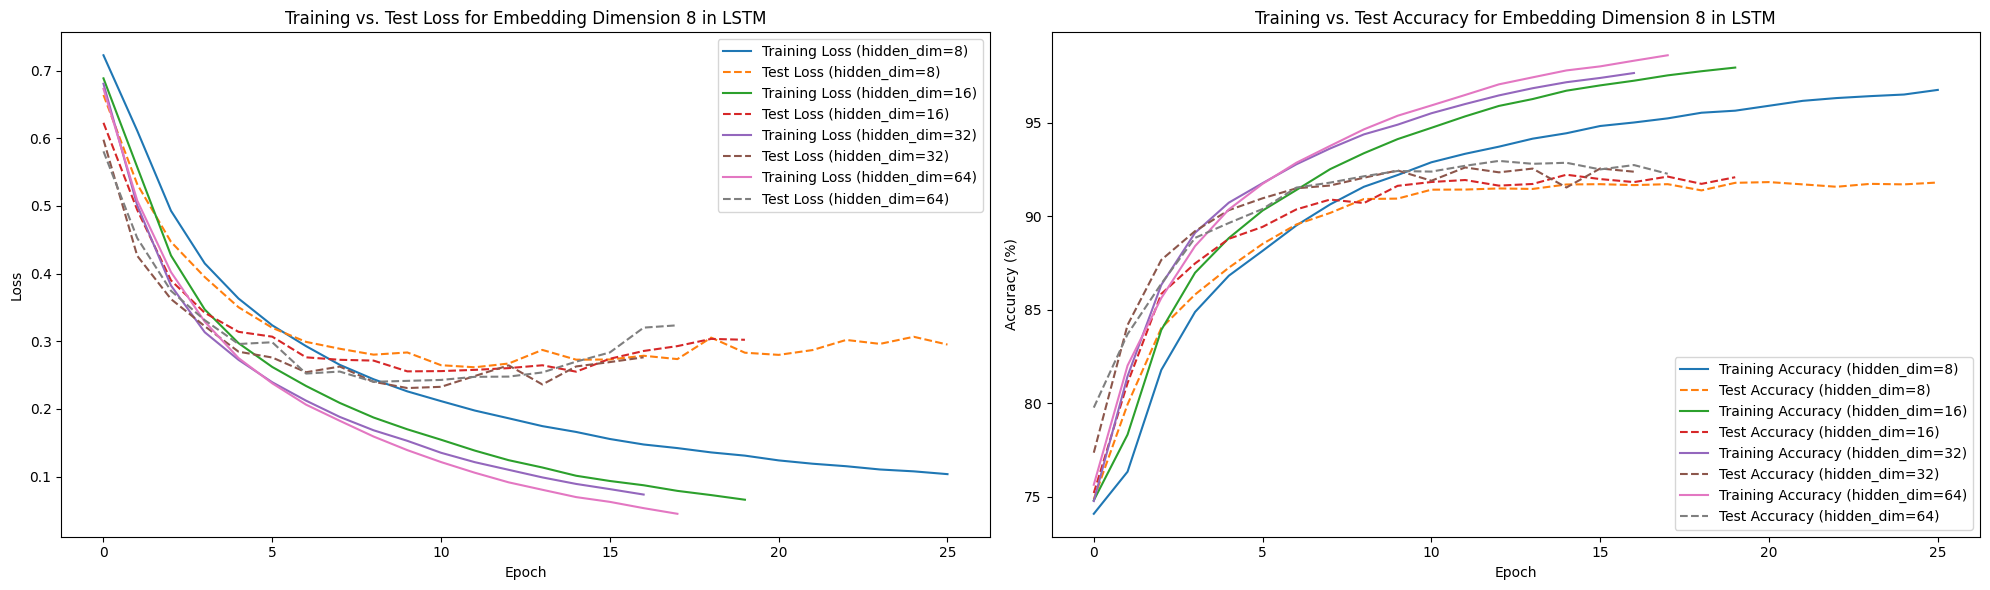

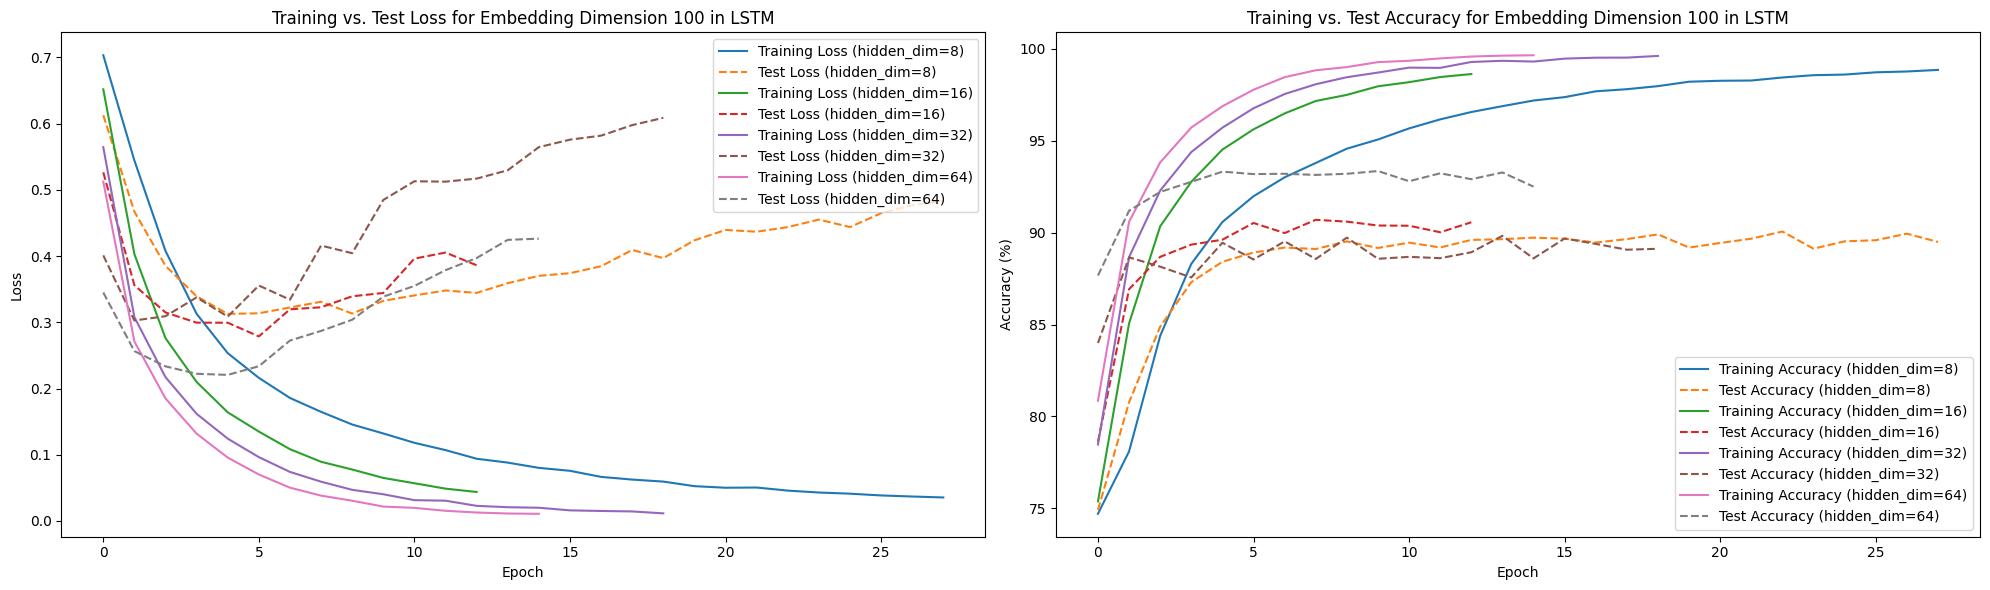

In [ ]:
# Create side-by-side graphs
for j, embedding_dim in enumerate(embedding_dims):
    # Create a new figure for each embedding dimension
    plt.figure(figsize=(20, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    for i, hidden_dim in enumerate(hidden_dims):
        plt.plot(range(len(all_lstm_train_loss_values[j * len(hidden_dims) + i])),
                 all_lstm_train_loss_values[j * len(hidden_dims) + i],
                 label=f'Training Loss (hidden_dim={hidden_dim})', linestyle='-')
        plt.plot(range(len(all_lstm_test_loss_values[j * len(hidden_dims) + i])),
                 all_lstm_test_loss_values[j * len(hidden_dims) + i],
                 label=f'Test Loss (hidden_dim={hidden_dim})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training vs. Test Loss for Embedding Dimension {embedding_dim} in LSTM')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    for i, hidden_dim in enumerate(hidden_dims):
        plt.plot(range(len(all_lstm_train_accuracy_values[j * len(hidden_dims) + i])),
                 all_lstm_train_accuracy_values[j * len(hidden_dims) + i],
                 label=f'Training Accuracy (hidden_dim={hidden_dim})', linestyle='-')
        plt.plot(range(len(all_lstm_test_accuracy_values[j * len(hidden_dims) + i])),
                 all_lstm_test_accuracy_values[j * len(hidden_dims) + i],
                 label=f'Test Accuracy (hidden_dim={hidden_dim})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training vs. Test Accuracy for Embedding Dimension {embedding_dim} in LSTM')
    plt.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


## Running GRU
The below code runs the training for the GRU sweeping through our values for the embedding dim and the hidden dim.

In [ ]:
# Instantiate and train the model
all_gru_train_loss_values = []
all_gru_train_accuracy_values = []
all_gru_test_loss_values = []
all_gru_test_accuracy_values = []

for embedding_dim in embedding_dims:
    for hidden_dim in hidden_dims:
        model = GRU(vocab_size, embedding_dim, hidden_dim, output_dim, padding_idx).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters())
        gru_train_loss_values, gru_train_accuracy_values, gru_test_loss_values, gru_test_accuracy_values = train_model(model, train_loader, test_loader, criterion, optimizer, vocab, num_epochs)

        true_labels, predicted_labels = evaluate_model(model, test_loader)
        print(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
        print(f'Classification Report for COVIDSenti GRU with {hidden_dim} hidden dimenions and {embedding_dim} embedding dimensions:')
        print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

        all_gru_train_loss_values.append(gru_train_loss_values)
        all_gru_train_accuracy_values.append(gru_train_accuracy_values)
        all_gru_test_loss_values.append(gru_test_loss_values)
        all_gru_test_accuracy_values.append(gru_test_accuracy_values)

Epoch 1/50: 100%|██████████| 2250/2250 [00:14<00:00, 152.26it/s, accuracy=74.8, loss=0.0222]


Epoch 1/50, Train Loss: 0.7116, Train Accuracy: 74.77%, Test Loss: 0.6412, Test Accuracy: 75.07%


Epoch 2/50: 100%|██████████| 2250/2250 [00:15<00:00, 142.47it/s, accuracy=77.9, loss=0.0181]


Epoch 2/50, Train Loss: 0.5792, Train Accuracy: 77.92%, Test Loss: 0.4916, Test Accuracy: 82.12%


Epoch 3/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.03it/s, accuracy=83.6, loss=0.0141]


Epoch 3/50, Train Loss: 0.4524, Train Accuracy: 83.62%, Test Loss: 0.4029, Test Accuracy: 86.14%


Epoch 4/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.50it/s, accuracy=86.3, loss=0.012] 


Epoch 4/50, Train Loss: 0.3832, Train Accuracy: 86.26%, Test Loss: 0.3604, Test Accuracy: 87.56%


Epoch 5/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.76it/s, accuracy=87.8, loss=0.0105]


Epoch 5/50, Train Loss: 0.3374, Train Accuracy: 87.85%, Test Loss: 0.3353, Test Accuracy: 88.39%


Epoch 6/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.42it/s, accuracy=89.2, loss=0.00939]


Epoch 6/50, Train Loss: 0.3004, Train Accuracy: 89.17%, Test Loss: 0.3108, Test Accuracy: 89.28%


Epoch 7/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.41it/s, accuracy=90.2, loss=0.00845]


Epoch 7/50, Train Loss: 0.2703, Train Accuracy: 90.19%, Test Loss: 0.2925, Test Accuracy: 90.01%


Epoch 8/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.87it/s, accuracy=91.2, loss=0.00765]


Epoch 8/50, Train Loss: 0.2446, Train Accuracy: 91.17%, Test Loss: 0.2862, Test Accuracy: 90.30%


Epoch 9/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.53it/s, accuracy=92, loss=0.00698]  


Epoch 9/50, Train Loss: 0.2234, Train Accuracy: 92.05%, Test Loss: 0.2766, Test Accuracy: 90.62%


Epoch 10/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.54it/s, accuracy=92.8, loss=0.00647]


Epoch 10/50, Train Loss: 0.2070, Train Accuracy: 92.77%, Test Loss: 0.2812, Test Accuracy: 90.56%


Epoch 11/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.54it/s, accuracy=93.3, loss=0.006]  


Epoch 11/50, Train Loss: 0.1921, Train Accuracy: 93.31%, Test Loss: 0.2773, Test Accuracy: 90.76%


Epoch 12/50: 100%|██████████| 2250/2250 [00:13<00:00, 167.98it/s, accuracy=94, loss=0.00549]  


Epoch 12/50, Train Loss: 0.1757, Train Accuracy: 94.01%, Test Loss: 0.2726, Test Accuracy: 90.98%


Epoch 13/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.50it/s, accuracy=94.4, loss=0.00515]


Epoch 13/50, Train Loss: 0.1647, Train Accuracy: 94.43%, Test Loss: 0.2760, Test Accuracy: 91.11%


Epoch 14/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.32it/s, accuracy=94.9, loss=0.00475]


Epoch 14/50, Train Loss: 0.1521, Train Accuracy: 94.87%, Test Loss: 0.2861, Test Accuracy: 91.03%


Epoch 15/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.06it/s, accuracy=95.3, loss=0.00445]


Epoch 15/50, Train Loss: 0.1424, Train Accuracy: 95.30%, Test Loss: 0.2958, Test Accuracy: 90.91%


Epoch 16/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.59it/s, accuracy=95.6, loss=0.00415]


Epoch 16/50, Train Loss: 0.1328, Train Accuracy: 95.59%, Test Loss: 0.2980, Test Accuracy: 91.01%


Epoch 17/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.02it/s, accuracy=95.9, loss=0.00394]


Epoch 17/50, Train Loss: 0.1261, Train Accuracy: 95.94%, Test Loss: 0.2912, Test Accuracy: 91.07%


Epoch 18/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.29it/s, accuracy=96.2, loss=0.00367]


Epoch 18/50, Train Loss: 0.1176, Train Accuracy: 96.17%, Test Loss: 0.3125, Test Accuracy: 90.82%
Stopping early at epoch 18 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: conspiracy alert is behind the coronavirus outbreak as 

Epoch 1/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.89it/s, accuracy=74.8, loss=0.0217]


Epoch 1/50, Train Loss: 0.6938, Train Accuracy: 74.78%, Test Loss: 0.5930, Test Accuracy: 78.52%


Epoch 2/50: 100%|██████████| 2250/2250 [00:13<00:00, 170.03it/s, accuracy=81.6, loss=0.016] 


Epoch 2/50, Train Loss: 0.5133, Train Accuracy: 81.57%, Test Loss: 0.4419, Test Accuracy: 84.01%


Epoch 3/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.49it/s, accuracy=85.1, loss=0.0128]


Epoch 3/50, Train Loss: 0.4091, Train Accuracy: 85.06%, Test Loss: 0.3703, Test Accuracy: 86.63%


Epoch 4/50: 100%|██████████| 2250/2250 [00:13<00:00, 167.20it/s, accuracy=87.6, loss=0.0106]


Epoch 4/50, Train Loss: 0.3404, Train Accuracy: 87.58%, Test Loss: 0.3264, Test Accuracy: 88.54%


Epoch 5/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.97it/s, accuracy=89.8, loss=0.00904]


Epoch 5/50, Train Loss: 0.2894, Train Accuracy: 89.76%, Test Loss: 0.2888, Test Accuracy: 90.24%


Epoch 6/50: 100%|██████████| 2250/2250 [00:13<00:00, 165.48it/s, accuracy=91.3, loss=0.00782]


Epoch 6/50, Train Loss: 0.2504, Train Accuracy: 91.28%, Test Loss: 0.2675, Test Accuracy: 90.99%


Epoch 7/50: 100%|██████████| 2250/2250 [00:13<00:00, 170.96it/s, accuracy=92.5, loss=0.00686]


Epoch 7/50, Train Loss: 0.2196, Train Accuracy: 92.54%, Test Loss: 0.2547, Test Accuracy: 91.69%


Epoch 8/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.81it/s, accuracy=93.7, loss=0.00601]


Epoch 8/50, Train Loss: 0.1923, Train Accuracy: 93.67%, Test Loss: 0.2452, Test Accuracy: 92.14%


Epoch 9/50: 100%|██████████| 2250/2250 [00:13<00:00, 170.34it/s, accuracy=94.4, loss=0.00538]


Epoch 9/50, Train Loss: 0.1722, Train Accuracy: 94.40%, Test Loss: 0.2425, Test Accuracy: 92.06%


Epoch 10/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.05it/s, accuracy=95, loss=0.0048]   


Epoch 10/50, Train Loss: 0.1535, Train Accuracy: 95.04%, Test Loss: 0.2417, Test Accuracy: 92.49%


Epoch 11/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.10it/s, accuracy=95.6, loss=0.00432]


Epoch 11/50, Train Loss: 0.1383, Train Accuracy: 95.58%, Test Loss: 0.2430, Test Accuracy: 92.60%


Epoch 12/50: 100%|██████████| 2250/2250 [00:13<00:00, 170.15it/s, accuracy=96.1, loss=0.0039] 


Epoch 12/50, Train Loss: 0.1248, Train Accuracy: 96.05%, Test Loss: 0.2362, Test Accuracy: 92.68%


Epoch 13/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.17it/s, accuracy=96.6, loss=0.00344]


Epoch 13/50, Train Loss: 0.1102, Train Accuracy: 96.59%, Test Loss: 0.2527, Test Accuracy: 92.58%


Epoch 14/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.69it/s, accuracy=97, loss=0.00312]  


Epoch 14/50, Train Loss: 0.0997, Train Accuracy: 96.96%, Test Loss: 0.2514, Test Accuracy: 92.67%


Epoch 15/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.89it/s, accuracy=97.2, loss=0.00282]


Epoch 15/50, Train Loss: 0.0902, Train Accuracy: 97.24%, Test Loss: 0.2505, Test Accuracy: 92.73%


Epoch 16/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.25it/s, accuracy=97.5, loss=0.00255]


Epoch 16/50, Train Loss: 0.0817, Train Accuracy: 97.54%, Test Loss: 0.2557, Test Accuracy: 92.72%


Epoch 17/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.95it/s, accuracy=97.8, loss=0.00229]


Epoch 17/50, Train Loss: 0.0733, Train Accuracy: 97.77%, Test Loss: 0.2783, Test Accuracy: 92.47%


Epoch 18/50: 100%|██████████| 2250/2250 [00:13<00:00, 172.36it/s, accuracy=98.1, loss=0.00205]


Epoch 18/50, Train Loss: 0.0655, Train Accuracy: 98.09%, Test Loss: 0.2786, Test Accuracy: 92.88%


Epoch 19/50: 100%|██████████| 2250/2250 [00:13<00:00, 171.42it/s, accuracy=98.3, loss=0.00191]


Epoch 19/50, Train Loss: 0.0610, Train Accuracy: 98.30%, Test Loss: 0.2850, Test Accuracy: 92.55%


Epoch 20/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.30it/s, accuracy=98.4, loss=0.0017] 


Epoch 20/50, Train Loss: 0.0544, Train Accuracy: 98.44%, Test Loss: 0.3006, Test Accuracy: 92.66%


Epoch 21/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.07it/s, accuracy=98.6, loss=0.00155]


Epoch 21/50, Train Loss: 0.0495, Train Accuracy: 98.62%, Test Loss: 0.3149, Test Accuracy: 92.30%


Epoch 22/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.54it/s, accuracy=98.7, loss=0.00144]


Epoch 22/50, Train Loss: 0.0460, Train Accuracy: 98.68%, Test Loss: 0.3144, Test Accuracy: 92.52%


Epoch 23/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.45it/s, accuracy=98.8, loss=0.00132]


Epoch 23/50, Train Loss: 0.0422, Train Accuracy: 98.83%, Test Loss: 0.3141, Test Accuracy: 92.48%
Stopping early at epoch 23 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinema

Epoch 1/50: 100%|██████████| 2250/2250 [00:13<00:00, 165.17it/s, accuracy=75.1, loss=0.0213]


Epoch 1/50, Train Loss: 0.6827, Train Accuracy: 75.12%, Test Loss: 0.6028, Test Accuracy: 77.07%


Epoch 2/50: 100%|██████████| 2250/2250 [00:13<00:00, 167.46it/s, accuracy=81.2, loss=0.0157]


Epoch 2/50, Train Loss: 0.5034, Train Accuracy: 81.22%, Test Loss: 0.4603, Test Accuracy: 82.97%


Epoch 3/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.80it/s, accuracy=86.1, loss=0.012] 


Epoch 3/50, Train Loss: 0.3845, Train Accuracy: 86.06%, Test Loss: 0.4334, Test Accuracy: 82.64%


Epoch 4/50: 100%|██████████| 2250/2250 [00:13<00:00, 168.98it/s, accuracy=88.8, loss=0.00969]


Epoch 4/50, Train Loss: 0.3102, Train Accuracy: 88.84%, Test Loss: 0.3817, Test Accuracy: 84.92%


Epoch 5/50: 100%|██████████| 2250/2250 [00:13<00:00, 167.00it/s, accuracy=91, loss=0.00814]  


Epoch 5/50, Train Loss: 0.2605, Train Accuracy: 90.96%, Test Loss: 0.4724, Test Accuracy: 80.28%


Epoch 6/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.19it/s, accuracy=92.3, loss=0.00696]


Epoch 6/50, Train Loss: 0.2228, Train Accuracy: 92.34%, Test Loss: 0.4849, Test Accuracy: 80.35%


Epoch 7/50: 100%|██████████| 2250/2250 [00:13<00:00, 166.42it/s, accuracy=93.4, loss=0.00608]


Epoch 7/50, Train Loss: 0.1947, Train Accuracy: 93.42%, Test Loss: 0.4490, Test Accuracy: 81.69%


Epoch 8/50: 100%|██████████| 2250/2250 [00:13<00:00, 170.51it/s, accuracy=94.3, loss=0.00527]


Epoch 8/50, Train Loss: 0.1686, Train Accuracy: 94.33%, Test Loss: 0.4484, Test Accuracy: 81.83%


Epoch 9/50: 100%|██████████| 2250/2250 [00:13<00:00, 169.20it/s, accuracy=95, loss=0.00462]  


Epoch 9/50, Train Loss: 0.1478, Train Accuracy: 95.05%, Test Loss: 0.5137, Test Accuracy: 81.67%
Stopping early at epoch 9 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: can lysol and clorox products kill the novel coronavirus the answer is complicated <PAD> <P

Epoch 1/50: 100%|██████████| 2250/2250 [00:11<00:00, 188.32it/s, accuracy=75.7, loss=0.0209]


Epoch 1/50, Train Loss: 0.6687, Train Accuracy: 75.67%, Test Loss: 0.5434, Test Accuracy: 80.56%


Epoch 2/50: 100%|██████████| 2250/2250 [00:11<00:00, 194.24it/s, accuracy=83.3, loss=0.0147]


Epoch 2/50, Train Loss: 0.4715, Train Accuracy: 83.34%, Test Loss: 0.4020, Test Accuracy: 85.94%


Epoch 3/50: 100%|██████████| 2250/2250 [00:11<00:00, 190.97it/s, accuracy=87.3, loss=0.0114]


Epoch 3/50, Train Loss: 0.3639, Train Accuracy: 87.26%, Test Loss: 0.3509, Test Accuracy: 87.88%


Epoch 4/50: 100%|██████████| 2250/2250 [00:11<00:00, 193.02it/s, accuracy=89.3, loss=0.00953]


Epoch 4/50, Train Loss: 0.3050, Train Accuracy: 89.25%, Test Loss: 0.3094, Test Accuracy: 89.44%


Epoch 5/50: 100%|██████████| 2250/2250 [00:11<00:00, 193.15it/s, accuracy=90.8, loss=0.00814]


Epoch 5/50, Train Loss: 0.2605, Train Accuracy: 90.84%, Test Loss: 0.2817, Test Accuracy: 90.04%


Epoch 6/50: 100%|██████████| 2250/2250 [00:11<00:00, 193.20it/s, accuracy=92.2, loss=0.00697]


Epoch 6/50, Train Loss: 0.2232, Train Accuracy: 92.24%, Test Loss: 0.2593, Test Accuracy: 91.39%


Epoch 7/50: 100%|██████████| 2250/2250 [00:11<00:00, 193.95it/s, accuracy=93.4, loss=0.00605]


Epoch 7/50, Train Loss: 0.1935, Train Accuracy: 93.39%, Test Loss: 0.2526, Test Accuracy: 91.93%


Epoch 8/50: 100%|██████████| 2250/2250 [00:11<00:00, 190.63it/s, accuracy=94.4, loss=0.00524]


Epoch 8/50, Train Loss: 0.1677, Train Accuracy: 94.35%, Test Loss: 0.2420, Test Accuracy: 92.08%


Epoch 9/50: 100%|██████████| 2250/2250 [00:11<00:00, 194.18it/s, accuracy=95.2, loss=0.00452]


Epoch 9/50, Train Loss: 0.1446, Train Accuracy: 95.22%, Test Loss: 0.2283, Test Accuracy: 92.63%


Epoch 10/50: 100%|██████████| 2250/2250 [00:11<00:00, 192.45it/s, accuracy=95.9, loss=0.00393]


Epoch 10/50, Train Loss: 0.1258, Train Accuracy: 95.86%, Test Loss: 0.2296, Test Accuracy: 92.37%


Epoch 11/50: 100%|██████████| 2250/2250 [00:11<00:00, 193.89it/s, accuracy=96.5, loss=0.0034] 


Epoch 11/50, Train Loss: 0.1088, Train Accuracy: 96.47%, Test Loss: 0.2309, Test Accuracy: 92.74%


Epoch 12/50: 100%|██████████| 2250/2250 [00:11<00:00, 194.72it/s, accuracy=97, loss=0.00293]  


Epoch 12/50, Train Loss: 0.0937, Train Accuracy: 96.98%, Test Loss: 0.2512, Test Accuracy: 92.82%


Epoch 13/50: 100%|██████████| 2250/2250 [00:11<00:00, 191.31it/s, accuracy=97.4, loss=0.00255]


Epoch 13/50, Train Loss: 0.0816, Train Accuracy: 97.37%, Test Loss: 0.2620, Test Accuracy: 92.57%


Epoch 14/50: 100%|██████████| 2250/2250 [00:11<00:00, 194.44it/s, accuracy=97.8, loss=0.00224]


Epoch 14/50, Train Loss: 0.0716, Train Accuracy: 97.75%, Test Loss: 0.2713, Test Accuracy: 92.78%


Epoch 15/50: 100%|██████████| 2250/2250 [00:11<00:00, 189.71it/s, accuracy=98.1, loss=0.00189]


Epoch 15/50, Train Loss: 0.0604, Train Accuracy: 98.14%, Test Loss: 0.2825, Test Accuracy: 92.51%


Epoch 16/50: 100%|██████████| 2250/2250 [00:11<00:00, 189.37it/s, accuracy=98.3, loss=0.00166]


Epoch 16/50, Train Loss: 0.0532, Train Accuracy: 98.29%, Test Loss: 0.3076, Test Accuracy: 92.43%


Epoch 17/50: 100%|██████████| 2250/2250 [00:11<00:00, 192.73it/s, accuracy=98.5, loss=0.00142]


Epoch 17/50, Train Loss: 0.0456, Train Accuracy: 98.55%, Test Loss: 0.3146, Test Accuracy: 92.37%
Stopping early at epoch 17 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: picture this its 2024 the corona virus has killed 23 of the worlds population the only survivors are gen z and
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PA

Epoch 1/50: 100%|██████████| 2250/2250 [00:15<00:00, 145.31it/s, accuracy=73.9, loss=0.0221]


Epoch 1/50, Train Loss: 0.7067, Train Accuracy: 73.91%, Test Loss: 0.5830, Test Accuracy: 76.63%


Epoch 2/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.15it/s, accuracy=82.1, loss=0.0146]


Epoch 2/50, Train Loss: 0.4670, Train Accuracy: 82.13%, Test Loss: 0.3741, Test Accuracy: 85.99%


Epoch 3/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.82it/s, accuracy=88.5, loss=0.01]  


Epoch 3/50, Train Loss: 0.3210, Train Accuracy: 88.52%, Test Loss: 0.3209, Test Accuracy: 87.89%


Epoch 4/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.04it/s, accuracy=91.2, loss=0.00785]


Epoch 4/50, Train Loss: 0.2513, Train Accuracy: 91.20%, Test Loss: 0.2903, Test Accuracy: 89.24%


Epoch 5/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.51it/s, accuracy=93.1, loss=0.00631]


Epoch 5/50, Train Loss: 0.2019, Train Accuracy: 93.13%, Test Loss: 0.2883, Test Accuracy: 89.81%


Epoch 6/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.83it/s, accuracy=94.3, loss=0.00531]


Epoch 6/50, Train Loss: 0.1700, Train Accuracy: 94.25%, Test Loss: 0.2917, Test Accuracy: 89.62%


Epoch 7/50: 100%|██████████| 2250/2250 [00:15<00:00, 147.38it/s, accuracy=95.2, loss=0.00454]


Epoch 7/50, Train Loss: 0.1452, Train Accuracy: 95.23%, Test Loss: 0.3012, Test Accuracy: 89.63%


Epoch 8/50: 100%|██████████| 2250/2250 [00:15<00:00, 145.71it/s, accuracy=95.8, loss=0.00398]


Epoch 8/50, Train Loss: 0.1274, Train Accuracy: 95.82%, Test Loss: 0.3089, Test Accuracy: 89.85%


Epoch 9/50: 100%|██████████| 2250/2250 [00:15<00:00, 145.53it/s, accuracy=96.4, loss=0.00343]


Epoch 9/50, Train Loss: 0.1099, Train Accuracy: 96.38%, Test Loss: 0.3184, Test Accuracy: 89.91%


Epoch 10/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.67it/s, accuracy=96.9, loss=0.00306]


Epoch 10/50, Train Loss: 0.0978, Train Accuracy: 96.86%, Test Loss: 0.3427, Test Accuracy: 89.70%


Epoch 11/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.28it/s, accuracy=97.2, loss=0.00273]


Epoch 11/50, Train Loss: 0.0873, Train Accuracy: 97.23%, Test Loss: 0.3587, Test Accuracy: 89.74%


Epoch 12/50: 100%|██████████| 2250/2250 [00:15<00:00, 146.82it/s, accuracy=97.5, loss=0.00252]


Epoch 12/50, Train Loss: 0.0805, Train Accuracy: 97.49%, Test Loss: 0.3571, Test Accuracy: 89.81%


Epoch 13/50: 100%|██████████| 2250/2250 [00:15<00:00, 143.39it/s, accuracy=97.7, loss=0.0023] 


Epoch 13/50, Train Loss: 0.0737, Train Accuracy: 97.70%, Test Loss: 0.3802, Test Accuracy: 89.69%


Epoch 14/50: 100%|██████████| 2250/2250 [00:15<00:00, 144.31it/s, accuracy=97.9, loss=0.00208]


Epoch 14/50, Train Loss: 0.0664, Train Accuracy: 97.94%, Test Loss: 0.3869, Test Accuracy: 89.51%
Stopping early at epoch 14 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: you can now go to jail in china for criticizing beijings coronavirus response <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <P

Epoch 1/50: 100%|██████████| 2250/2250 [00:15<00:00, 143.35it/s, accuracy=75.8, loss=0.0199]


Epoch 1/50, Train Loss: 0.6369, Train Accuracy: 75.79%, Test Loss: 0.4618, Test Accuracy: 82.23%


Epoch 2/50: 100%|██████████| 2250/2250 [00:15<00:00, 145.42it/s, accuracy=86.5, loss=0.0115]


Epoch 2/50, Train Loss: 0.3677, Train Accuracy: 86.54%, Test Loss: 0.3082, Test Accuracy: 88.93%


Epoch 3/50: 100%|██████████| 2250/2250 [00:15<00:00, 144.48it/s, accuracy=90.9, loss=0.00808]


Epoch 3/50, Train Loss: 0.2587, Train Accuracy: 90.92%, Test Loss: 0.2798, Test Accuracy: 89.96%


Epoch 4/50: 100%|██████████| 2250/2250 [00:15<00:00, 144.55it/s, accuracy=93.3, loss=0.00614]


Epoch 4/50, Train Loss: 0.1964, Train Accuracy: 93.35%, Test Loss: 0.2680, Test Accuracy: 90.58%


Epoch 5/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.33it/s, accuracy=94.9, loss=0.00477]


Epoch 5/50, Train Loss: 0.1527, Train Accuracy: 94.91%, Test Loss: 0.2688, Test Accuracy: 91.18%


Epoch 6/50: 100%|██████████| 2250/2250 [00:17<00:00, 130.52it/s, accuracy=96.1, loss=0.00369]


Epoch 6/50, Train Loss: 0.1179, Train Accuracy: 96.15%, Test Loss: 0.2792, Test Accuracy: 91.41%


Epoch 7/50: 100%|██████████| 2250/2250 [00:18<00:00, 123.53it/s, accuracy=97, loss=0.00301]  


Epoch 7/50, Train Loss: 0.0963, Train Accuracy: 96.98%, Test Loss: 0.2937, Test Accuracy: 90.93%


Epoch 8/50: 100%|██████████| 2250/2250 [00:20<00:00, 109.70it/s, accuracy=97.5, loss=0.00246]


Epoch 8/50, Train Loss: 0.0788, Train Accuracy: 97.48%, Test Loss: 0.3029, Test Accuracy: 91.34%


Epoch 9/50: 100%|██████████| 2250/2250 [00:17<00:00, 130.33it/s, accuracy=98, loss=0.00204]  


Epoch 9/50, Train Loss: 0.0653, Train Accuracy: 97.96%, Test Loss: 0.3282, Test Accuracy: 91.29%


Epoch 10/50: 100%|██████████| 2250/2250 [00:16<00:00, 135.61it/s, accuracy=98.4, loss=0.00167]


Epoch 10/50, Train Loss: 0.0534, Train Accuracy: 98.37%, Test Loss: 0.3514, Test Accuracy: 91.18%


Epoch 11/50: 100%|██████████| 2250/2250 [00:16<00:00, 136.47it/s, accuracy=98.6, loss=0.00143]


Epoch 11/50, Train Loss: 0.0457, Train Accuracy: 98.58%, Test Loss: 0.3692, Test Accuracy: 91.41%
Stopping early at epoch 11 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: picture this its 2024 the corona virus has killed 23 of the worlds population the only survivors are gen z and
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: when my bf told me about coronavirus hysteria i almost got worried about getting sick then he said y

Epoch 1/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.13it/s, accuracy=79.6, loss=0.0173]


Epoch 1/50, Train Loss: 0.5536, Train Accuracy: 79.58%, Test Loss: 0.3530, Test Accuracy: 87.09%


Epoch 2/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.65it/s, accuracy=89.5, loss=0.0092] 


Epoch 2/50, Train Loss: 0.2944, Train Accuracy: 89.51%, Test Loss: 0.2680, Test Accuracy: 90.66%


Epoch 3/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.46it/s, accuracy=93, loss=0.00644]  


Epoch 3/50, Train Loss: 0.2060, Train Accuracy: 93.05%, Test Loss: 0.2300, Test Accuracy: 92.41%


Epoch 4/50: 100%|██████████| 2250/2250 [00:18<00:00, 121.03it/s, accuracy=95, loss=0.00476]  


Epoch 4/50, Train Loss: 0.1524, Train Accuracy: 94.97%, Test Loss: 0.2168, Test Accuracy: 92.83%


Epoch 5/50: 100%|██████████| 2250/2250 [00:20<00:00, 108.54it/s, accuracy=96.2, loss=0.0036] 


Epoch 5/50, Train Loss: 0.1151, Train Accuracy: 96.18%, Test Loss: 0.2317, Test Accuracy: 92.81%


Epoch 6/50: 100%|██████████| 2250/2250 [00:18<00:00, 122.61it/s, accuracy=97.2, loss=0.0027] 


Epoch 6/50, Train Loss: 0.0862, Train Accuracy: 97.23%, Test Loss: 0.2417, Test Accuracy: 92.99%


Epoch 7/50: 100%|██████████| 2250/2250 [00:16<00:00, 139.33it/s, accuracy=97.9, loss=0.00206]


Epoch 7/50, Train Loss: 0.0658, Train Accuracy: 97.93%, Test Loss: 0.2531, Test Accuracy: 93.16%


Epoch 8/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.17it/s, accuracy=98.3, loss=0.00165]


Epoch 8/50, Train Loss: 0.0527, Train Accuracy: 98.34%, Test Loss: 0.2699, Test Accuracy: 93.19%


Epoch 9/50: 100%|██████████| 2250/2250 [00:16<00:00, 133.75it/s, accuracy=98.7, loss=0.00133]


Epoch 9/50, Train Loss: 0.0427, Train Accuracy: 98.67%, Test Loss: 0.2921, Test Accuracy: 92.79%


Epoch 10/50: 100%|██████████| 2250/2250 [00:16<00:00, 135.40it/s, accuracy=98.9, loss=0.0011] 


Epoch 10/50, Train Loss: 0.0353, Train Accuracy: 98.87%, Test Loss: 0.2929, Test Accuracy: 93.17%


Epoch 11/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.52it/s, accuracy=99.1, loss=0.000884]


Epoch 11/50, Train Loss: 0.0283, Train Accuracy: 99.08%, Test Loss: 0.2986, Test Accuracy: 93.17%


Epoch 12/50: 100%|██████████| 2250/2250 [00:20<00:00, 107.94it/s, accuracy=99.2, loss=0.000732]


Epoch 12/50, Train Loss: 0.0234, Train Accuracy: 99.23%, Test Loss: 0.3565, Test Accuracy: 92.58%


Epoch 13/50: 100%|██████████| 2250/2250 [00:20<00:00, 110.50it/s, accuracy=99.3, loss=0.000624]


Epoch 13/50, Train Loss: 0.0200, Train Accuracy: 99.35%, Test Loss: 0.3718, Test Accuracy: 92.76%
Stopping early at epoch 13 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: there is no difference of opinion about how long coronavirus stays on surfaces study shows <UNK> days on surfaces <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: the coronavirus and trumps diseased credibility via <PAD> <

Epoch 1/50: 100%|██████████| 2250/2250 [00:19<00:00, 117.32it/s, accuracy=82.2, loss=0.0153]


Epoch 1/50, Train Loss: 0.4903, Train Accuracy: 82.23%, Test Loss: 0.3187, Test Accuracy: 89.16%


Epoch 2/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.05it/s, accuracy=91.4, loss=0.00792]


Epoch 2/50, Train Loss: 0.2536, Train Accuracy: 91.43%, Test Loss: 0.2510, Test Accuracy: 91.68%


Epoch 3/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.02it/s, accuracy=94.4, loss=0.00525]


Epoch 3/50, Train Loss: 0.1679, Train Accuracy: 94.44%, Test Loss: 0.2170, Test Accuracy: 92.75%


Epoch 4/50: 100%|██████████| 2250/2250 [00:20<00:00, 112.04it/s, accuracy=96.3, loss=0.00359]


Epoch 4/50, Train Loss: 0.1148, Train Accuracy: 96.29%, Test Loss: 0.2062, Test Accuracy: 93.25%


Epoch 5/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.27it/s, accuracy=97.6, loss=0.00243]


Epoch 5/50, Train Loss: 0.0777, Train Accuracy: 97.56%, Test Loss: 0.2345, Test Accuracy: 93.16%


Epoch 6/50: 100%|██████████| 2250/2250 [00:20<00:00, 109.02it/s, accuracy=98.3, loss=0.0017] 


Epoch 6/50, Train Loss: 0.0543, Train Accuracy: 98.30%, Test Loss: 0.2416, Test Accuracy: 93.24%


Epoch 7/50: 100%|██████████| 2250/2250 [00:18<00:00, 122.24it/s, accuracy=98.8, loss=0.00119]


Epoch 7/50, Train Loss: 0.0382, Train Accuracy: 98.79%, Test Loss: 0.2671, Test Accuracy: 93.35%


Epoch 8/50: 100%|██████████| 2250/2250 [00:21<00:00, 105.68it/s, accuracy=99.1, loss=0.000862]


Epoch 8/50, Train Loss: 0.0276, Train Accuracy: 99.11%, Test Loss: 0.3017, Test Accuracy: 92.89%


Epoch 9/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.02it/s, accuracy=99.2, loss=0.000721]


Epoch 9/50, Train Loss: 0.0231, Train Accuracy: 99.25%, Test Loss: 0.3034, Test Accuracy: 93.41%


Epoch 10/50: 100%|██████████| 2250/2250 [00:22<00:00, 98.79it/s, accuracy=99.4, loss=0.000577] 


Epoch 10/50, Train Loss: 0.0185, Train Accuracy: 99.41%, Test Loss: 0.3282, Test Accuracy: 93.16%


Epoch 11/50: 100%|██████████| 2250/2250 [00:20<00:00, 108.05it/s, accuracy=99.4, loss=0.000524]


Epoch 11/50, Train Loss: 0.0168, Train Accuracy: 99.45%, Test Loss: 0.3480, Test Accuracy: 93.43%


Epoch 12/50: 100%|██████████| 2250/2250 [00:17<00:00, 127.25it/s, accuracy=99.6, loss=0.000456]


Epoch 12/50, Train Loss: 0.0146, Train Accuracy: 99.55%, Test Loss: 0.3442, Test Accuracy: 93.53%


Epoch 13/50: 100%|██████████| 2250/2250 [00:16<00:00, 135.65it/s, accuracy=99.6, loss=0.000404]


Epoch 13/50, Train Loss: 0.0129, Train Accuracy: 99.59%, Test Loss: 0.3861, Test Accuracy: 92.80%


Epoch 14/50: 100%|██████████| 2250/2250 [00:17<00:00, 129.59it/s, accuracy=99.7, loss=0.000321]


Epoch 14/50, Train Loss: 0.0103, Train Accuracy: 99.65%, Test Loss: 0.3686, Test Accuracy: 93.02%


Epoch 15/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.61it/s, accuracy=99.7, loss=0.000318]


Epoch 15/50, Train Loss: 0.0102, Train Accuracy: 99.67%, Test Loss: 0.4087, Test Accuracy: 93.01%


Epoch 16/50: 100%|██████████| 2250/2250 [00:18<00:00, 122.33it/s, accuracy=99.7, loss=0.000316]


Epoch 16/50, Train Loss: 0.0101, Train Accuracy: 99.67%, Test Loss: 0.3956, Test Accuracy: 92.82%


Epoch 17/50: 100%|██████████| 2250/2250 [00:16<00:00, 135.15it/s, accuracy=99.7, loss=0.000308]


Epoch 17/50, Train Loss: 0.0099, Train Accuracy: 99.71%, Test Loss: 0.3690, Test Accuracy: 93.36%
Stopping early at epoch 17 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: you can now go to jail in china for criticizing beijings coronavirus response <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: every 10 years the airlines in average are hit by a disaster <UNK> 911 sarsvirus coronavirus hongkong <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> 

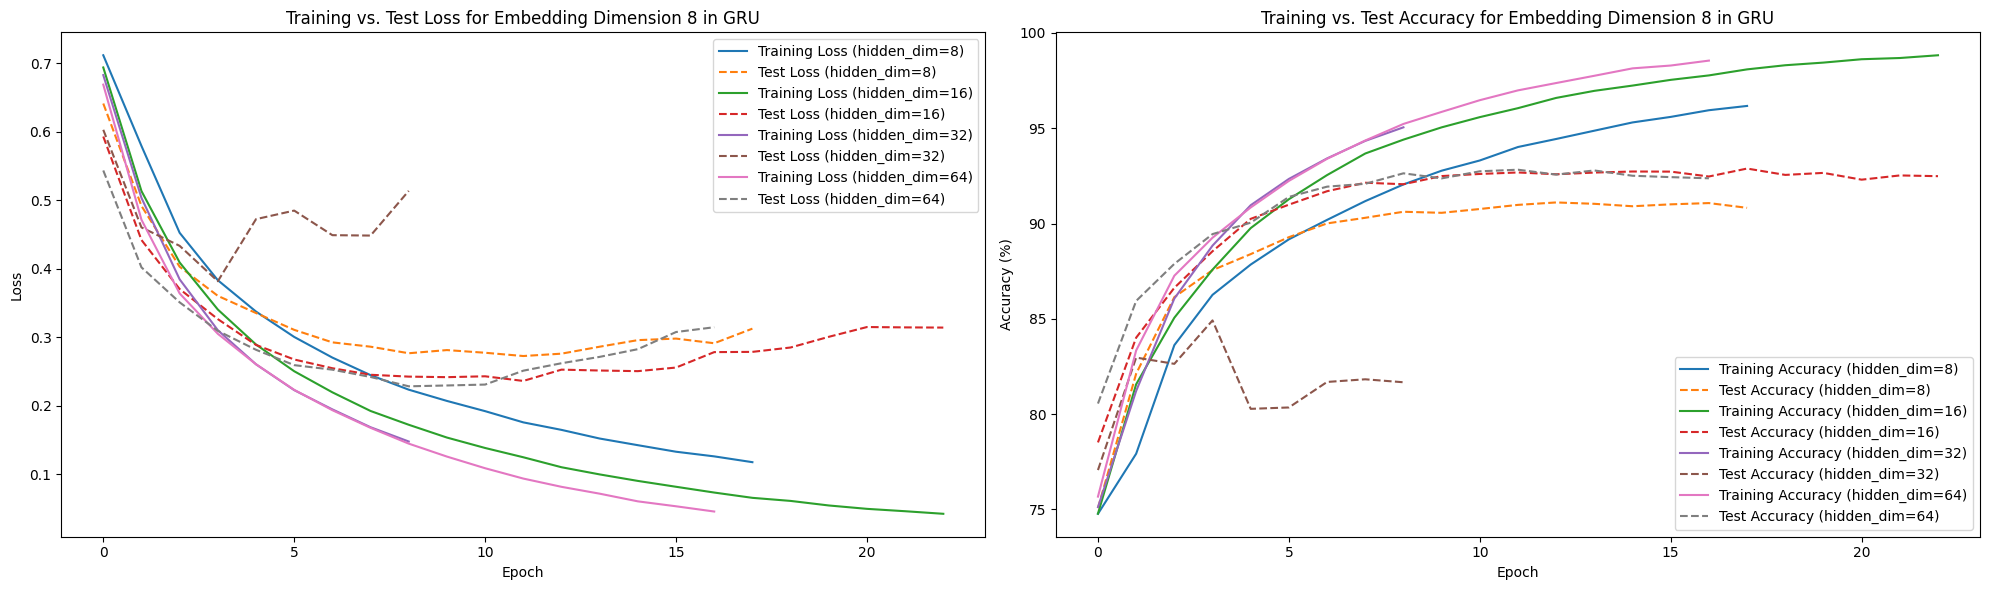

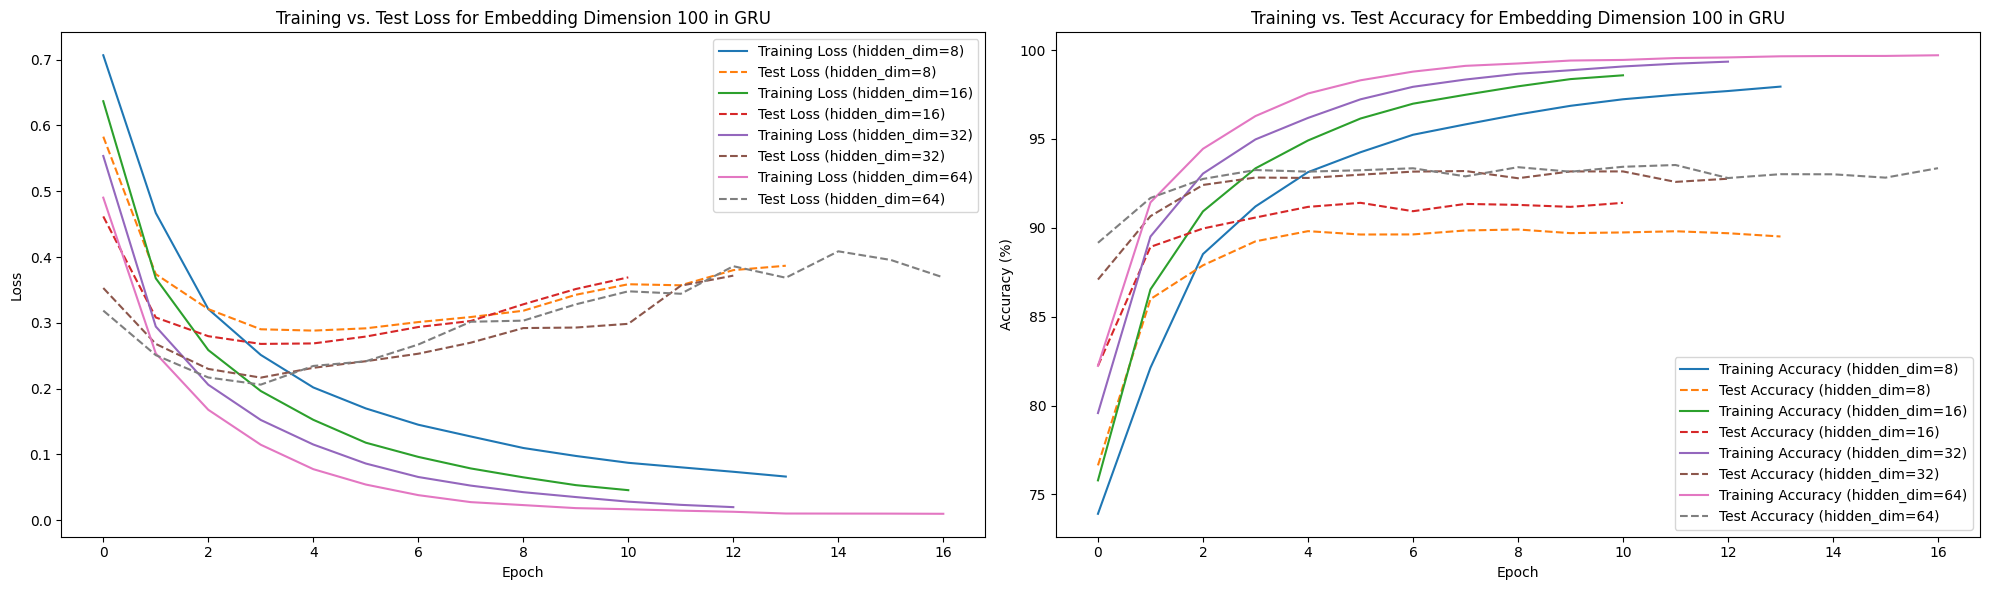

In [ ]:
# Create side-by-side graphs for GRU
for j, embedding_dim in enumerate(embedding_dims):
    # Create a new figure for each embedding dimension
    plt.figure(figsize=(20, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    for i, hidden_dim in enumerate(hidden_dims):
        plt.plot(range(len(all_gru_train_loss_values[j * len(hidden_dims) + i])),
                 all_gru_train_loss_values[j * len(hidden_dims) + i],
                 label=f'Training Loss (hidden_dim={hidden_dim})', linestyle='-')
        plt.plot(range(len(all_gru_test_loss_values[j * len(hidden_dims) + i])),
                 all_gru_test_loss_values[j * len(hidden_dims) + i],
                 label=f'Test Loss (hidden_dim={hidden_dim})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training vs. Test Loss for Embedding Dimension {embedding_dim} in GRU')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    for i, hidden_dim in enumerate(hidden_dims):
        plt.plot(range(len(all_gru_train_accuracy_values[j * len(hidden_dims) + i])),
                 all_gru_train_accuracy_values[j * len(hidden_dims) + i],
                 label=f'Training Accuracy (hidden_dim={hidden_dim})', linestyle='-')
        plt.plot(range(len(all_gru_test_accuracy_values[j * len(hidden_dims) + i])),
                 all_gru_test_accuracy_values[j * len(hidden_dims) + i],
                 label=f'Test Accuracy (hidden_dim={hidden_dim})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training vs. Test Accuracy for Embedding Dimension {embedding_dim} in GRU')
    plt.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()



## Running Transformer
The below code runs the training for the Transformer sweeping through our values for the embedding dim and the hidden dim. With the new added parameters for the Transformer.

In [ ]:
# Transformer Parameters
num_heads = 4
num_layers = 2

In [ ]:
all_transformer_train_loss_values = []
all_transformer_train_accuracy_values = []
all_transformer_test_loss_values = []
all_transformer_test_accuracy_values = []

for embedding_dim in embedding_dims:
    for hidden_dim in hidden_dims:
        model = TransformerSentimentModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        num_heads=num_heads,
        hidden_dim=hidden_dim,
        output_dim=output_dim,
        num_layers=num_layers,
        padding_idx=padding_idx
        ).to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters())
        transformer_train_loss_values, transformer_train_accuracy_values, transformer_test_loss_values, transformer_test_accuracy_values = train_model(model, train_loader, test_loader, criterion, optimizer, vocab, num_epochs)

        true_labels, predicted_labels = evaluate_model(model, test_loader)
        print(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
        print(f'Classification Report for COVIDSenti Transformer with {hidden_dim} hidden dimenions and {embedding_dim} embedding dimensions:')
        print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

        all_transformer_train_loss_values.append(transformer_train_loss_values)
        all_transformer_train_accuracy_values.append(transformer_train_accuracy_values)
        all_transformer_test_loss_values.append(transformer_test_loss_values)
        all_transformer_test_accuracy_values.append(transformer_test_accuracy_values)



C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch 1/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.83it/s, accuracy=74.5, loss=0.0225]


Epoch 1/50, Train Loss: 0.7210, Train Accuracy: 74.47%, Test Loss: 0.6759, Test Accuracy: 74.84%


Epoch 2/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.75it/s, accuracy=75.8, loss=0.0201]


Epoch 2/50, Train Loss: 0.6420, Train Accuracy: 75.82%, Test Loss: 0.5559, Test Accuracy: 80.73%


Epoch 3/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.20it/s, accuracy=81.1, loss=0.0168]


Epoch 3/50, Train Loss: 0.5373, Train Accuracy: 81.14%, Test Loss: 0.4880, Test Accuracy: 83.59%


Epoch 4/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.17it/s, accuracy=83.3, loss=0.015] 


Epoch 4/50, Train Loss: 0.4801, Train Accuracy: 83.30%, Test Loss: 0.4365, Test Accuracy: 84.79%


Epoch 5/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.20it/s, accuracy=84.6, loss=0.0135]


Epoch 5/50, Train Loss: 0.4320, Train Accuracy: 84.58%, Test Loss: 0.3874, Test Accuracy: 86.78%


Epoch 6/50: 100%|██████████| 2250/2250 [00:19<00:00, 118.14it/s, accuracy=86, loss=0.0122]  


Epoch 6/50, Train Loss: 0.3912, Train Accuracy: 86.04%, Test Loss: 0.3535, Test Accuracy: 88.07%


Epoch 7/50: 100%|██████████| 2250/2250 [00:20<00:00, 112.00it/s, accuracy=87.2, loss=0.0112]


Epoch 7/50, Train Loss: 0.3576, Train Accuracy: 87.16%, Test Loss: 0.3232, Test Accuracy: 89.51%


Epoch 8/50: 100%|██████████| 2250/2250 [00:26<00:00, 84.37it/s, accuracy=88.4, loss=0.0103]


Epoch 8/50, Train Loss: 0.3303, Train Accuracy: 88.40%, Test Loss: 0.3155, Test Accuracy: 90.11%


Epoch 9/50: 100%|██████████| 2250/2250 [00:29<00:00, 76.09it/s, accuracy=89.1, loss=0.00967] 


Epoch 9/50, Train Loss: 0.3093, Train Accuracy: 89.11%, Test Loss: 0.3121, Test Accuracy: 90.51%


Epoch 10/50: 100%|██████████| 2250/2250 [00:28<00:00, 80.04it/s, accuracy=89.9, loss=0.00916]


Epoch 10/50, Train Loss: 0.2930, Train Accuracy: 89.87%, Test Loss: 0.2973, Test Accuracy: 91.07%


Epoch 11/50: 100%|██████████| 2250/2250 [00:32<00:00, 70.05it/s, accuracy=90.4, loss=0.00882]


Epoch 11/50, Train Loss: 0.2823, Train Accuracy: 90.40%, Test Loss: 0.2953, Test Accuracy: 91.29%


Epoch 12/50: 100%|██████████| 2250/2250 [00:28<00:00, 80.29it/s, accuracy=90.8, loss=0.00844]


Epoch 12/50, Train Loss: 0.2701, Train Accuracy: 90.83%, Test Loss: 0.2922, Test Accuracy: 91.48%


Epoch 13/50: 100%|██████████| 2250/2250 [00:28<00:00, 78.51it/s, accuracy=91.3, loss=0.00803]


Epoch 13/50, Train Loss: 0.2571, Train Accuracy: 91.27%, Test Loss: 0.2948, Test Accuracy: 91.60%


Epoch 14/50: 100%|██████████| 2250/2250 [00:26<00:00, 83.46it/s, accuracy=91.8, loss=0.00775]


Epoch 14/50, Train Loss: 0.2481, Train Accuracy: 91.77%, Test Loss: 0.2955, Test Accuracy: 91.75%


Epoch 15/50: 100%|██████████| 2250/2250 [00:19<00:00, 117.59it/s, accuracy=92.2, loss=0.00743]


Epoch 15/50, Train Loss: 0.2377, Train Accuracy: 92.23%, Test Loss: 0.2929, Test Accuracy: 91.85%


Epoch 16/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.44it/s, accuracy=92.5, loss=0.00716]


Epoch 16/50, Train Loss: 0.2290, Train Accuracy: 92.51%, Test Loss: 0.2982, Test Accuracy: 91.84%


Epoch 17/50: 100%|██████████| 2250/2250 [00:20<00:00, 110.18it/s, accuracy=92.7, loss=0.00698]


Epoch 17/50, Train Loss: 0.2232, Train Accuracy: 92.65%, Test Loss: 0.2975, Test Accuracy: 92.05%


Epoch 18/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.66it/s, accuracy=93, loss=0.00678]  


Epoch 18/50, Train Loss: 0.2168, Train Accuracy: 93.03%, Test Loss: 0.3104, Test Accuracy: 91.94%


Epoch 19/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.15it/s, accuracy=93.4, loss=0.00651]


Epoch 19/50, Train Loss: 0.2084, Train Accuracy: 93.42%, Test Loss: 0.3100, Test Accuracy: 92.24%


Epoch 20/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.12it/s, accuracy=93.7, loss=0.00633]


Epoch 20/50, Train Loss: 0.2026, Train Accuracy: 93.67%, Test Loss: 0.3151, Test Accuracy: 92.06%


Epoch 21/50: 100%|██████████| 2250/2250 [00:18<00:00, 120.61it/s, accuracy=94, loss=0.00606]  


Epoch 21/50, Train Loss: 0.1938, Train Accuracy: 93.98%, Test Loss: 0.3143, Test Accuracy: 92.46%


Epoch 22/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.19it/s, accuracy=94.1, loss=0.00598]


Epoch 22/50, Train Loss: 0.1914, Train Accuracy: 94.06%, Test Loss: 0.3056, Test Accuracy: 92.32%


Epoch 23/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.14it/s, accuracy=94.3, loss=0.00574]


Epoch 23/50, Train Loss: 0.1838, Train Accuracy: 94.34%, Test Loss: 0.3142, Test Accuracy: 92.36%


Epoch 24/50: 100%|██████████| 2250/2250 [00:18<00:00, 119.70it/s, accuracy=94.6, loss=0.00558]


Epoch 24/50, Train Loss: 0.1786, Train Accuracy: 94.59%, Test Loss: 0.3205, Test Accuracy: 92.45%


Epoch 25/50: 100%|██████████| 2250/2250 [00:18<00:00, 118.54it/s, accuracy=94.8, loss=0.00541]


Epoch 25/50, Train Loss: 0.1731, Train Accuracy: 94.79%, Test Loss: 0.3157, Test Accuracy: 92.56%


Epoch 26/50: 100%|██████████| 2250/2250 [00:25<00:00, 88.81it/s, accuracy=94.8, loss=0.00533] 


Epoch 26/50, Train Loss: 0.1705, Train Accuracy: 94.82%, Test Loss: 0.3366, Test Accuracy: 92.18%


Epoch 27/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.54it/s, accuracy=95, loss=0.00515]   


Epoch 27/50, Train Loss: 0.1650, Train Accuracy: 95.02%, Test Loss: 0.3357, Test Accuracy: 92.41%


Epoch 28/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.49it/s, accuracy=95.2, loss=0.00503] 


Epoch 28/50, Train Loss: 0.1611, Train Accuracy: 95.16%, Test Loss: 0.3518, Test Accuracy: 92.22%


Epoch 29/50: 100%|██████████| 2250/2250 [00:24<00:00, 91.33it/s, accuracy=95.3, loss=0.00485] 


Epoch 29/50, Train Loss: 0.1552, Train Accuracy: 95.31%, Test Loss: 0.3320, Test Accuracy: 92.43%


Epoch 30/50: 100%|██████████| 2250/2250 [00:23<00:00, 97.06it/s, accuracy=95.5, loss=0.00476] 


Epoch 30/50, Train Loss: 0.1523, Train Accuracy: 95.46%, Test Loss: 0.3755, Test Accuracy: 92.14%
Stopping early at epoch 30 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: curious if <UNK> people are <UNK> waiting for a coronavirus cure <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 0.9214
Classification Report for COVIDSenti Transformer with 8 hidden dimenions and 8 embedding dimensions:
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.86      3257
     Neutral       0.94      0.96      0.95     13478
    Positive       0.84      0.68      0.75      1265

    accuracy                           0.92     18000
   macro avg       0.88      0.83      0.86     18000
weighted avg       0.92      0.92      0.92     18000



Epoch 1/50: 100%|██████████| 2250/2250 [00:22<00:00, 101.92it/s, accuracy=74.7, loss=0.0227]


Epoch 1/50, Train Loss: 0.7257, Train Accuracy: 74.67%, Test Loss: 0.6657, Test Accuracy: 74.75%


Epoch 2/50: 100%|██████████| 2250/2250 [00:20<00:00, 112.07it/s, accuracy=75.1, loss=0.0199]


Epoch 2/50, Train Loss: 0.6364, Train Accuracy: 75.15%, Test Loss: 0.5698, Test Accuracy: 77.71%


Epoch 3/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.19it/s, accuracy=78.6, loss=0.0173]


Epoch 3/50, Train Loss: 0.5521, Train Accuracy: 78.64%, Test Loss: 0.5016, Test Accuracy: 81.90%


Epoch 4/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.85it/s, accuracy=81.5, loss=0.0154]


Epoch 4/50, Train Loss: 0.4920, Train Accuracy: 81.51%, Test Loss: 0.4565, Test Accuracy: 83.23%


Epoch 5/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.23it/s, accuracy=83.9, loss=0.0137]


Epoch 5/50, Train Loss: 0.4378, Train Accuracy: 83.93%, Test Loss: 0.4037, Test Accuracy: 85.52%


Epoch 6/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.00it/s, accuracy=85.5, loss=0.0123]


Epoch 6/50, Train Loss: 0.3945, Train Accuracy: 85.53%, Test Loss: 0.3697, Test Accuracy: 87.42%


Epoch 7/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.04it/s, accuracy=86.9, loss=0.0113]


Epoch 7/50, Train Loss: 0.3607, Train Accuracy: 86.89%, Test Loss: 0.3434, Test Accuracy: 88.41%


Epoch 8/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.30it/s, accuracy=87.8, loss=0.0106]


Epoch 8/50, Train Loss: 0.3391, Train Accuracy: 87.80%, Test Loss: 0.3293, Test Accuracy: 89.03%


Epoch 9/50: 100%|██████████| 2250/2250 [00:19<00:00, 117.04it/s, accuracy=88.7, loss=0.0099] 


Epoch 9/50, Train Loss: 0.3169, Train Accuracy: 88.71%, Test Loss: 0.3253, Test Accuracy: 89.33%


Epoch 10/50: 100%|██████████| 2250/2250 [00:18<00:00, 118.90it/s, accuracy=89.7, loss=0.00923]


Epoch 10/50, Train Loss: 0.2954, Train Accuracy: 89.68%, Test Loss: 0.3214, Test Accuracy: 89.17%


Epoch 11/50: 100%|██████████| 2250/2250 [00:20<00:00, 112.34it/s, accuracy=90.2, loss=0.00874]


Epoch 11/50, Train Loss: 0.2798, Train Accuracy: 90.24%, Test Loss: 0.3130, Test Accuracy: 90.07%


Epoch 12/50: 100%|██████████| 2250/2250 [00:19<00:00, 112.92it/s, accuracy=90.8, loss=0.00845]


Epoch 12/50, Train Loss: 0.2703, Train Accuracy: 90.76%, Test Loss: 0.3345, Test Accuracy: 88.69%


Epoch 13/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.92it/s, accuracy=91.4, loss=0.00802]


Epoch 13/50, Train Loss: 0.2567, Train Accuracy: 91.38%, Test Loss: 0.3386, Test Accuracy: 89.26%


Epoch 14/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.38it/s, accuracy=91.6, loss=0.00772]


Epoch 14/50, Train Loss: 0.2471, Train Accuracy: 91.57%, Test Loss: 0.3438, Test Accuracy: 89.38%


Epoch 15/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.71it/s, accuracy=92, loss=0.00738]  


Epoch 15/50, Train Loss: 0.2362, Train Accuracy: 92.03%, Test Loss: 0.3570, Test Accuracy: 88.52%


Epoch 16/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.32it/s, accuracy=92.3, loss=0.00718]


Epoch 16/50, Train Loss: 0.2299, Train Accuracy: 92.33%, Test Loss: 0.3750, Test Accuracy: 88.00%
Stopping early at epoch 16 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: positive (2)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <P

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Epoch 1/50: 100%|██████████| 2250/2250 [00:20<00:00, 110.85it/s, accuracy=74.5, loss=0.0228]


Epoch 1/50, Train Loss: 0.7291, Train Accuracy: 74.45%, Test Loss: 0.6631, Test Accuracy: 74.91%


Epoch 2/50: 100%|██████████| 2250/2250 [00:20<00:00, 110.33it/s, accuracy=75.8, loss=0.0194]


Epoch 2/50, Train Loss: 0.6223, Train Accuracy: 75.79%, Test Loss: 0.5556, Test Accuracy: 78.70%


Epoch 3/50: 100%|██████████| 2250/2250 [00:20<00:00, 107.74it/s, accuracy=79.7, loss=0.0167]


Epoch 3/50, Train Loss: 0.5351, Train Accuracy: 79.66%, Test Loss: 0.4646, Test Accuracy: 83.07%


Epoch 4/50: 100%|██████████| 2250/2250 [00:20<00:00, 110.27it/s, accuracy=83.2, loss=0.0144]


Epoch 4/50, Train Loss: 0.4622, Train Accuracy: 83.24%, Test Loss: 0.3918, Test Accuracy: 86.86%


Epoch 5/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.14it/s, accuracy=85.4, loss=0.0128]


Epoch 5/50, Train Loss: 0.4110, Train Accuracy: 85.39%, Test Loss: 0.3708, Test Accuracy: 87.78%


Epoch 6/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.10it/s, accuracy=86.6, loss=0.0118]


Epoch 6/50, Train Loss: 0.3780, Train Accuracy: 86.64%, Test Loss: 0.3524, Test Accuracy: 88.49%


Epoch 7/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.25it/s, accuracy=87.7, loss=0.0109]


Epoch 7/50, Train Loss: 0.3503, Train Accuracy: 87.70%, Test Loss: 0.3342, Test Accuracy: 89.01%


Epoch 8/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.09it/s, accuracy=88.7, loss=0.0103]


Epoch 8/50, Train Loss: 0.3289, Train Accuracy: 88.68%, Test Loss: 0.3258, Test Accuracy: 90.03%


Epoch 9/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.60it/s, accuracy=89.4, loss=0.0097] 


Epoch 9/50, Train Loss: 0.3105, Train Accuracy: 89.45%, Test Loss: 0.3323, Test Accuracy: 90.31%


Epoch 10/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.26it/s, accuracy=90.2, loss=0.00903]


Epoch 10/50, Train Loss: 0.2891, Train Accuracy: 90.23%, Test Loss: 0.3243, Test Accuracy: 90.53%


Epoch 11/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.41it/s, accuracy=90.8, loss=0.00871]


Epoch 11/50, Train Loss: 0.2787, Train Accuracy: 90.80%, Test Loss: 0.3156, Test Accuracy: 91.17%


Epoch 12/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.44it/s, accuracy=91.4, loss=0.00824]


Epoch 12/50, Train Loss: 0.2636, Train Accuracy: 91.37%, Test Loss: 0.3112, Test Accuracy: 91.42%


Epoch 13/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.32it/s, accuracy=91.8, loss=0.00785]


Epoch 13/50, Train Loss: 0.2511, Train Accuracy: 91.82%, Test Loss: 0.3012, Test Accuracy: 91.79%


Epoch 14/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.19it/s, accuracy=92.3, loss=0.00741]


Epoch 14/50, Train Loss: 0.2370, Train Accuracy: 92.29%, Test Loss: 0.3056, Test Accuracy: 91.99%


Epoch 15/50: 100%|██████████| 2250/2250 [00:20<00:00, 112.09it/s, accuracy=92.9, loss=0.007]  


Epoch 15/50, Train Loss: 0.2240, Train Accuracy: 92.91%, Test Loss: 0.3047, Test Accuracy: 92.10%


Epoch 16/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.45it/s, accuracy=93.2, loss=0.00679]


Epoch 16/50, Train Loss: 0.2172, Train Accuracy: 93.21%, Test Loss: 0.3175, Test Accuracy: 91.92%


Epoch 17/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.05it/s, accuracy=93.4, loss=0.00653]


Epoch 17/50, Train Loss: 0.2091, Train Accuracy: 93.43%, Test Loss: 0.3268, Test Accuracy: 92.36%


Epoch 18/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.29it/s, accuracy=93.8, loss=0.00631]


Epoch 18/50, Train Loss: 0.2019, Train Accuracy: 93.80%, Test Loss: 0.3313, Test Accuracy: 92.32%


Epoch 19/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.39it/s, accuracy=94, loss=0.00607]  


Epoch 19/50, Train Loss: 0.1942, Train Accuracy: 94.03%, Test Loss: 0.3337, Test Accuracy: 92.35%


Epoch 20/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.10it/s, accuracy=94.3, loss=0.00581]


Epoch 20/50, Train Loss: 0.1861, Train Accuracy: 94.33%, Test Loss: 0.3337, Test Accuracy: 92.46%


Epoch 21/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.90it/s, accuracy=94.5, loss=0.00565]


Epoch 21/50, Train Loss: 0.1809, Train Accuracy: 94.47%, Test Loss: 0.3537, Test Accuracy: 92.21%


Epoch 22/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.75it/s, accuracy=94.7, loss=0.00545]


Epoch 22/50, Train Loss: 0.1742, Train Accuracy: 94.66%, Test Loss: 0.3441, Test Accuracy: 92.67%


Epoch 23/50: 100%|██████████| 2250/2250 [00:19<00:00, 112.53it/s, accuracy=94.9, loss=0.00533]


Epoch 23/50, Train Loss: 0.1705, Train Accuracy: 94.91%, Test Loss: 0.3416, Test Accuracy: 92.56%


Epoch 24/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.05it/s, accuracy=94.9, loss=0.00522]


Epoch 24/50, Train Loss: 0.1669, Train Accuracy: 94.91%, Test Loss: 0.3399, Test Accuracy: 92.63%


Epoch 25/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.28it/s, accuracy=95.1, loss=0.00504]


Epoch 25/50, Train Loss: 0.1612, Train Accuracy: 95.10%, Test Loss: 0.3472, Test Accuracy: 92.69%


Epoch 26/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.45it/s, accuracy=95.3, loss=0.00494]


Epoch 26/50, Train Loss: 0.1580, Train Accuracy: 95.25%, Test Loss: 0.3586, Test Accuracy: 92.47%


Epoch 27/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.00it/s, accuracy=95.5, loss=0.00476]


Epoch 27/50, Train Loss: 0.1522, Train Accuracy: 95.46%, Test Loss: 0.3630, Test Accuracy: 92.46%


Epoch 28/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.38it/s, accuracy=95.5, loss=0.0046] 


Epoch 28/50, Train Loss: 0.1473, Train Accuracy: 95.54%, Test Loss: 0.3701, Test Accuracy: 92.58%


Epoch 29/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.60it/s, accuracy=95.7, loss=0.0045] 


Epoch 29/50, Train Loss: 0.1440, Train Accuracy: 95.69%, Test Loss: 0.3707, Test Accuracy: 92.57%


Epoch 30/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.96it/s, accuracy=95.8, loss=0.00444]


Epoch 30/50, Train Loss: 0.1422, Train Accuracy: 95.84%, Test Loss: 0.3985, Test Accuracy: 92.42%
Stopping early at epoch 30 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: are cases of corona virus likely to go down and <UNK> approaches bbcyourquestions <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: thank god ww3 didnt pan out all that shit about the <UNK> was a bust hopefully corona 

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 0.9242
Classification Report for COVIDSenti Transformer with 32 hidden dimenions and 8 embedding dimensions:
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87      3257
     Neutral       0.95      0.96      0.95     13478
    Positive       0.83      0.69      0.75      1265

    accuracy                           0.92     18000
   macro avg       0.88      0.84      0.86     18000
weighted avg       0.92      0.92      0.92     18000



Epoch 1/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.75it/s, accuracy=74.6, loss=0.0226]


Epoch 1/50, Train Loss: 0.7237, Train Accuracy: 74.63%, Test Loss: 0.6629, Test Accuracy: 74.88%


Epoch 2/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.08it/s, accuracy=75.4, loss=0.0202]


Epoch 2/50, Train Loss: 0.6456, Train Accuracy: 75.42%, Test Loss: 0.5811, Test Accuracy: 77.29%


Epoch 3/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.18it/s, accuracy=78.8, loss=0.0175]


Epoch 3/50, Train Loss: 0.5601, Train Accuracy: 78.80%, Test Loss: 0.4871, Test Accuracy: 82.19%


Epoch 4/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.93it/s, accuracy=81.9, loss=0.0153]


Epoch 4/50, Train Loss: 0.4890, Train Accuracy: 81.90%, Test Loss: 0.4377, Test Accuracy: 84.56%


Epoch 5/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.05it/s, accuracy=84, loss=0.0136]  


Epoch 5/50, Train Loss: 0.4343, Train Accuracy: 83.96%, Test Loss: 0.3865, Test Accuracy: 86.12%


Epoch 6/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.72it/s, accuracy=85.5, loss=0.0124]


Epoch 6/50, Train Loss: 0.3973, Train Accuracy: 85.52%, Test Loss: 0.3675, Test Accuracy: 87.38%


Epoch 7/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.44it/s, accuracy=86.6, loss=0.0114]


Epoch 7/50, Train Loss: 0.3658, Train Accuracy: 86.62%, Test Loss: 0.3337, Test Accuracy: 89.22%


Epoch 8/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.78it/s, accuracy=87.6, loss=0.0107]


Epoch 8/50, Train Loss: 0.3412, Train Accuracy: 87.65%, Test Loss: 0.3209, Test Accuracy: 90.02%


Epoch 9/50: 100%|██████████| 2250/2250 [00:19<00:00, 112.62it/s, accuracy=88.5, loss=0.00996]


Epoch 9/50, Train Loss: 0.3188, Train Accuracy: 88.47%, Test Loss: 0.3135, Test Accuracy: 90.64%


Epoch 10/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.93it/s, accuracy=89.2, loss=0.00955]


Epoch 10/50, Train Loss: 0.3057, Train Accuracy: 89.20%, Test Loss: 0.3044, Test Accuracy: 91.02%


Epoch 11/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.94it/s, accuracy=89.9, loss=0.00901]


Epoch 11/50, Train Loss: 0.2884, Train Accuracy: 89.94%, Test Loss: 0.2955, Test Accuracy: 91.62%


Epoch 12/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.31it/s, accuracy=90.6, loss=0.00853]


Epoch 12/50, Train Loss: 0.2730, Train Accuracy: 90.62%, Test Loss: 0.2909, Test Accuracy: 91.59%


Epoch 13/50: 100%|██████████| 2250/2250 [00:19<00:00, 112.92it/s, accuracy=91.1, loss=0.00825]


Epoch 13/50, Train Loss: 0.2641, Train Accuracy: 91.15%, Test Loss: 0.2864, Test Accuracy: 92.08%


Epoch 14/50: 100%|██████████| 2250/2250 [00:19<00:00, 116.32it/s, accuracy=91.8, loss=0.00768]


Epoch 14/50, Train Loss: 0.2456, Train Accuracy: 91.80%, Test Loss: 0.2930, Test Accuracy: 92.11%


Epoch 15/50: 100%|██████████| 2250/2250 [00:19<00:00, 115.18it/s, accuracy=92.1, loss=0.00744]


Epoch 15/50, Train Loss: 0.2381, Train Accuracy: 92.09%, Test Loss: 0.2832, Test Accuracy: 92.24%


Epoch 16/50: 100%|██████████| 2250/2250 [00:19<00:00, 114.44it/s, accuracy=92.5, loss=0.00719]


Epoch 16/50, Train Loss: 0.2300, Train Accuracy: 92.51%, Test Loss: 0.2915, Test Accuracy: 92.36%


Epoch 17/50: 100%|██████████| 2250/2250 [00:22<00:00, 99.34it/s, accuracy=92.9, loss=0.00694] 


Epoch 17/50, Train Loss: 0.2222, Train Accuracy: 92.86%, Test Loss: 0.2779, Test Accuracy: 92.52%


Epoch 18/50: 100%|██████████| 2250/2250 [00:23<00:00, 94.38it/s, accuracy=93.1, loss=0.00669] 


Epoch 18/50, Train Loss: 0.2141, Train Accuracy: 93.06%, Test Loss: 0.2734, Test Accuracy: 92.76%


Epoch 19/50: 100%|██████████| 2250/2250 [00:27<00:00, 80.47it/s, accuracy=93.5, loss=0.00654]


Epoch 19/50, Train Loss: 0.2091, Train Accuracy: 93.52%, Test Loss: 0.2840, Test Accuracy: 92.82%


Epoch 20/50: 100%|██████████| 2250/2250 [00:29<00:00, 76.80it/s, accuracy=93.6, loss=0.00636]


Epoch 20/50, Train Loss: 0.2035, Train Accuracy: 93.57%, Test Loss: 0.2709, Test Accuracy: 92.99%


Epoch 21/50: 100%|██████████| 2250/2250 [00:23<00:00, 97.13it/s, accuracy=94, loss=0.00608]   


Epoch 21/50, Train Loss: 0.1945, Train Accuracy: 93.98%, Test Loss: 0.2883, Test Accuracy: 92.72%


Epoch 22/50: 100%|██████████| 2250/2250 [00:20<00:00, 111.25it/s, accuracy=94.2, loss=0.00588]


Epoch 22/50, Train Loss: 0.1882, Train Accuracy: 94.18%, Test Loss: 0.2972, Test Accuracy: 92.70%


Epoch 23/50: 100%|██████████| 2250/2250 [00:19<00:00, 113.94it/s, accuracy=94.2, loss=0.00574]


Epoch 23/50, Train Loss: 0.1837, Train Accuracy: 94.17%, Test Loss: 0.2969, Test Accuracy: 92.88%


Epoch 24/50: 100%|██████████| 2250/2250 [00:28<00:00, 79.17it/s, accuracy=94.6, loss=0.00551] 


Epoch 24/50, Train Loss: 0.1764, Train Accuracy: 94.56%, Test Loss: 0.3000, Test Accuracy: 92.97%


Epoch 25/50: 100%|██████████| 2250/2250 [00:25<00:00, 86.71it/s, accuracy=94.7, loss=0.00545] 


Epoch 25/50, Train Loss: 0.1745, Train Accuracy: 94.68%, Test Loss: 0.3292, Test Accuracy: 92.76%
Stopping early at epoch 25 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD>

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 0.9276
Classification Report for COVIDSenti Transformer with 64 hidden dimenions and 8 embedding dimensions:
              precision    recall  f1-score   support

    Negative       0.89      0.88      0.88      3257
     Neutral       0.94      0.97      0.95     13478
    Positive       0.86      0.65      0.74      1265

    accuracy                           0.93     18000
   macro avg       0.90      0.83      0.86     18000
weighted avg       0.93      0.93      0.93     18000



Epoch 1/50: 100%|██████████| 2250/2250 [00:25<00:00, 87.69it/s, accuracy=81.9, loss=0.0157] 


Epoch 1/50, Train Loss: 0.5016, Train Accuracy: 81.87%, Test Loss: 0.4162, Test Accuracy: 88.02%


Epoch 2/50: 100%|██████████| 2250/2250 [00:29<00:00, 75.26it/s, accuracy=88.9, loss=0.00984]


Epoch 2/50, Train Loss: 0.3150, Train Accuracy: 88.90%, Test Loss: 0.3556, Test Accuracy: 90.64%


Epoch 3/50: 100%|██████████| 2250/2250 [00:28<00:00, 79.44it/s, accuracy=91.6, loss=0.00769]


Epoch 3/50, Train Loss: 0.2461, Train Accuracy: 91.59%, Test Loss: 0.3056, Test Accuracy: 91.92%


Epoch 4/50: 100%|██████████| 2250/2250 [00:29<00:00, 76.75it/s, accuracy=93.1, loss=0.00646]


Epoch 4/50, Train Loss: 0.2068, Train Accuracy: 93.12%, Test Loss: 0.2893, Test Accuracy: 92.83%


Epoch 5/50: 100%|██████████| 2250/2250 [00:31<00:00, 72.55it/s, accuracy=94.1, loss=0.00559]


Epoch 5/50, Train Loss: 0.1790, Train Accuracy: 94.15%, Test Loss: 0.2770, Test Accuracy: 92.79%


Epoch 6/50: 100%|██████████| 2250/2250 [00:28<00:00, 78.66it/s, accuracy=94.7, loss=0.005]  


Epoch 6/50, Train Loss: 0.1601, Train Accuracy: 94.67%, Test Loss: 0.2661, Test Accuracy: 93.62%


Epoch 7/50: 100%|██████████| 2250/2250 [00:29<00:00, 75.55it/s, accuracy=95.3, loss=0.00443]


Epoch 7/50, Train Loss: 0.1418, Train Accuracy: 95.32%, Test Loss: 0.2724, Test Accuracy: 93.38%


Epoch 8/50: 100%|██████████| 2250/2250 [00:30<00:00, 74.86it/s, accuracy=95.7, loss=0.00406]


Epoch 8/50, Train Loss: 0.1301, Train Accuracy: 95.71%, Test Loss: 0.2866, Test Accuracy: 93.68%


Epoch 9/50: 100%|██████████| 2250/2250 [00:29<00:00, 76.16it/s, accuracy=96.2, loss=0.00369]


Epoch 9/50, Train Loss: 0.1181, Train Accuracy: 96.20%, Test Loss: 0.2533, Test Accuracy: 93.90%


Epoch 10/50: 100%|██████████| 2250/2250 [00:32<00:00, 69.70it/s, accuracy=96.5, loss=0.00343]


Epoch 10/50, Train Loss: 0.1097, Train Accuracy: 96.47%, Test Loss: 0.3064, Test Accuracy: 93.46%


Epoch 11/50: 100%|██████████| 2250/2250 [00:25<00:00, 87.49it/s, accuracy=96.6, loss=0.00322] 


Epoch 11/50, Train Loss: 0.1031, Train Accuracy: 96.65%, Test Loss: 0.3176, Test Accuracy: 92.86%


Epoch 12/50: 100%|██████████| 2250/2250 [00:23<00:00, 95.60it/s, accuracy=97, loss=0.00295]   


Epoch 12/50, Train Loss: 0.0943, Train Accuracy: 96.95%, Test Loss: 0.3073, Test Accuracy: 93.42%


Epoch 13/50: 100%|██████████| 2250/2250 [00:23<00:00, 93.91it/s, accuracy=97.1, loss=0.00281] 


Epoch 13/50, Train Loss: 0.0900, Train Accuracy: 97.09%, Test Loss: 0.2959, Test Accuracy: 93.71%


Epoch 14/50: 100%|██████████| 2250/2250 [00:23<00:00, 94.24it/s, accuracy=97.3, loss=0.00261]


Epoch 14/50, Train Loss: 0.0836, Train Accuracy: 97.27%, Test Loss: 0.3176, Test Accuracy: 93.64%
Stopping early at epoch 14 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: the real problem with coronavirus is the death of trust very few beli

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 0.9364
Classification Report for COVIDSenti Transformer with 8 hidden dimenions and 100 embedding dimensions:
              precision    recall  f1-score   support

    Negative       0.87      0.92      0.89      3257
     Neutral       0.97      0.94      0.96     13478
    Positive       0.77      0.89      0.83      1265

    accuracy                           0.94     18000
   macro avg       0.87      0.92      0.89     18000
weighted avg       0.94      0.94      0.94     18000



Epoch 1/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.38it/s, accuracy=81.9, loss=0.0157]


Epoch 1/50, Train Loss: 0.5022, Train Accuracy: 81.90%, Test Loss: 0.4113, Test Accuracy: 88.24%


Epoch 2/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.27it/s, accuracy=88.8, loss=0.0101]


Epoch 2/50, Train Loss: 0.3237, Train Accuracy: 88.79%, Test Loss: 0.3363, Test Accuracy: 90.67%


Epoch 3/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.63it/s, accuracy=91.2, loss=0.00797]


Epoch 3/50, Train Loss: 0.2550, Train Accuracy: 91.19%, Test Loss: 0.3115, Test Accuracy: 91.71%


Epoch 4/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.29it/s, accuracy=92.8, loss=0.00665]


Epoch 4/50, Train Loss: 0.2129, Train Accuracy: 92.82%, Test Loss: 0.2746, Test Accuracy: 92.71%


Epoch 5/50: 100%|██████████| 2250/2250 [00:24<00:00, 91.77it/s, accuracy=93.8, loss=0.00579]


Epoch 5/50, Train Loss: 0.1852, Train Accuracy: 93.80%, Test Loss: 0.2715, Test Accuracy: 93.06%


Epoch 6/50: 100%|██████████| 2250/2250 [00:24<00:00, 90.73it/s, accuracy=94.7, loss=0.00507]


Epoch 6/50, Train Loss: 0.1622, Train Accuracy: 94.65%, Test Loss: 0.2663, Test Accuracy: 93.39%


Epoch 7/50: 100%|██████████| 2250/2250 [00:23<00:00, 95.19it/s, accuracy=95.1, loss=0.0046] 


Epoch 7/50, Train Loss: 0.1471, Train Accuracy: 95.13%, Test Loss: 0.2789, Test Accuracy: 93.75%


Epoch 8/50: 100%|██████████| 2250/2250 [00:24<00:00, 91.96it/s, accuracy=95.6, loss=0.00417]


Epoch 8/50, Train Loss: 0.1333, Train Accuracy: 95.59%, Test Loss: 0.2866, Test Accuracy: 93.88%


Epoch 9/50: 100%|██████████| 2250/2250 [00:23<00:00, 95.13it/s, accuracy=95.9, loss=0.00387] 


Epoch 9/50, Train Loss: 0.1240, Train Accuracy: 95.90%, Test Loss: 0.2836, Test Accuracy: 93.76%


Epoch 10/50: 100%|██████████| 2250/2250 [00:23<00:00, 95.77it/s, accuracy=96.3, loss=0.00351] 


Epoch 10/50, Train Loss: 0.1124, Train Accuracy: 96.26%, Test Loss: 0.2795, Test Accuracy: 94.37%


Epoch 11/50: 100%|██████████| 2250/2250 [00:23<00:00, 95.78it/s, accuracy=96.6, loss=0.00332] 


Epoch 11/50, Train Loss: 0.1062, Train Accuracy: 96.56%, Test Loss: 0.2842, Test Accuracy: 93.84%


Epoch 12/50: 100%|██████████| 2250/2250 [00:26<00:00, 83.65it/s, accuracy=96.6, loss=0.0032] 


Epoch 12/50, Train Loss: 0.1025, Train Accuracy: 96.58%, Test Loss: 0.2790, Test Accuracy: 94.32%


Epoch 13/50: 100%|██████████| 2250/2250 [00:29<00:00, 76.94it/s, accuracy=96.9, loss=0.00294]


Epoch 13/50, Train Loss: 0.0942, Train Accuracy: 96.87%, Test Loss: 0.2971, Test Accuracy: 94.12%


Epoch 14/50: 100%|██████████| 2250/2250 [00:23<00:00, 94.06it/s, accuracy=97.1, loss=0.00275]


Epoch 14/50, Train Loss: 0.0880, Train Accuracy: 97.11%, Test Loss: 0.2984, Test Accuracy: 93.84%


Epoch 15/50: 100%|██████████| 2250/2250 [00:23<00:00, 95.32it/s, accuracy=97.3, loss=0.0026]  


Epoch 15/50, Train Loss: 0.0832, Train Accuracy: 97.30%, Test Loss: 0.2762, Test Accuracy: 94.23%
Stopping early at epoch 15 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: fuck me im moving us reports first coronavirus death in washington state <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: idk if this coronavirus shit will affect the philippines but i was wonderin if u wanna date before we die <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 0.9423
Classification Report for COVIDSenti Transformer with 16 hidden dimenions and 100 embedding dimensions:
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89      3257
     Neutral       0.97      0.96      0.96     13478
    Positive       0.82      0.90      0.86      1265

    accuracy                           0.94     18000
   macro avg       0.89      0.92      0.90     18000
weighted avg       0.94      0.94      0.94     18000



Epoch 1/50: 100%|██████████| 2250/2250 [00:23<00:00, 96.15it/s, accuracy=82, loss=0.0155]   


Epoch 1/50, Train Loss: 0.4973, Train Accuracy: 82.01%, Test Loss: 0.4055, Test Accuracy: 88.07%


Epoch 2/50: 100%|██████████| 2250/2250 [00:23<00:00, 97.14it/s, accuracy=89.5, loss=0.0097]  


Epoch 2/50, Train Loss: 0.3102, Train Accuracy: 89.45%, Test Loss: 0.3131, Test Accuracy: 91.43%


Epoch 3/50: 100%|██████████| 2250/2250 [00:23<00:00, 96.53it/s, accuracy=91.9, loss=0.00759] 


Epoch 3/50, Train Loss: 0.2429, Train Accuracy: 91.93%, Test Loss: 0.2854, Test Accuracy: 92.63%


Epoch 4/50: 100%|██████████| 2250/2250 [00:23<00:00, 97.44it/s, accuracy=93.4, loss=0.00633] 


Epoch 4/50, Train Loss: 0.2026, Train Accuracy: 93.43%, Test Loss: 0.2848, Test Accuracy: 92.83%


Epoch 5/50: 100%|██████████| 2250/2250 [00:23<00:00, 97.70it/s, accuracy=94.3, loss=0.00548] 


Epoch 5/50, Train Loss: 0.1754, Train Accuracy: 94.31%, Test Loss: 0.2598, Test Accuracy: 93.58%


Epoch 6/50: 100%|██████████| 2250/2250 [00:25<00:00, 88.39it/s, accuracy=95.1, loss=0.00478]


Epoch 6/50, Train Loss: 0.1531, Train Accuracy: 95.10%, Test Loss: 0.2638, Test Accuracy: 93.06%


Epoch 7/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.57it/s, accuracy=95.6, loss=0.00426]


Epoch 7/50, Train Loss: 0.1362, Train Accuracy: 95.62%, Test Loss: 0.2769, Test Accuracy: 93.91%


Epoch 8/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.89it/s, accuracy=96, loss=0.00389]  


Epoch 8/50, Train Loss: 0.1244, Train Accuracy: 96.02%, Test Loss: 0.2782, Test Accuracy: 93.42%


Epoch 9/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.19it/s, accuracy=96.4, loss=0.00357]


Epoch 9/50, Train Loss: 0.1142, Train Accuracy: 96.36%, Test Loss: 0.2768, Test Accuracy: 94.27%


Epoch 10/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.39it/s, accuracy=96.6, loss=0.00328]


Epoch 10/50, Train Loss: 0.1050, Train Accuracy: 96.64%, Test Loss: 0.2901, Test Accuracy: 93.38%


Epoch 11/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.82it/s, accuracy=96.9, loss=0.00304]


Epoch 11/50, Train Loss: 0.0971, Train Accuracy: 96.89%, Test Loss: 0.2567, Test Accuracy: 94.35%


Epoch 12/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.30it/s, accuracy=97.1, loss=0.00282]


Epoch 12/50, Train Loss: 0.0903, Train Accuracy: 97.12%, Test Loss: 0.2871, Test Accuracy: 94.00%


Epoch 13/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.47it/s, accuracy=97.4, loss=0.00263]


Epoch 13/50, Train Loss: 0.0841, Train Accuracy: 97.37%, Test Loss: 0.2815, Test Accuracy: 93.42%


Epoch 14/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.27it/s, accuracy=97.5, loss=0.0025] 


Epoch 14/50, Train Loss: 0.0802, Train Accuracy: 97.47%, Test Loss: 0.2866, Test Accuracy: 94.31%


Epoch 15/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.11it/s, accuracy=97.7, loss=0.00232]


Epoch 15/50, Train Loss: 0.0743, Train Accuracy: 97.70%, Test Loss: 0.2822, Test Accuracy: 93.96%


Epoch 16/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.97it/s, accuracy=97.8, loss=0.00218]


Epoch 16/50, Train Loss: 0.0697, Train Accuracy: 97.83%, Test Loss: 0.2867, Test Accuracy: 94.18%
Stopping early at epoch 16 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: picture this its 2024 the corona virus has killed 23 of the worlds population the only survivors are gen z and
  Predicted: neutral (1)

  Text: coronavirus is making people less likely to go the public spaces eg the cinemas so it would mos <PAD> <PAD>
  Predicted: neutral (1)

  Text: no more inperson classes at until further notice coronavirus covid2019 coronavirusupdate covid19 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: infographics on the corona virus outbreak im <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> 

C:\Users\Rajdeep Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Accuracy: 0.9418
Classification Report for COVIDSenti Transformer with 32 hidden dimenions and 100 embedding dimensions:
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.91      3257
     Neutral       0.97      0.95      0.96     13478
    Positive       0.79      0.88      0.83      1265

    accuracy                           0.94     18000
   macro avg       0.88      0.92      0.90     18000
weighted avg       0.94      0.94      0.94     18000



Epoch 1/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.88it/s, accuracy=82.1, loss=0.0155]


Epoch 1/50, Train Loss: 0.4955, Train Accuracy: 82.10%, Test Loss: 0.3951, Test Accuracy: 88.32%


Epoch 2/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.61it/s, accuracy=89.2, loss=0.00998]


Epoch 2/50, Train Loss: 0.3195, Train Accuracy: 89.21%, Test Loss: 0.3265, Test Accuracy: 91.04%


Epoch 3/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.24it/s, accuracy=91.6, loss=0.00802]


Epoch 3/50, Train Loss: 0.2568, Train Accuracy: 91.59%, Test Loss: 0.2886, Test Accuracy: 92.29%


Epoch 4/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.94it/s, accuracy=93.1, loss=0.00665]


Epoch 4/50, Train Loss: 0.2129, Train Accuracy: 93.08%, Test Loss: 0.2611, Test Accuracy: 92.82%


Epoch 5/50: 100%|██████████| 2250/2250 [00:24<00:00, 93.10it/s, accuracy=94.2, loss=0.00571]


Epoch 5/50, Train Loss: 0.1828, Train Accuracy: 94.16%, Test Loss: 0.2772, Test Accuracy: 93.12%


Epoch 6/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.77it/s, accuracy=94.9, loss=0.00502]


Epoch 6/50, Train Loss: 0.1606, Train Accuracy: 94.89%, Test Loss: 0.2951, Test Accuracy: 91.46%


Epoch 7/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.45it/s, accuracy=95.5, loss=0.00443]


Epoch 7/50, Train Loss: 0.1419, Train Accuracy: 95.52%, Test Loss: 0.2866, Test Accuracy: 93.02%


Epoch 8/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.24it/s, accuracy=96, loss=0.00399]  


Epoch 8/50, Train Loss: 0.1276, Train Accuracy: 95.97%, Test Loss: 0.2681, Test Accuracy: 93.44%


Epoch 9/50: 100%|██████████| 2250/2250 [00:24<00:00, 91.96it/s, accuracy=96.4, loss=0.00362]


Epoch 9/50, Train Loss: 0.1160, Train Accuracy: 96.36%, Test Loss: 0.2815, Test Accuracy: 93.81%


Epoch 10/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.68it/s, accuracy=96.7, loss=0.00336]


Epoch 10/50, Train Loss: 0.1074, Train Accuracy: 96.66%, Test Loss: 0.2885, Test Accuracy: 93.49%


Epoch 11/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.21it/s, accuracy=96.9, loss=0.00311]


Epoch 11/50, Train Loss: 0.0995, Train Accuracy: 96.90%, Test Loss: 0.2895, Test Accuracy: 93.39%


Epoch 12/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.55it/s, accuracy=97.1, loss=0.00291]


Epoch 12/50, Train Loss: 0.0930, Train Accuracy: 97.13%, Test Loss: 0.2738, Test Accuracy: 93.34%


Epoch 13/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.17it/s, accuracy=97.2, loss=0.00276]


Epoch 13/50, Train Loss: 0.0884, Train Accuracy: 97.24%, Test Loss: 0.3034, Test Accuracy: 92.49%


Epoch 14/50: 100%|██████████| 2250/2250 [00:24<00:00, 92.18it/s, accuracy=97.5, loss=0.00253]


Epoch 14/50, Train Loss: 0.0811, Train Accuracy: 97.49%, Test Loss: 0.4197, Test Accuracy: 89.79%
Stopping early at epoch 14 due to no improvement in test accuracy for 5 consecutive epochs.

Examples of misclassifications:
True Label: negative (0)
  Text: i just watched an hour of news reports on the corona virus followed by a documentary on people falling overboard o
  Predicted: neutral (1)

  Text: <UNK> coronaoutbreak coronavirus wuhan things are getting slightly nervous in china recently eg <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: ive got slight sniffles probably just the coronavirus <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: hate to retweet my own tweet but cant resist saying i told ya so coronavirus <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
  Predicted: neutral (1)

  Text: uk cant even check at its heathrow airport not happy with the 

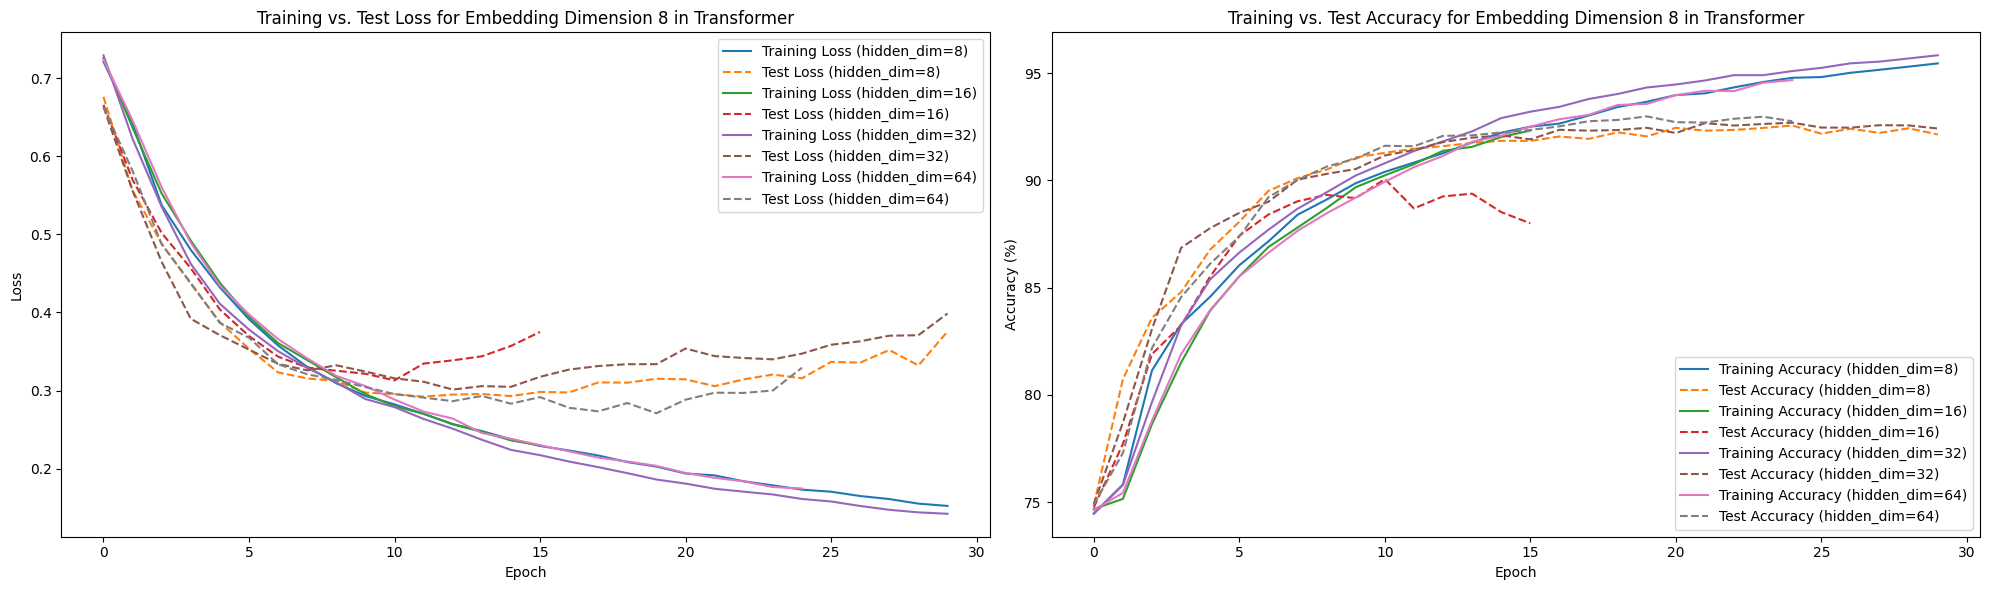

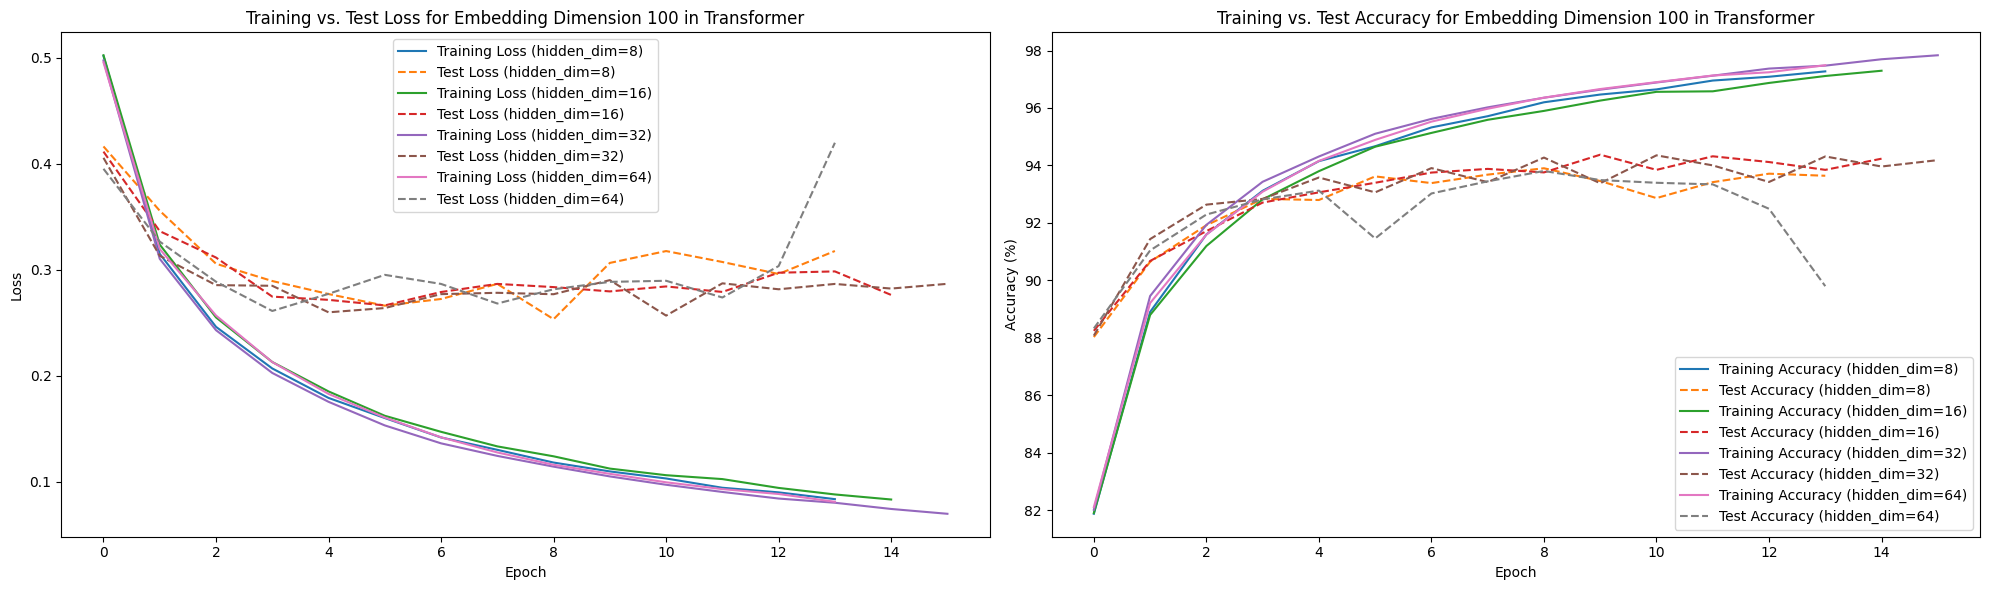

In [ ]:
# Create side-by-side graphs for Transformer
for j, embedding_dim in enumerate(embedding_dims):
    # Create a new figure for each embedding dimension
    plt.figure(figsize=(20, 6))

    # Loss plot
    plt.subplot(1, 2, 1)
    for i, hidden_dim in enumerate(hidden_dims):
        plt.plot(range(len(all_transformer_train_loss_values[j * len(hidden_dims) + i])),
                 all_transformer_train_loss_values[j * len(hidden_dims) + i],
                 label=f'Training Loss (hidden_dim={hidden_dim})', linestyle='-')
        plt.plot(range(len(all_transformer_test_loss_values[j * len(hidden_dims) + i])),
                 all_transformer_test_loss_values[j * len(hidden_dims) + i],
                 label=f'Test Loss (hidden_dim={hidden_dim})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training vs. Test Loss for Embedding Dimension {embedding_dim} in Transformer')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    for i, hidden_dim in enumerate(hidden_dims):
        plt.plot(range(len(all_transformer_train_accuracy_values[j * len(hidden_dims) + i])),
                 all_transformer_train_accuracy_values[j * len(hidden_dims) + i],
                 label=f'Training Accuracy (hidden_dim={hidden_dim})', linestyle='-')
        plt.plot(range(len(all_transformer_test_accuracy_values[j * len(hidden_dims) + i])),
                 all_transformer_test_accuracy_values[j * len(hidden_dims) + i],
                 label=f'Test Accuracy (hidden_dim={hidden_dim})', linestyle='--')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Training vs. Test Accuracy for Embedding Dimension {embedding_dim} in Transformer')
    plt.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

## Running BERT

Due to how BERT tokenizes the incomming data, we had to re-write some of the processing functionallity however all the data pre proccsing remains the same as such the comparision between models is approperate.

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
label_map = {'neg': 0, 'neu': 1, 'pos': 2}

data = pd.read_csv('COVIDSenti.csv', header=None, names=['tweet', 'label'], quotechar='"', lineterminator='\n')
data = data.iloc[1:].reset_index(drop=True)
data['cleaned_tweet'] = data['tweet'].apply(clean_text)
data['label'] = data['label'].str.strip()

# Split data into train and test sets
train_df, test_df = train_test_split(data, test_size=0.2, stratify=data['label'])
train_texts, train_labels = train_df['cleaned_tweet'].tolist(), train_df['label'].tolist()
test_texts, test_labels = test_df['cleaned_tweet'].tolist(), test_df['label'].tolist()

In [ ]:
def text_pipeline(text):
    return tokenizer(text, padding="max_length", max_length=128, truncation=True, return_tensors="pt")


class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = [label_map[label] for label in labels]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = text_pipeline(text)
        return encoding, label

# Create Dataset objects
train_dataset = TweetDataset(train_texts, train_labels)
test_dataset = TweetDataset(test_texts, test_labels)

# Define collate function
def collate_fn(batch):
    texts, labels = zip(*batch)
    input_ids = torch.cat([item['input_ids'] for item in texts], dim=0)
    attention_mask = torch.cat([item['attention_mask'] for item in texts], dim=0)
    return {'input_ids': input_ids, 'attention_mask': attention_mask}, torch.tensor(labels, dtype=torch.long)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, collate_fn=collate_fn)

In [ ]:
def train_BERT(model, train_dataloader, test_dataloader, optimizer, num_epochs=3, patience=5, min_delta=0.01):
    model.train()
    train_loss_values, train_accuracy_values = [], []
    test_loss_values, test_accuracy_values = [], []

    best_test_accuracy = 0
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        model.train()
        total_train_loss, correct_train, total_train = 0, 0, 0
        train_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=True)

        for batch in train_bar:
            inputs, labels = batch
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            inputs['labels'] = labels
            optimizer.zero_grad() # Clear the gradients of all optimized tensors
            outputs = model(**inputs)# Forward pass: compute model predictions and loss
            loss = outputs.loss

            if loss is not None:
                total_train_loss += loss.item()  # Accumulate the training loss
                loss.backward() # Backpropagation to compute gradients
                optimizer.step()# Update model parameters

            # Calculating training accuracy
            _, predicted = torch.max(outputs.logits, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

            # Update tqdm bar
            train_bar.set_postfix(loss=total_train_loss / (total_train if total_train > 0 else 1),
                                    accuracy=100 * correct_train / total_train if total_train > 0 else 0)

        avg_train_loss = total_train_loss / len(train_dataloader)
        train_accuracy = 100 * correct_train / total_train
        train_loss_values.append(avg_train_loss)
        train_accuracy_values.append(train_accuracy)

        # Testing phase
        model.eval()
        total_test_loss, correct_test, total_test = 0, 0, 0
        with torch.no_grad():
            for batch in test_dataloader:
                inputs, labels = batch
                inputs = {k: v.to(device) for k, v in inputs.items()}
                labels = labels.to(device)
                inputs['labels'] = labels
                outputs = model(**inputs)
                loss = outputs.loss

                if loss is not None:
                    total_test_loss += loss.item()

                # Calculate test accuracy
                _, predicted = torch.max(outputs.logits, 1)
                correct_test += (predicted == labels).sum().item()
                total_test += labels.size(0)

        avg_test_loss = total_test_loss / len(test_dataloader)
        test_accuracy = 100 * correct_test / total_test
        test_loss_values.append(avg_test_loss)
        test_accuracy_values.append(test_accuracy)

        # Print epochs
        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
              f'Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

        # Check for improvement in test accuracy for early stopping
        if test_accuracy > best_test_accuracy + min_delta:
            best_test_accuracy = test_accuracy
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        # Early stopping condition
        if epochs_without_improvement >= patience:
            print(f"Stopping early at epoch {epoch+1} due to no improvement in test accuracy for {patience} consecutive epochs.")
            break
    return train_loss_values, train_accuracy_values, test_loss_values, test_accuracy_values

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

BERT_train_loss_values, BERT_train_accuracy_values, BERT_test_loss_values, BERT_test_accuracy_values = train_BERT(model, train_loader, test_loader, optimizer, 50)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/50:   0%|          | 0/9000 [00:00<?, ?it/s]C:\Users\William\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
Epoch 1/50: 100%|██████████| 9000/9000 [07:04<00:00, 21.20it/s, accuracy=92.1, loss=0.0288]


Epoch 1/50, Train Loss: 0.2307, Train Accuracy: 92.07%, Test Loss: 0.1176, Test Accuracy: 96.48%


Epoch 2/50: 100%|██████████| 9000/9000 [06:59<00:00, 21.47it/s, accuracy=97, loss=0.0123]  


Epoch 2/50, Train Loss: 0.0981, Train Accuracy: 97.00%, Test Loss: 0.1022, Test Accuracy: 97.04%


Epoch 3/50: 100%|██████████| 9000/9000 [07:04<00:00, 21.18it/s, accuracy=98.1, loss=0.00832]


Epoch 3/50, Train Loss: 0.0666, Train Accuracy: 98.06%, Test Loss: 0.0987, Test Accuracy: 97.18%


Epoch 4/50: 100%|██████████| 9000/9000 [06:55<00:00, 21.64it/s, accuracy=98.7, loss=0.00604]


Epoch 4/50, Train Loss: 0.0483, Train Accuracy: 98.65%, Test Loss: 0.1099, Test Accuracy: 96.88%


Epoch 5/50: 100%|██████████| 9000/9000 [06:54<00:00, 21.72it/s, accuracy=99, loss=0.00417]  


Epoch 5/50, Train Loss: 0.0334, Train Accuracy: 99.05%, Test Loss: 0.1343, Test Accuracy: 97.10%


Epoch 6/50: 100%|██████████| 9000/9000 [06:54<00:00, 21.71it/s, accuracy=99.3, loss=0.00333]


Epoch 6/50, Train Loss: 0.0267, Train Accuracy: 99.25%, Test Loss: 0.1236, Test Accuracy: 96.97%


Epoch 7/50: 100%|██████████| 9000/9000 [06:51<00:00, 21.88it/s, accuracy=99.4, loss=0.00278]


Epoch 7/50, Train Loss: 0.0222, Train Accuracy: 99.38%, Test Loss: 0.1395, Test Accuracy: 97.19%


Epoch 8/50: 100%|██████████| 9000/9000 [06:53<00:00, 21.78it/s, accuracy=99.5, loss=0.00235]


Epoch 8/50, Train Loss: 0.0188, Train Accuracy: 99.50%, Test Loss: 0.1691, Test Accuracy: 96.96%


Epoch 9/50: 100%|██████████| 9000/9000 [06:59<00:00, 21.44it/s, accuracy=99.5, loss=0.00221]


Epoch 9/50, Train Loss: 0.0177, Train Accuracy: 99.53%, Test Loss: 0.1466, Test Accuracy: 96.95%


Epoch 10/50: 100%|██████████| 9000/9000 [06:58<00:00, 21.49it/s, accuracy=99.6, loss=0.00187]


Epoch 10/50, Train Loss: 0.0150, Train Accuracy: 99.60%, Test Loss: 0.1658, Test Accuracy: 97.11%


Epoch 11/50: 100%|██████████| 9000/9000 [06:53<00:00, 21.77it/s, accuracy=99.6, loss=0.00171]


Epoch 11/50, Train Loss: 0.0137, Train Accuracy: 99.63%, Test Loss: 0.1603, Test Accuracy: 96.99%


Epoch 12/50: 100%|██████████| 9000/9000 [06:47<00:00, 22.11it/s, accuracy=99.7, loss=0.0017] 


Epoch 12/50, Train Loss: 0.0136, Train Accuracy: 99.65%, Test Loss: 0.1566, Test Accuracy: 96.89%
Stopping early at epoch 12 due to no improvement in test accuracy for 5 consecutive epochs.


In [ ]:
def BERT_evaluate_model(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            # Move inputs and labels it to GPU
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.logits, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_labels, all_preds

In [ ]:
true_labels, predicted_labels = BERT_evaluate_model(model, test_loader)
print(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
print("Classification Report for COVIDSenti BERT:")
print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Neutral', 'Positive']))

Accuracy: 0.9689
Classification Report for COVIDSenti BERT:
              precision    recall  f1-score   support

    Negative       0.92      0.97      0.95      3267
     Neutral       0.98      0.98      0.98     13477
    Positive       0.96      0.89      0.92      1256

    accuracy                           0.97     18000
   macro avg       0.95      0.94      0.95     18000
weighted avg       0.97      0.97      0.97     18000



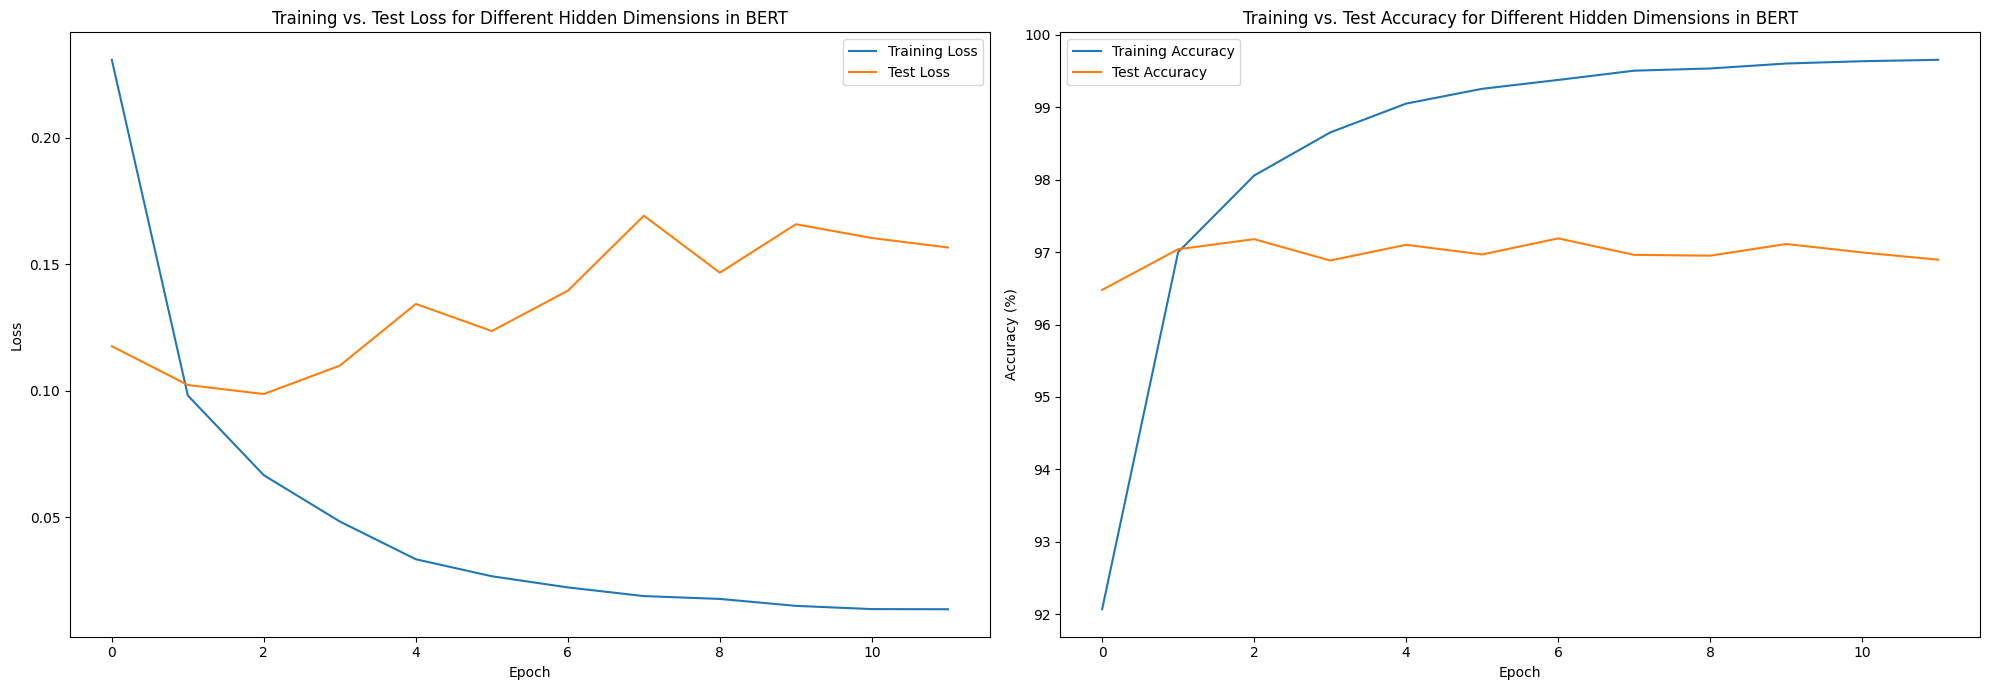

In [ ]:
plt.figure(figsize=(20, 7))

# Plot for Loss (Training and Test for each hidden dimension configuration)
plt.subplot(1, 2, 1)
plt.plot(range(len(BERT_train_loss_values)), BERT_train_loss_values, label=f'Training Loss')
plt.plot(range(len(BERT_test_loss_values)), BERT_test_loss_values, label=f'Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Test Loss for Different Hidden Dimensions in BERT')
plt.legend()

# Plot for Accuracy (Training and Test for each hidden dimension configuration)
plt.subplot(1, 2, 2)
plt.plot(range(len(BERT_train_accuracy_values)), BERT_train_accuracy_values, label=f'Training Accuracy')
plt.plot(range(len(BERT_test_accuracy_values)), BERT_test_accuracy_values, label=f'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs. Test Accuracy for Different Hidden Dimensions in BERT')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Results

In this section, I will discuss and analyze the results of our testing.

First, I will compare the performance of different **architectures** of the same model. Then, I will compare the **performances** between the four models and analyze their **F1 scores**.

Finally, I will compare our results with those presented in one of the recommended papers and demonstrate how we have improved upon them.


## Overfitting Function

Here, I have defined an **overfitting function** to determine the best iteration of our model with optimal test accuracy and low test loss. This is achieved by identifying the point where the test loss starts increasing for **three consecutive epochs**.

During training, we initially used a **patience of 5 epochs** for early stoppage. However, upon retroactively analyzing the graphs, we observed that a patience of 3 epochs would suffice for identifying overfitting points, as 5 epochs proved to be excessive for this purpose.

In [ ]:
def find_overfitting_point(train_loss, test_loss, patience=3):
    overfitting_counter = 0
    for epoch in range(1, len(train_loss)):
        if test_loss[epoch] > test_loss[epoch - 1]:
            overfitting_counter += 1
            if overfitting_counter >= patience:
                return epoch - patience + 1
        else:
            overfitting_counter = 0
    return len(train_loss)


## Comparing Different Architectures

In our testing, we aimed to tune some of the **hyperparameters** of our models. The primary variables we focused on were the **embedding size** and the **hidden dimensions** of the models.

- For **LSTM** and **GRU** models, the hidden dimensions correspond to the size of the **ℎₜ vector** or the **output vector**.  
- In the **Transformer architecture**, the hidden dimensions refer to the number of neurons in the **first layer** of the MLP network.  

For **BERT**, due to unmanageable training times, we were unable to experiment extensively with these hyperparameters. Therefore, we decided to proceed with the **default values**.

In this section, we compare the **loss**, **accuracy**, and **number of epochs** for each of the architectures.

### LSTM

In LSTMs, the hidden dimensions determine the size of the output vector (ℎₜ) for each time step, which plays a crucial role in encoding context from the input sequence. Adjusting these dimensions impacts the model’s ability to process and learn from data.

- **Role of Hidden Dimensions**:
  - Determines the size of the output vector (ℎₜ) for each time step.
  - Plays a crucial role in encoding context from the input sequence.

- **Improved Ability to Capture Complex Patterns**:
  - Larger ℎₜ vectors enable the model to encode more detailed information about the input data (𝑋ₙ).
  - This allows the model to better capture intricate patterns and relationships within the sequence.

- **Handling Input Sequences**:
  - **Longer Sequences** (e.g., 100 characters):
    - Require larger hidden dimensions to encode extended context.
  - **Shorter Sequences** (e.g., 15 characters):
    - Require smaller hidden dimensions since less context needs to be captured.

- **Trade-offs of Larger Hidden Dimensions**:
  - **Increased Computational Cost**: Larger dimensions demand more resources for both training and inference.
  - **Overfitting Risks**: A higher number of variables increases the likelihood of overfitting, particularly on smaller datasets.




Test Accuracies (%): [89.89444444444445, 91.62777777777778, 92.93888888888888, 86.53333333333333, 89.56111111111112, 89.77222222222223, 92.33333333333333, 93.27222222222223]
Model Labels: ['Emb:8\nHid:8', 'Emb:8\nHid:16', 'Emb:8\nHid:32', 'Emb:8\nHid:64', 'Emb:100\nHid:8', 'Emb:100\nHid:16', 'Emb:100\nHid:32', 'Emb:100\nHid:64']
Best Model Index: 7


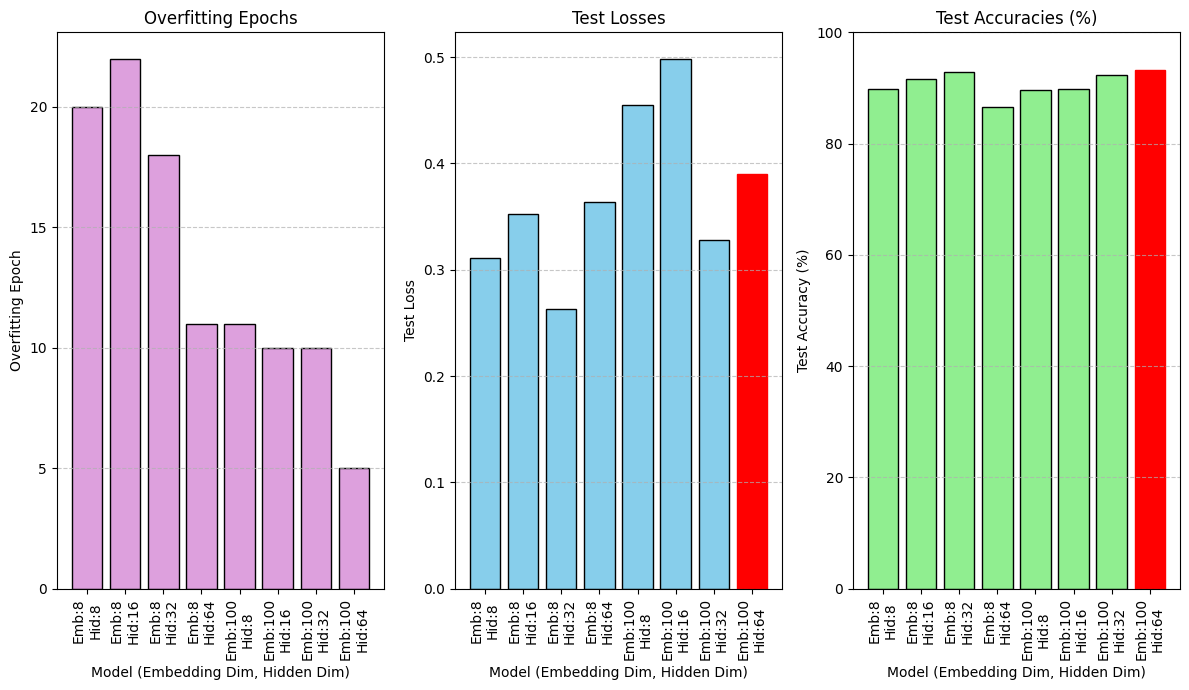

In [ ]:
# Calculate the total number of models
num_embedding_dims = len(embedding_dims)
num_hidden_dims = len(hidden_dims)
total_models = num_embedding_dims * num_hidden_dims

# Initialize lists to store data
test_losses = []
test_accuracies = []
overfitting_epochs_list = []
model_labels = []

best_test_accuracy = -float('inf')  # Initialize the best accuracy to a very low value
best_model_index = None  # Placeholder for the best model index

# Loop over all models
for j, embedding_dim in enumerate(embedding_dims):
    for i, hidden_dim in enumerate(hidden_dims):
        index = j * num_hidden_dims + i

        # Extract train and test loss/accuracy
        train_loss = all_lstm_train_loss_values[index]
        test_loss = all_lstm_test_loss_values[index]
        test_accuracy = all_lstm_test_accuracy_values[index]

        # Find overfitting point
        overfitting_epoch = find_overfitting_point(train_loss, test_loss)
        overfitting_epochs_list.append(overfitting_epoch)

        # Collect the final test loss and test accuracy
        test_losses.append(test_loss[-1])
        test_accuracies.append(test_accuracy[-1])
        model_labels.append(f"Emb:{embedding_dim}\nHid:{hidden_dim}")

        # Check for the best-performing model
        if test_accuracy[-1] > best_test_accuracy:
            best_test_accuracy = test_accuracy[-1]
            best_model_index = len(test_accuracies) - 1  # Index in the test_accuracies list

# Convert test accuracies to percentages
test_accuracies_percent = [acc for acc in test_accuracies]

# Data validation
assert len(test_accuracies_percent) == len(model_labels), "Data length mismatch!"

# Debugging print statements
print("Test Accuracies (%):", test_accuracies_percent)
print("Model Labels:", model_labels)
print("Best Model Index:", best_model_index)

# Determine figure size based on the number of models
fig_width = max(12, len(model_labels) * 0.5)
fig_height = 7

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(fig_width, fig_height))

# Plot 1: Overfitting Epochs
axs[0].bar(range(len(overfitting_epochs_list)), overfitting_epochs_list, color='plum', edgecolor='black')
axs[0].set_title('Overfitting Epochs')
axs[0].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[0].set_ylabel('Overfitting Epoch')
axs[0].set_xticks(range(len(overfitting_epochs_list)))
axs[0].set_xticklabels(model_labels, rotation=90)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Test Losses
bars_loss = axs[1].bar(range(len(test_losses)), test_losses, color='skyblue', edgecolor='black')
# Highlight the best model in red
if best_model_index is not None and 0 <= best_model_index < len(bars_loss):
    bars_loss[best_model_index].set_color('red')
axs[1].set_title('Test Losses')
axs[1].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[1].set_ylabel('Test Loss')
axs[1].set_xticks(range(len(test_losses)))
axs[1].set_xticklabels(model_labels, rotation=90)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Test Accuracies
bars_acc = axs[2].bar(range(len(test_accuracies_percent)), test_accuracies_percent, color='lightgreen', edgecolor='black')
# Highlight the best model in red
if best_model_index is not None and 0 <= best_model_index < len(bars_acc):
    bars_acc[best_model_index].set_color('red')
axs[2].set_title('Test Accuracies (%)')
axs[2].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[2].set_ylabel('Test Accuracy (%)')
axs[2].set_xticks(range(len(test_accuracies_percent)))
axs[2].set_xticklabels(model_labels, rotation=90)
axs[2].set_ylim(0, 100)  # Set y-axis scale from 0 to 100
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


### GRU

GRUs, like LSTMs, use hidden dimensions (ℎₜ) to encode context from the input sequence. However, because GRUs combine the forget and input gates into a single update gate, they can often achieve similar performance with smaller embedding dimensions (𝑋ₙ). This reduces computational complexity without significant loss in representational power.

Unlike LSTMs, this advantage is not tied to the size of the ℎₜ vector but rather to the reduced dependence on larger input vectors (𝑋ₙ).


Test Accuracies (%): [90.82222222222222, 92.48333333333333, 81.67222222222222, 92.37222222222222, 89.5111111111111, 91.40555555555555, 92.7611111111111, 93.35555555555555]
Model Labels: ['Emb:8\nHid:8', 'Emb:8\nHid:16', 'Emb:8\nHid:32', 'Emb:8\nHid:64', 'Emb:100\nHid:8', 'Emb:100\nHid:16', 'Emb:100\nHid:32', 'Emb:100\nHid:64']
Best Model Index: 7


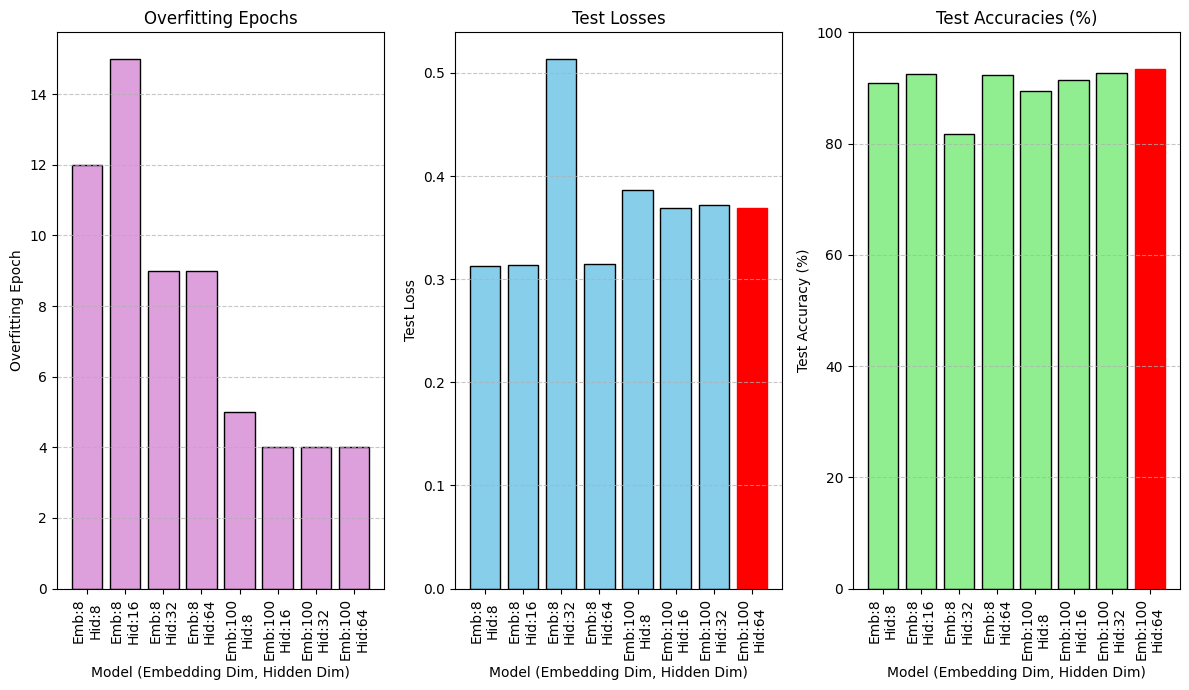

In [ ]:
# Calculate the total number of models
num_embedding_dims = len(embedding_dims)
num_hidden_dims = len(hidden_dims)
total_models = num_embedding_dims * num_hidden_dims

# Initialize lists to store data
test_losses = []
test_accuracies = []
overfitting_epochs_list = []
model_labels = []

best_test_accuracy = -float('inf')  # Initialize the best accuracy to a very low value
best_model_index = None  # Placeholder for the best model index

# Loop over all models
for j, embedding_dim in enumerate(embedding_dims):
    for i, hidden_dim in enumerate(hidden_dims):
        index = j * num_hidden_dims + i

        # Extract train and test loss/accuracy
        train_loss = all_gru_train_loss_values[index]
        test_loss = all_gru_test_loss_values[index]
        test_accuracy = all_gru_test_accuracy_values[index]

        # Find overfitting point
        overfitting_epoch = find_overfitting_point(train_loss, test_loss)
        overfitting_epochs_list.append(overfitting_epoch)

        # Collect the final test loss and test accuracy
        test_losses.append(test_loss[-1])
        test_accuracies.append(test_accuracy[-1])
        model_labels.append(f"Emb:{embedding_dim}\nHid:{hidden_dim}")

        # Check for the best-performing model
        if test_accuracy[-1] > best_test_accuracy:
            best_test_accuracy = test_accuracy[-1]
            best_model_index = len(test_accuracies) - 1  # Index in the test_accuracies list

# Convert test accuracies to percentages
test_accuracies_percent = [acc for acc in test_accuracies]

# Data validation
assert len(test_accuracies_percent) == len(model_labels), "Data length mismatch!"

# Debugging print statements
print("Test Accuracies (%):", test_accuracies_percent)
print("Model Labels:", model_labels)
print("Best Model Index:", best_model_index)

# Determine figure size based on the number of models
fig_width = max(12, len(model_labels) * 0.5)
fig_height = 7

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(fig_width, fig_height))

# Plot 1: Overfitting Epochs
axs[0].bar(range(len(overfitting_epochs_list)), overfitting_epochs_list, color='plum', edgecolor='black')
axs[0].set_title('Overfitting Epochs')
axs[0].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[0].set_ylabel('Overfitting Epoch')
axs[0].set_xticks(range(len(overfitting_epochs_list)))
axs[0].set_xticklabels(model_labels, rotation=90)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Test Losses
bars_loss = axs[1].bar(range(len(test_losses)), test_losses, color='skyblue', edgecolor='black')
# Highlight the best model in red
if best_model_index is not None and 0 <= best_model_index < len(bars_loss):
    bars_loss[best_model_index].set_color('red')
axs[1].set_title('Test Losses')
axs[1].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[1].set_ylabel('Test Loss')
axs[1].set_xticks(range(len(test_losses)))
axs[1].set_xticklabels(model_labels, rotation=90)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Test Accuracies
bars_acc = axs[2].bar(range(len(test_accuracies_percent)), test_accuracies_percent, color='lightgreen', edgecolor='black')
# Highlight the best model in red
if best_model_index is not None and 0 <= best_model_index < len(bars_acc):
    bars_acc[best_model_index].set_color('red')
axs[2].set_title('Test Accuracies (%)')
axs[2].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[2].set_ylabel('Test Accuracy (%)')
axs[2].set_xticks(range(len(test_accuracies_percent)))
axs[2].set_xticklabels(model_labels, rotation=90)
axs[2].set_ylim(0, 100)  # Set y-axis scale from 0 to 100
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

### Transformers

In transformers, we varied the number of neurons in the first perceptron layer of all the attention blocks. The reasoning behind this approach lies in the crucial role of the feedforward layer, which maps the processed embedding vectors to a higher-dimensional space. This higher dimension enables the model to capture more complex representations of the input data.

By adjusting the number of neurons in the first perceptron layer, we can directly influence the capacity of the feedforward network to learn intricate patterns and relationships within the data. This variation helps explore how the model's ability to generalize and capture nuanced features is affected by the size of this layer.

- **Larger Feedforward Layers**:
  - **Advantages**:
    - Can capture richer and more detailed information.
    - Facilitate learning of complex patterns and relationships in the data.
  - **Disadvantages**:
    - Increase computational complexity during both training and inference.
    - Pose a higher risk of overfitting, especially when working with smaller datasets.

- **Smaller Feedforward Layers**:
  - **Advantages**:
    - Simplify the model, making it more efficient.
    - Reduce computational overhead.
    - Lower the risk of overfitting on limited data.
  - **Disadvantages**:
    - May limit the model's capacity to learn intricate features.
    - Can result in poorer generalization for complex datasets.

A fascinating insight into feedforward layers comes from a paper by Google's DeepMind researchers ([source](https://www.alignmentforum.org/posts/NfFST5Mio7BCAQHPA/an-extremely-opinionated-annotated-list-of-my-favourite)). They discussed how these layers are often where the "facts" are stored within transformer models, highlighting their importance in encoding critical information about the input data.


Test Accuracies (%): [92.14444444444445, 88.0, 92.42222222222222, 92.7611111111111, 93.63888888888889, 94.23333333333333, 94.18333333333334, 89.79444444444445]
Model Labels: ['Emb:8\nHid:8', 'Emb:8\nHid:16', 'Emb:8\nHid:32', 'Emb:8\nHid:64', 'Emb:100\nHid:8', 'Emb:100\nHid:16', 'Emb:100\nHid:32', 'Emb:100\nHid:64']
Best Model Index: 5


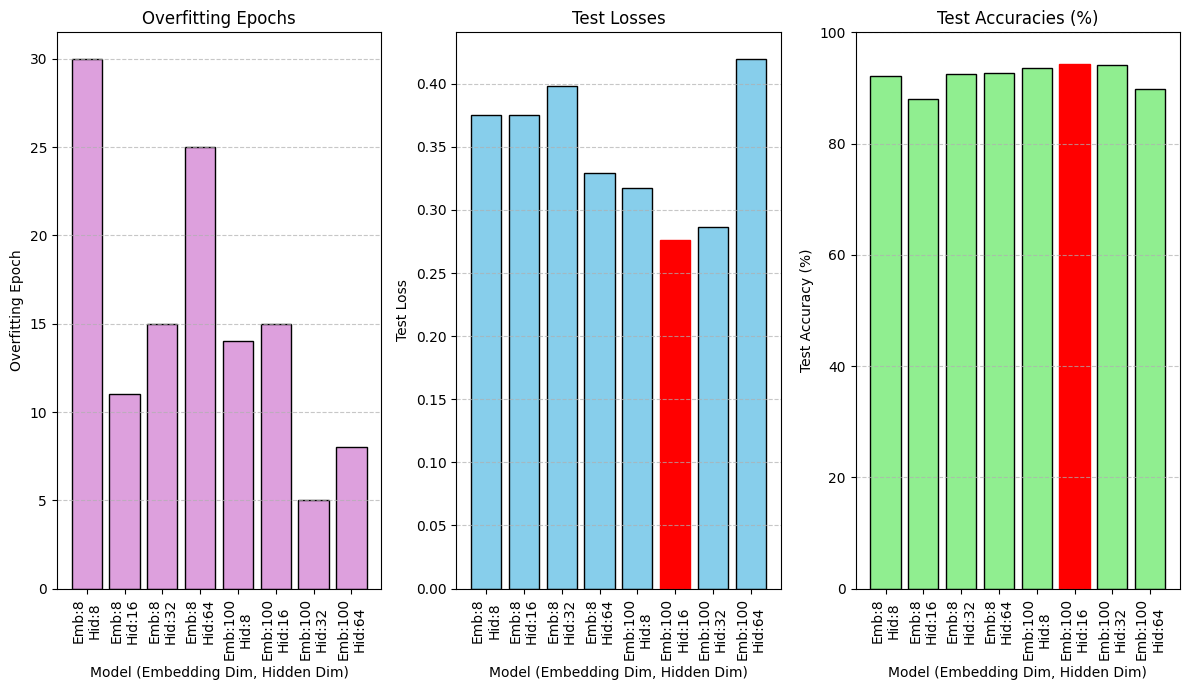

In [ ]:
# Calculate the total number of models
num_embedding_dims = len(embedding_dims)
num_hidden_dims = len(hidden_dims)
total_models = num_embedding_dims * num_hidden_dims

# Initialize lists to store data
test_losses = []
test_accuracies = []
overfitting_epochs_list = []
model_labels = []

best_test_accuracy = -float('inf')  # Initialize the best accuracy to a very low value
best_model_index = None  # Placeholder for the best model index

# Loop over all models
for j, embedding_dim in enumerate(embedding_dims):
    for i, hidden_dim in enumerate(hidden_dims):
        index = j * num_hidden_dims + i

        # Extract train and test loss/accuracy
        train_loss = all_transformer_train_loss_values[index]
        test_loss = all_transformer_test_loss_values[index]
        test_accuracy = all_transformer_test_accuracy_values[index]

        # Find overfitting point
        overfitting_epoch = find_overfitting_point(train_loss, test_loss)
        overfitting_epochs_list.append(overfitting_epoch)

        # Collect the final test loss and test accuracy
        test_losses.append(test_loss[-1])
        test_accuracies.append(test_accuracy[-1])
        model_labels.append(f"Emb:{embedding_dim}\nHid:{hidden_dim}")

        # Check for the best-performing model
        if test_accuracy[-1] > best_test_accuracy:
            best_test_accuracy = test_accuracy[-1]
            best_model_index = len(test_accuracies) - 1  # Index in the test_accuracies list

# Convert test accuracies to percentages
test_accuracies_percent = [acc for acc in test_accuracies]

# Data validation
assert len(test_accuracies_percent) == len(model_labels), "Data length mismatch!"

# Debugging print statements
print("Test Accuracies (%):", test_accuracies_percent)
print("Model Labels:", model_labels)
print("Best Model Index:", best_model_index)

# Determine figure size based on the number of models
fig_width = max(12, len(model_labels) * 0.5)
fig_height = 7

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(fig_width, fig_height))

# Plot 1: Overfitting Epochs
axs[0].bar(range(len(overfitting_epochs_list)), overfitting_epochs_list, color='plum', edgecolor='black')
axs[0].set_title('Overfitting Epochs')
axs[0].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[0].set_ylabel('Overfitting Epoch')
axs[0].set_xticks(range(len(overfitting_epochs_list)))
axs[0].set_xticklabels(model_labels, rotation=90)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Test Losses
bars_loss = axs[1].bar(range(len(test_losses)), test_losses, color='skyblue', edgecolor='black')
# Highlight the best model in red
if best_model_index is not None and 0 <= best_model_index < len(bars_loss):
    bars_loss[best_model_index].set_color('red')
axs[1].set_title('Test Losses')
axs[1].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[1].set_ylabel('Test Loss')
axs[1].set_xticks(range(len(test_losses)))
axs[1].set_xticklabels(model_labels, rotation=90)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Test Accuracies
bars_acc = axs[2].bar(range(len(test_accuracies_percent)), test_accuracies_percent, color='lightgreen', edgecolor='black')
# Highlight the best model in red
if best_model_index is not None and 0 <= best_model_index < len(bars_acc):
    bars_acc[best_model_index].set_color('red')
axs[2].set_title('Test Accuracies (%)')
axs[2].set_xlabel('Model (Embedding Dim, Hidden Dim)')
axs[2].set_ylabel('Test Accuracy (%)')
axs[2].set_xticks(range(len(test_accuracies_percent)))
axs[2].set_xticklabels(model_labels, rotation=90)
axs[2].set_ylim(0, 100)  # Set y-axis scale from 0 to 100
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better appearance
plt.tight_layout()
plt.show()

## Comparisons between models

In this section, we will discuss comparisons between the different models we used.

### F1 scores and Accuracy

| Model                                       | Accuracy | Negative F1 | Neutral F1 | Positive F1 | Macro F1 | Weighted F1 |
|---------------------------------------------|----------|-------------|------------|-------------|----------|-------------|
| COVIDSenti LSTM (64 hidden, 100 emb)        | 0.9327   | 0.89        | 0.96       | 0.80        | 0.88     | 0.93        |
| COVIDSenti GRU (64 hidden, 100 emb)         | 0.9336   | 0.89        | 0.96       | 0.81        | 0.88     | 0.93        |
| COVIDSenti Transformer (16 hidden, 100 emb) | 0.9423   | 0.89        | 0.96       | 0.86        | 0.90     | 0.94        |
| COVIDSenti Transformer (32 hidden, 100 emb) | 0.9418   | 0.91        | 0.96       | 0.83        | 0.90     | 0.94        |
| COVIDSenti BERT                             | 0.9689   | 0.95        | 0.98       | 0.92        | 0.95     | 0.97        |

### Memory and Computational Complexity of LSTM and GRU

One of the reasons why we choose GRU was that it was less computationally expensive and required lower memory. We would like to show this by comparing the number of epochs required by both the models.


LSTM Model: Best Overfitting Epoch = 5, Mean Overfitting Epoch = 10.38
GRU Model: Best Overfitting Epoch = 4, Mean Overfitting Epoch = 7.75


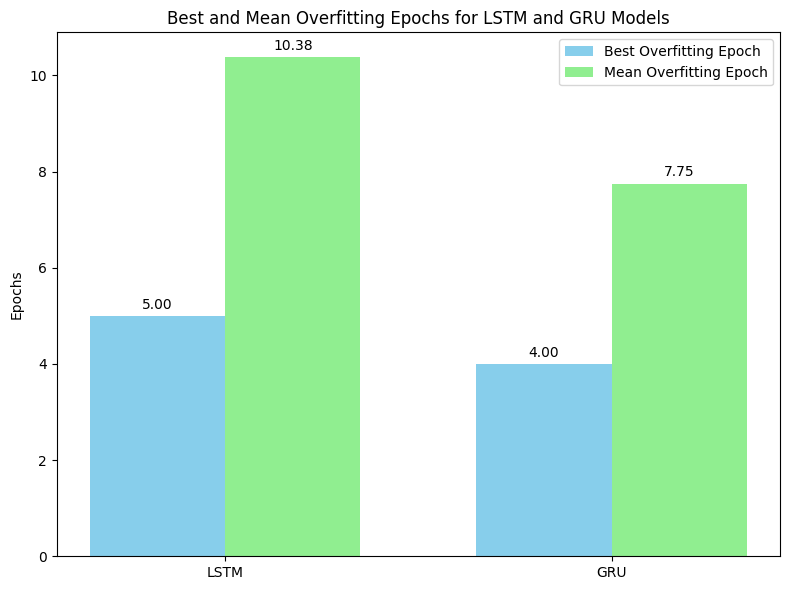

In [ ]:
# Initialize lists to store overfitting epochs
overfitting_epochs_list_lstm = []
overfitting_epochs_list_gru = []

num_embedding_dims = len(embedding_dims)
num_hidden_dims = len(hidden_dims)

for j, embedding_dim in enumerate(embedding_dims):
    for i, hidden_dim in enumerate(hidden_dims):
        index = j * num_hidden_dims + i

        # Extract train and test loss values
        train_loss_lstm = all_lstm_train_loss_values[index]
        test_loss_lstm = all_lstm_test_loss_values[index]

        train_loss_gru = all_gru_train_loss_values[index]
        test_loss_gru = all_gru_test_loss_values[index]

        # Find overfitting point using the provided function
        overfitting_epoch_lstm = find_overfitting_point(train_loss_lstm, test_loss_lstm)
        overfitting_epoch_gru = find_overfitting_point(train_loss_gru, test_loss_gru)

        overfitting_epochs_list_lstm.append(overfitting_epoch_lstm)
        overfitting_epochs_list_gru.append(overfitting_epoch_gru)

# Compute mean and best overfitting epochs over all configurations
mean_overfitting_epoch_lstm = np.mean(overfitting_epochs_list_lstm)
mean_overfitting_epoch_gru = np.mean(overfitting_epochs_list_gru)

best_overfitting_epoch_lstm = min(overfitting_epochs_list_lstm)
best_overfitting_epoch_gru = min(overfitting_epochs_list_gru)

# Create a bar chart showing the best and mean overfitting epochs
labels = ['LSTM', 'GRU']
mean_values = [mean_overfitting_epoch_lstm, mean_overfitting_epoch_gru]
best_values = [best_overfitting_epoch_lstm, best_overfitting_epoch_gru]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting the best overfitting epochs
rects1 = ax.bar(x - width/2, best_values, width, label='Best Overfitting Epoch', color='skyblue')

# Plotting the mean overfitting epochs
rects2 = ax.bar(x + width/2, mean_values, width, label='Mean Overfitting Epoch', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Epochs')
ax.set_title('Best and Mean Overfitting Epochs for LSTM and GRU Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar
def autolabel(rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Print the best number of epochs and the mean for both models
print(f'LSTM Model: Best Overfitting Epoch = {best_overfitting_epoch_lstm}, Mean Overfitting Epoch = {mean_overfitting_epoch_lstm:.2f}')
print(f'GRU Model: Best Overfitting Epoch = {best_overfitting_epoch_gru}, Mean Overfitting Epoch = {mean_overfitting_epoch_gru:.2f}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Comparison against the State of the Art

In this section, we will analyze the differences between our best model implementations and those presented in the recommended paper. RP stands for research paper which is found at [Research paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9340540). We used this paper as the comparision to our modles as it uses the same dataset and similar model architecture.

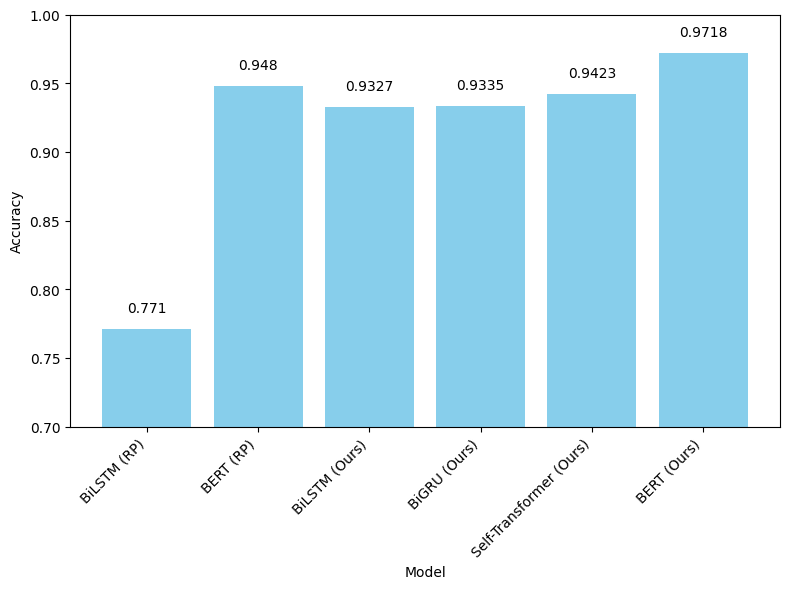

In [ ]:
models = ['BiLSTM (RP)', 'BERT (RP)', 'BiLSTM (Ours)', 'BiGRU (Ours)', 'Self-Transformer (Ours)', 'BERT (Ours)']
accuracy = [0.771, 0.948, 0.9327, 0.9335, 0.9423, 0.9718]

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(models, accuracy, color='skyblue')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.7, 1.0)

plt.xticks(rotation=45, ha='right')

# Add values above bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

## Error Analysis

In this section, we discuss the types of examples misclassified by our models.

### Confusion Matrixes

These confusion matrices were created by sampling five misclassifications for each label from all the architectures tested across all models. Unfortunately, we couldn't create one for BERT due to resource constraints.
### Confusion Matrices and Misclassification Counts

#### **Confusion Matrix for LSTM**
| True Label \ Predicted Label | Negative (0) | Neutral (1) | Positive (2) |
|------------------------------|--------------|-------------|--------------|
| **Negative (0)**             | 0            | 40          | 0            |
| **Neutral (1)**              | 28           | 0           | 12           |
| **Positive (2)**             | 1            | 39          | 0            |


#### **Confusion Matrix for GRU**
| True Label \ Predicted Label | Negative (0) | Neutral (1) | Positive (2) |
|------------------------------|--------------|-------------|--------------|
| **Negative (0)**             | 0            | 40          | 0            |
| **Neutral (1)**              | 34           | 0           | 6            |
| **Positive (2)**             | 0            | 40          | 0            |


#### **Confusion Matrix for Transformer**
| True Label \ Predicted Label | Negative (0) | Neutral (1) | Positive (2) |
|------------------------------|--------------|-------------|--------------|
| **Negative (0)**             | 0            | 38          | 2            |
| **Neutral (1)**              | 35           | 0           | 5            |
| **Positive (2)**             | 1            | 39          | 0            |


#### **Confusion Matrix for Combined Models**
| True Label \ Predicted Label | Negative (0) | Neutral (1) | Positive (2) |
|------------------------------|--------------|-------------|--------------|
| **Negative (0)**             | 0            | 118         | 2            |
| **Neutral (1)**              | 97           | 0           | 23           |
| **Positive (2)**             | 2            | 118         | 0            |


### General Observations
Most positive and negative examples were misclassified as neutral. It was rare for a positive example to be misclassified as negative and vice versa. However, most neutral examples were misclassified as negatives.

The LSTM models followed this general trend, but the misclassification of neutral examples was more evenly split between being labeled as positive or negative. In comparison, both the GRU model and the Transformer model primarily misclassified neutral examples as negatives. We believe this occurs because the dataset contains fewer negative examples, making it difficult for the models to distinguish between negatives and neutrals. Additionally it is important to note that tweets that are a marginal negative or postive classification even when being classified by humans may be incorrectly classed into neutral due to the inherent subjective nature of sentiment analysis. This can be seen in the second specific example where within the dataset it was classified as a postive tweet, where in our opion it could easily be classified as a neutral tweet.

### Specific Examples

#### True Label: Positive  
**Predicted Label:** Negative  
> "Yes, you can get coronavirus from touching things that the infected person has touched."  

This example was likely misclassified because of the word **"infected."** Words like this likely push the perceived sentiment of the text towards being more negative.

#### True Label: Negative  
**Predicted Label:** Positive  
> "No more in-person classes until further notice. #coronavirus #covid2019 #coronavirusupdate #covid19"  

To a human reader, this text appears more neutral. The model likely misclassified it because of its ambiguous tone.

#### True Label: Positive  
**Predicted Label:** Neutral

> "I wonder how much more soap airports and restaurants are going thru #washyourhands #coronavirus"

To a human, this tweet appears neutral. However, it has been classified as positive. Our model, on the other hand, classified it as neutral, aligning more closely with our expectations. This demonstrates the model's ability to capture complex patterns and recognize nuanced relationships.


# Discussion

## 1. Impact of Hyperparameters on Models
In general, increasing the size of our parameters resulted in improved model performance. Below, we detail the effects observed for each model.

### a. LSTM
For the LSTM, we observed that increasing the `ht` vector size led to better performance when the embedding size was kept constant. The model with the largest embedding size and the largest `ht` vector size achieved the best results. This improvement is consistent with the understanding that larger hidden state dimensions allow the model to capture more complex dependencies in the data, particularly for sequential tasks.

### b. GRU
The GRU exhibited less sensitivity to the embedding size compared to the LSTM. Variations in the `ht` vector size also had a negligible impact on the results, with all tested configurations performing reasonably similarly. This indicates that GRU may not require as large a parameter space to reach a comparable performance level, which can be advantageous for scenarios with limited computational resources.

### c. Transformer
Transformers are designed with a structural recommendation: the number of neurons in the first layer of the MLP should be approximately four times the embedding size. We conducted experiments using multiples of 1, 2, 4, and 8 for an embedding size of 8. These experiments allowed us to validate this recommendation and explore performance trade-offs.

Unfortunately, due to resource constraints, we could not extend these experiments for the embedding size of 100. Similar to the GRU, we found that most Transformer configurations performed nearly the same, particularly with larger embedding sizes. When the embedding size was set to 100, variations in hidden dimensions (8,16,32,64) did not significantly affect the results. This suggests that Transformers are robust across a range of hyperparameter settings.

### d. BERT
Due to the complexity and pretrained nature of BERT, we were unable to experiment with its hyperparameters. Thus, this model is excluded from the hyperparameter impact analysis. However, its performance is discussed in later sections.

---

## 2. Analysis of F1 Scores
When comparing the models based on their best F1 scores, it was evident that the LSTM and GRU performed comparably. However, the Transformer slightly outperformed both of them. BERT, being a pretrained model with a significantly larger architecture, outperformed all others and achieved the highest F1 score.

A closer examination of the Transformer revealed that the difference in performance between configurations with 16 and 32 hidden dimensions was minimal. This finding motivated us to include both configurations in our analysis to highlight the robustness of the Transformer across different setups.

It is worth emphasizing that the best-performing models across all architectures used an embedding size of 100, coupled with hidden dimensions in the higher range. This suggests that larger embedding sizes consistently contribute to improved performance, possibly due to their ability to capture more nuanced features.

---

## 3. GRU vs LSTM
One of the primary motivations for selecting the GRU was its lower computational cost compared to the LSTM. To quantify this, we analyzed two metrics:
1. The average number of epochs required to train each model.
2. The number of epochs required for the best-performing configuration of each model to converge.

On average, the GRU required three fewer epochs to train compared to the LSTM. In the case of the best-performing configurations, the GRU also trained faster than the LSTM. These results support the claim that the GRU is computationally more efficient while delivering comparable performance, making it a suitable choice for scenarios where computational resources or training time are constrained.

---

## 4. Comparing Results with Research Papers
When comparing our results to those presented in related research papers, our implementations consistently outperformed theirs. This improvement can be attributed to several factors:
- **Enhanced Preprocessing:** We invested significant effort in optimizing data preprocessing, ensuring cleaner and more consistent input data.
- **Dropout Rate Optimization:** Our use of consistent and carefully tuned dropout rates likely contributed to reduced overfitting and improved generalization.

These optimizations allowed our models to:
1. Outperform the BERT implementation in the referenced papers by 2%.
2. Outperform the LSTM implementation in the referenced papers by a significant margin of 16%.

These results highlight the impact of careful preprocessing and hyperparameter tuning, even when working with baseline architectures or pretrained models like BERT.

---

## 5. Weaknesses
A limitation of our results was that the hyperparameters could be more fine-tuned, and more experimentation could have been conducted. Due to limited resources, experimentation with the BERT model was restricted, which could be improved in the future. Specifically, for the Transformer architecture, the choices were slightly arbitrary, and further experimentation on parameters like the number of layers and the number of heads in the attention block could have enhanced our analysis.

---

## 6. Future Work
Future work could address the identified weaknesses by adopting a more exploratory approach to hyperparameters. Instead of focusing solely on embedding dimensions and hidden dimensions, other parameters should also be investigated to enable a more comprehensive analysis.

Additionally, the impact of our pre-processing techniques could be examined in greater depth, and alternative models could be trained to further enhance the study.